# Hierarchical GANs for morphological and geometric trees

## Imports

In [1]:
import numpy as np

# Keras
from keras.models import Sequential
from keras.layers.core import Dense, Reshape, Dropout, Activation
from keras.layers import Input, merge
from keras.models import Model
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import LSTM

# Other
import matplotlib.pyplot as plt
from copy import deepcopy
import os
import pickle

%matplotlib inline

# Local
import McNeuron
import models_cmc as models
import train_cmc as train
import batch_utils
import data_transforms

Using Theano backend.


## Example neuron

/Users/pavanramkumar/anaconda2/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


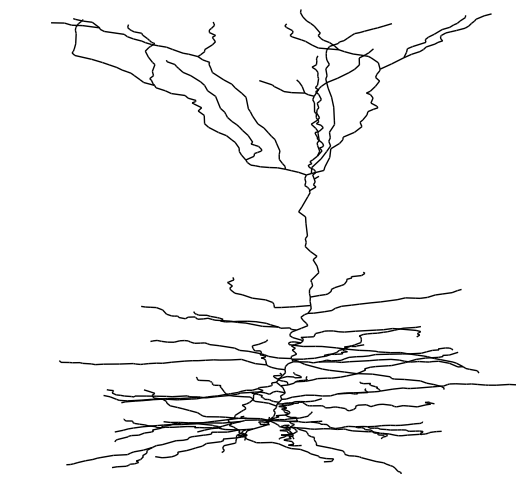

In [2]:
neuron_list = McNeuron.visualize.get_all_path(os.getcwd()+"/Data/Pyramidal/chen")
neuron = McNeuron.Neuron(file_format = 'swc', input_file=neuron_list[50])
McNeuron.visualize.plot_2D(neuron)

## Training

### Load Data

In [3]:
training_data = pickle.load(open("/Users/pavanramkumar/Dropbox/HG-GAN/03-Data/synthetic_two_segment_model_different_directions_n20.p", "rb"))

In [4]:
print training_data['morphology']['n20'].shape
print training_data['geometry']['n20'].shape

(50000, 18)
(50000, 19, 3)


### Global parameters

In [5]:
n_levels = 1
n_nodes = [20]

input_dim = 100

n_epochs = 5
batch_size = 64
n_batch_per_epoch = np.floor(training_data['morphology']['n20'].shape[0]/batch_size).astype(int)
d_iters = 20
lr_discriminator =  0.005
lr_generator = 0.0005

rule = 'mgd'
weight_constraint = [-0.03, 0.03]

### Run


Level #0

    Epoch #0

    After 20 iterations
        Discriminator Loss                         = -11.3615617752

    Generator_Loss: 2.75921225548
2
    After 20 iterations
        Discriminator Loss                         = -11.6378631592

    Generator_Loss: 1.9068801403
3
    After 20 iterations
        Discriminator Loss                         = -11.019452095

    Generator_Loss: 0.303305089474
4
    After 20 iterations
        Discriminator Loss                         = -11.322467804

    Generator_Loss: 0.0949943885207
5
    After 20 iterations
        Discriminator Loss                         = -10.2967262268

    Generator_Loss: -0.464321255684
6
    After 20 iterations
        Discriminator Loss                         = -10.3442640305

    Generator_Loss: -1.29173195362
7
    After 20 iterations
        Discriminator Loss                         = -10.0937519073

    Generator_Loss: -2.01735639572
8
    After 20 iterations
        Discriminator Loss                  

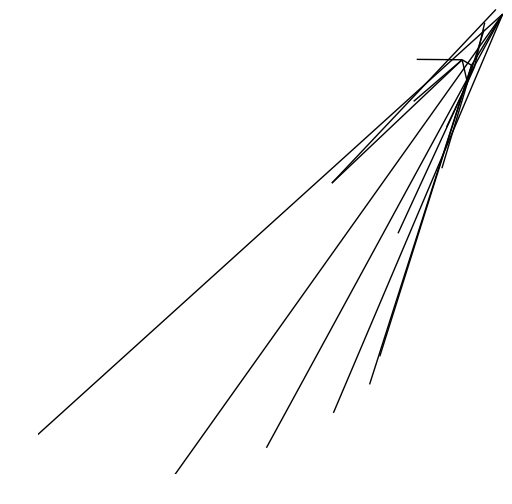

    After 20 iterations
        Discriminator Loss                         = -7.52133083344

    Generator_Loss: -5.46949958801
26
    After 20 iterations
        Discriminator Loss                         = -8.11446380615

    Generator_Loss: -5.64343738556
27
    After 20 iterations
        Discriminator Loss                         = -7.29978704453

    Generator_Loss: -5.42446660995
28
    After 20 iterations
        Discriminator Loss                         = -7.76894664764

    Generator_Loss: -5.41966438293
29
    After 20 iterations
        Discriminator Loss                         = -7.26861047745

    Generator_Loss: -5.45555305481
30
    After 20 iterations
        Discriminator Loss                         = -7.21056652069

    Generator_Loss: -5.55633735657
31
    After 20 iterations
        Discriminator Loss                         = -7.11613130569

    Generator_Loss: -5.82961988449
32
    After 20 iterations
        Discriminator Loss                         = -7.428

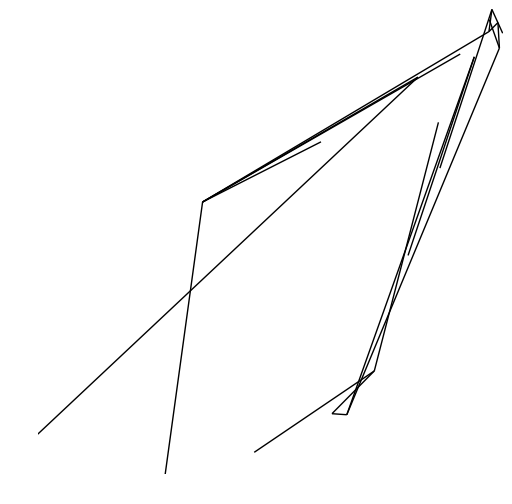

    After 20 iterations
        Discriminator Loss                         = -6.29822063446

    Generator_Loss: -6.59980916977
51
    After 20 iterations
        Discriminator Loss                         = -6.3366856575

    Generator_Loss: -6.65360927582
52
    After 20 iterations
        Discriminator Loss                         = -6.23286914825

    Generator_Loss: -6.35358524323
53
    After 20 iterations
        Discriminator Loss                         = -5.97380495071

    Generator_Loss: -6.5921049118
54
    After 20 iterations
        Discriminator Loss                         = -6.71360874176

    Generator_Loss: -6.58551883698
55
    After 20 iterations
        Discriminator Loss                         = -6.061378479

    Generator_Loss: -6.53657531738
56
    After 20 iterations
        Discriminator Loss                         = -6.11740493774

    Generator_Loss: -6.94702291489
57
    After 20 iterations
        Discriminator Loss                         = -6.2515382

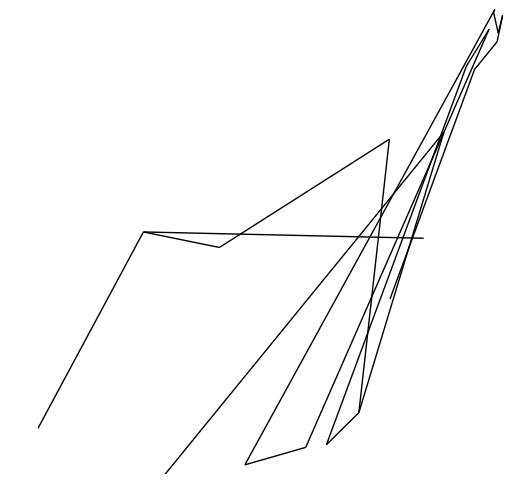

    After 20 iterations
        Discriminator Loss                         = -5.41633892059

    Generator_Loss: -7.69151210785
76
    After 20 iterations
        Discriminator Loss                         = -6.08730840683

    Generator_Loss: -7.80622768402
77
    After 20 iterations
        Discriminator Loss                         = -5.80839920044

    Generator_Loss: -7.64765405655
78
    After 20 iterations
        Discriminator Loss                         = -5.86540794373

    Generator_Loss: -7.42765903473
79
    After 20 iterations
        Discriminator Loss                         = -5.5918507576

    Generator_Loss: -7.19759368896
80
    After 20 iterations
        Discriminator Loss                         = -5.60072040558

    Generator_Loss: -7.45248889923
81
    After 20 iterations
        Discriminator Loss                         = -5.62225532532

    Generator_Loss: -7.65705633163
82
    After 20 iterations
        Discriminator Loss                         = -5.3624

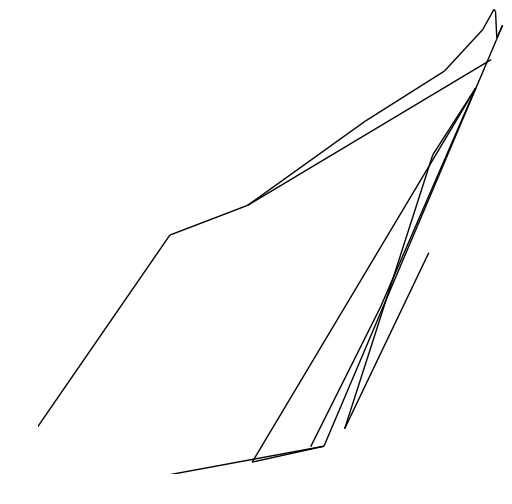

    After 20 iterations
        Discriminator Loss                         = -5.31517076492

    Generator_Loss: -6.39715719223
101
    After 20 iterations
        Discriminator Loss                         = -5.90977191925

    Generator_Loss: -5.76964902878
102
    After 20 iterations
        Discriminator Loss                         = -4.91023349762

    Generator_Loss: -6.11589956284
103
    After 20 iterations
        Discriminator Loss                         = -5.08274650574

    Generator_Loss: -6.34481048584
104
    After 20 iterations
        Discriminator Loss                         = -5.08630990982

    Generator_Loss: -6.67337703705
105
    After 20 iterations
        Discriminator Loss                         = -4.85085916519

    Generator_Loss: -6.70187711716
106
    After 20 iterations
        Discriminator Loss                         = -5.27863454819

    Generator_Loss: -6.22855949402
107
    After 20 iterations
        Discriminator Loss                         =

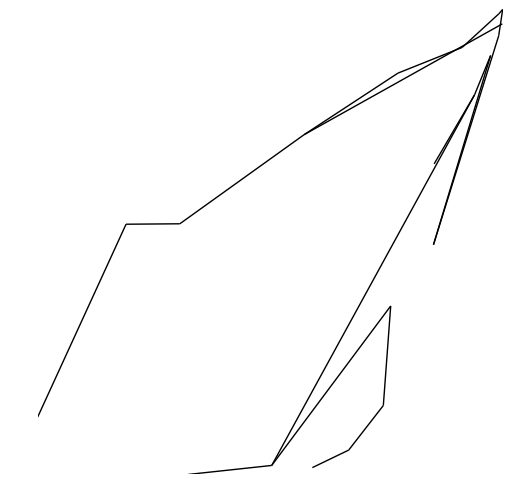

    After 20 iterations
        Discriminator Loss                         = -5.52280426025

    Generator_Loss: -4.951567173
126
    After 20 iterations
        Discriminator Loss                         = -4.98387861252

    Generator_Loss: -5.02957439423
127
    After 20 iterations
        Discriminator Loss                         = -4.46916437149

    Generator_Loss: -5.29549455643
128
    After 20 iterations
        Discriminator Loss                         = -4.67763566971

    Generator_Loss: -5.359998703
129
    After 20 iterations
        Discriminator Loss                         = -4.71380329132

    Generator_Loss: -5.65877008438
130
    After 20 iterations
        Discriminator Loss                         = -4.79128313065

    Generator_Loss: -6.07704973221
131
    After 20 iterations
        Discriminator Loss                         = -4.47461032867

    Generator_Loss: -6.34652042389
132
    After 20 iterations
        Discriminator Loss                         = -5.

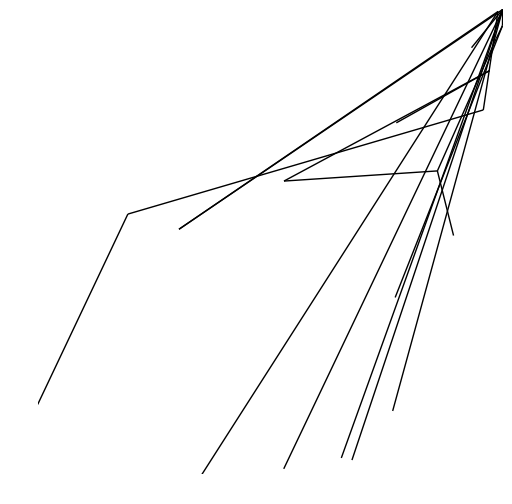

    After 20 iterations
        Discriminator Loss                         = -5.21181058884

    Generator_Loss: -7.24108695984
151
    After 20 iterations
        Discriminator Loss                         = -4.78014802933

    Generator_Loss: -7.28419780731
152
    After 20 iterations
        Discriminator Loss                         = -4.95402479172

    Generator_Loss: -7.32386350632
153
    After 20 iterations
        Discriminator Loss                         = -4.18413257599

    Generator_Loss: -7.44025278091
154
    After 20 iterations
        Discriminator Loss                         = -5.06293725967

    Generator_Loss: -6.83736801147
155
    After 20 iterations
        Discriminator Loss                         = -5.09037446976

    Generator_Loss: -6.45174598694
156
    After 20 iterations
        Discriminator Loss                         = -4.50924634933

    Generator_Loss: -6.71791028976
157
    After 20 iterations
        Discriminator Loss                         =

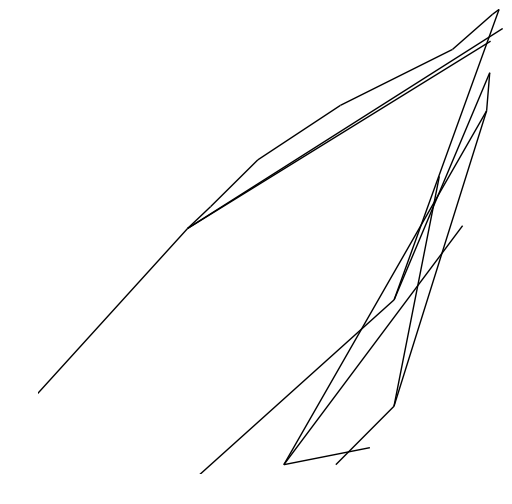

    After 20 iterations
        Discriminator Loss                         = -4.83997249603

    Generator_Loss: -7.55198764801
176
    After 20 iterations
        Discriminator Loss                         = -4.25329399109

    Generator_Loss: -7.7197303772
177
    After 20 iterations
        Discriminator Loss                         = -4.04329395294

    Generator_Loss: -7.86861228943
178
    After 20 iterations
        Discriminator Loss                         = -4.50989341736

    Generator_Loss: -7.93155622482
179
    After 20 iterations
        Discriminator Loss                         = -4.40421867371

    Generator_Loss: -8.24413585663
180
    After 20 iterations
        Discriminator Loss                         = -4.43913221359

    Generator_Loss: -8.18264389038
181
    After 20 iterations
        Discriminator Loss                         = -4.51882600784

    Generator_Loss: -7.89641427994
182
    After 20 iterations
        Discriminator Loss                         = 

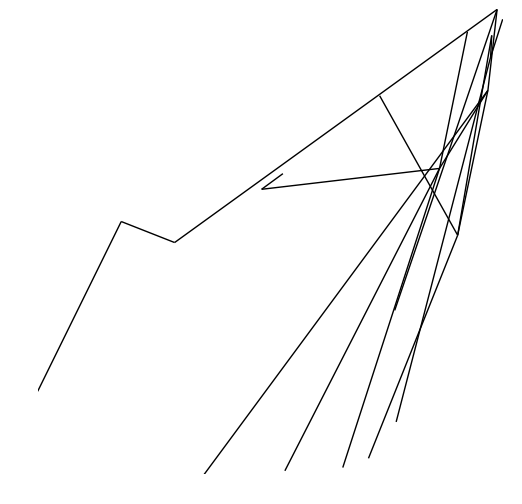

    After 20 iterations
        Discriminator Loss                         = -4.39427518845

    Generator_Loss: -6.4603600502
201
    After 20 iterations
        Discriminator Loss                         = -3.75966715813

    Generator_Loss: -6.62995910645
202
    After 20 iterations
        Discriminator Loss                         = -4.19989490509

    Generator_Loss: -6.19861793518
203
    After 20 iterations
        Discriminator Loss                         = -4.02187490463

    Generator_Loss: -6.17155504227
204
    After 20 iterations
        Discriminator Loss                         = -3.868475914

    Generator_Loss: -6.40523099899
205
    After 20 iterations
        Discriminator Loss                         = -4.50810289383

    Generator_Loss: -6.38048124313
206
    After 20 iterations
        Discriminator Loss                         = -4.4390206337

    Generator_Loss: -6.25972127914
207
    After 20 iterations
        Discriminator Loss                         = -3.

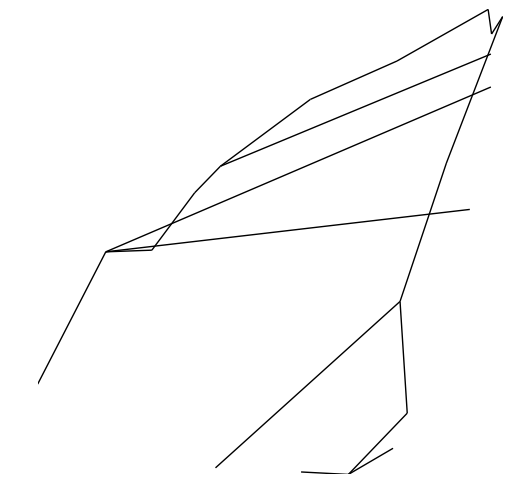

    After 20 iterations
        Discriminator Loss                         = -3.86731171608

    Generator_Loss: -7.69469642639
226
    After 20 iterations
        Discriminator Loss                         = -3.65882396698

    Generator_Loss: -7.74783563614
227
    After 20 iterations
        Discriminator Loss                         = -3.64654684067

    Generator_Loss: -7.78209400177
228
    After 20 iterations
        Discriminator Loss                         = -3.69404363632

    Generator_Loss: -8.01311302185
229
    After 20 iterations
        Discriminator Loss                         = -4.15676212311

    Generator_Loss: -7.84816122055
230
    After 20 iterations
        Discriminator Loss                         = -3.83985257149

    Generator_Loss: -7.78373718262
231
    After 20 iterations
        Discriminator Loss                         = -3.75720334053

    Generator_Loss: -8.11846065521
232
    After 20 iterations
        Discriminator Loss                         =

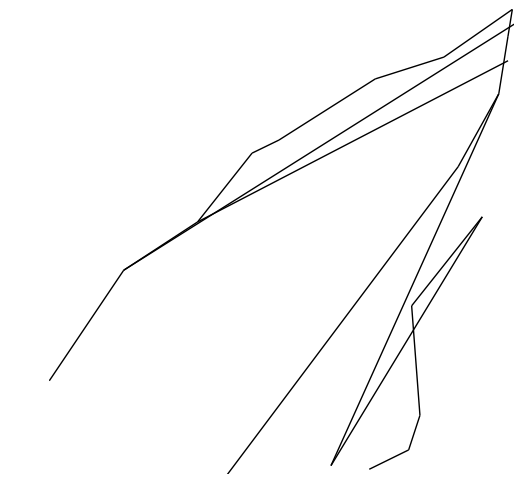

    After 20 iterations
        Discriminator Loss                         = -3.58242821693

    Generator_Loss: -8.28474998474
251
    After 20 iterations
        Discriminator Loss                         = -4.05004549026

    Generator_Loss: -8.11483955383
252
    After 20 iterations
        Discriminator Loss                         = -4.31978797913

    Generator_Loss: -7.70688724518
253
    After 20 iterations
        Discriminator Loss                         = -3.99867892265

    Generator_Loss: -7.5991435051
254
    After 20 iterations
        Discriminator Loss                         = -3.91253757477

    Generator_Loss: -7.55063581467
255
    After 20 iterations
        Discriminator Loss                         = -3.93873238564

    Generator_Loss: -7.43714237213
256
    After 20 iterations
        Discriminator Loss                         = -3.16300177574

    Generator_Loss: -7.63706731796
257
    After 20 iterations
        Discriminator Loss                         = 

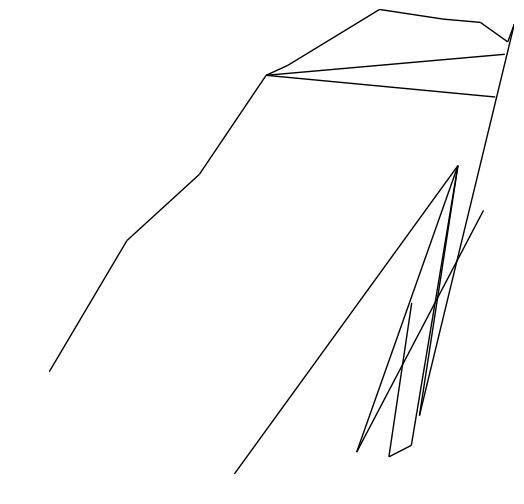

    After 20 iterations
        Discriminator Loss                         = -3.55300331116

    Generator_Loss: -7.76354074478
276
    After 20 iterations
        Discriminator Loss                         = -3.82371735573

    Generator_Loss: -7.62507104874
277
    After 20 iterations
        Discriminator Loss                         = -3.75697398186

    Generator_Loss: -7.86787939072
278
    After 20 iterations
        Discriminator Loss                         = -3.60149240494

    Generator_Loss: -7.85578870773
279
    After 20 iterations
        Discriminator Loss                         = -3.12565660477

    Generator_Loss: -8.0304069519
280
    After 20 iterations
        Discriminator Loss                         = -3.6368021965

    Generator_Loss: -8.12443256378
281
    After 20 iterations
        Discriminator Loss                         = -3.38626432419

    Generator_Loss: -8.13628768921
282
    After 20 iterations
        Discriminator Loss                         = -

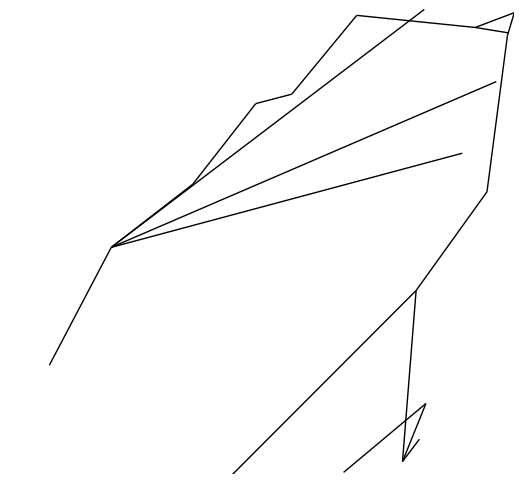

    After 20 iterations
        Discriminator Loss                         = -3.267775774

    Generator_Loss: -8.0278377533
301
    After 20 iterations
        Discriminator Loss                         = -3.64405846596

    Generator_Loss: -7.75694704056
302
    After 20 iterations
        Discriminator Loss                         = -3.07580256462

    Generator_Loss: -7.94207668304
303
    After 20 iterations
        Discriminator Loss                         = -3.68253064156

    Generator_Loss: -8.0433216095
304
    After 20 iterations
        Discriminator Loss                         = -3.13740444183

    Generator_Loss: -8.08545875549
305
    After 20 iterations
        Discriminator Loss                         = -3.2683095932

    Generator_Loss: -7.90892887115
306
    After 20 iterations
        Discriminator Loss                         = -3.43376421928

    Generator_Loss: -8.22126579285
307
    After 20 iterations
        Discriminator Loss                         = -3.4

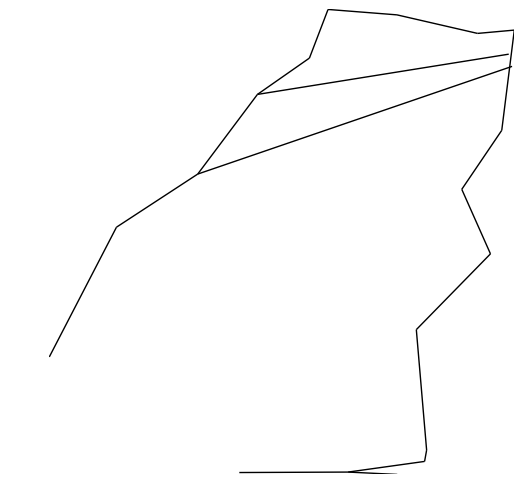

    After 20 iterations
        Discriminator Loss                         = -3.18908190727

    Generator_Loss: -6.69743824005
326
    After 20 iterations
        Discriminator Loss                         = -3.49738097191

    Generator_Loss: -6.59599637985
327
    After 20 iterations
        Discriminator Loss                         = -3.30605626106

    Generator_Loss: -6.96741437912
328
    After 20 iterations
        Discriminator Loss                         = -3.02947926521

    Generator_Loss: -7.35940885544
329
    After 20 iterations
        Discriminator Loss                         = -3.15439748764

    Generator_Loss: -7.20948123932
330
    After 20 iterations
        Discriminator Loss                         = -2.97118735313

    Generator_Loss: -7.28205966949
331
    After 20 iterations
        Discriminator Loss                         = -3.29921936989

    Generator_Loss: -7.41364812851
332
    After 20 iterations
        Discriminator Loss                         =

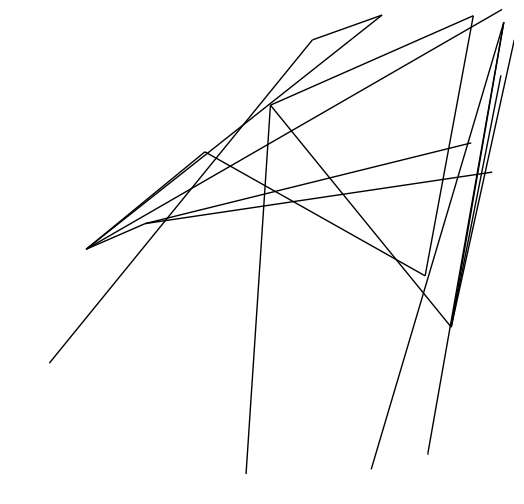

    After 20 iterations
        Discriminator Loss                         = -3.30435824394

    Generator_Loss: -7.59346723557
351
    After 20 iterations
        Discriminator Loss                         = -2.98897194862

    Generator_Loss: -7.74054145813
352
    After 20 iterations
        Discriminator Loss                         = -2.97277593613

    Generator_Loss: -7.71370983124
353
    After 20 iterations
        Discriminator Loss                         = -3.33155369759

    Generator_Loss: -7.33672332764
354
    After 20 iterations
        Discriminator Loss                         = -3.32236075401

    Generator_Loss: -7.30302906036
355
    After 20 iterations
        Discriminator Loss                         = -3.24965381622

    Generator_Loss: -7.34366226196
356
    After 20 iterations
        Discriminator Loss                         = -3.55041098595

    Generator_Loss: -7.29232883453
357
    After 20 iterations
        Discriminator Loss                         =

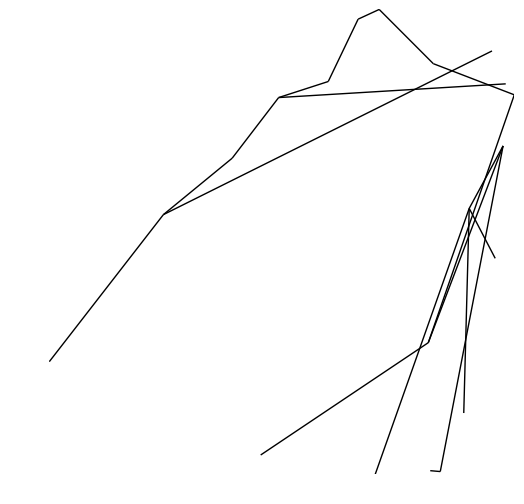

    After 20 iterations
        Discriminator Loss                         = -3.39951920509

    Generator_Loss: -6.93959856033
376
    After 20 iterations
        Discriminator Loss                         = -2.91447472572

    Generator_Loss: -7.128947258
377
    After 20 iterations
        Discriminator Loss                         = -3.39360308647

    Generator_Loss: -7.06349182129
378
    After 20 iterations
        Discriminator Loss                         = -3.05884289742

    Generator_Loss: -7.24058771133
379
    After 20 iterations
        Discriminator Loss                         = -3.1923892498

    Generator_Loss: -7.23044204712
380
    After 20 iterations
        Discriminator Loss                         = -2.86902236938

    Generator_Loss: -7.36269426346
381
    After 20 iterations
        Discriminator Loss                         = -2.79426598549

    Generator_Loss: -7.62149190903
382
    After 20 iterations
        Discriminator Loss                         = -3

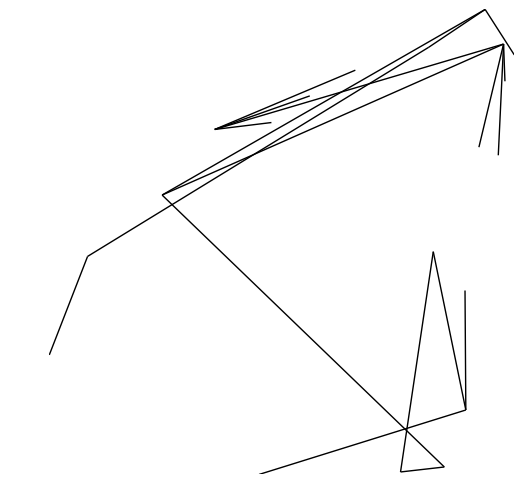

    After 20 iterations
        Discriminator Loss                         = -3.47826552391

    Generator_Loss: -7.22906589508
401
    After 20 iterations
        Discriminator Loss                         = -2.76897001266

    Generator_Loss: -7.44730806351
402
    After 20 iterations
        Discriminator Loss                         = -3.27264022827

    Generator_Loss: -7.32946395874
403
    After 20 iterations
        Discriminator Loss                         = -2.66556072235

    Generator_Loss: -7.6016664505
404
    After 20 iterations
        Discriminator Loss                         = -2.50841116905

    Generator_Loss: -7.70289182663
405
    After 20 iterations
        Discriminator Loss                         = -2.93162608147

    Generator_Loss: -7.75234079361
406
    After 20 iterations
        Discriminator Loss                         = -3.04362010956

    Generator_Loss: -7.89543294907
407
    After 20 iterations
        Discriminator Loss                         = 

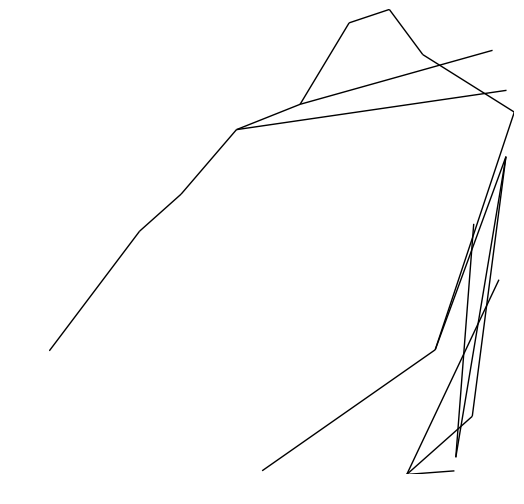

    After 20 iterations
        Discriminator Loss                         = -3.31602168083

    Generator_Loss: -6.94885253906
426
    After 20 iterations
        Discriminator Loss                         = -2.82602405548

    Generator_Loss: -6.8694152832
427
    After 20 iterations
        Discriminator Loss                         = -2.51091861725

    Generator_Loss: -6.98073196411
428
    After 20 iterations
        Discriminator Loss                         = -2.41860175133

    Generator_Loss: -7.577023983
429
    After 20 iterations
        Discriminator Loss                         = -3.11748290062

    Generator_Loss: -8.04805660248
430
    After 20 iterations
        Discriminator Loss                         = -2.74107861519

    Generator_Loss: -8.36999607086
431
    After 20 iterations
        Discriminator Loss                         = -2.88241481781

    Generator_Loss: -8.51118946075
432
    After 20 iterations
        Discriminator Loss                         = -2

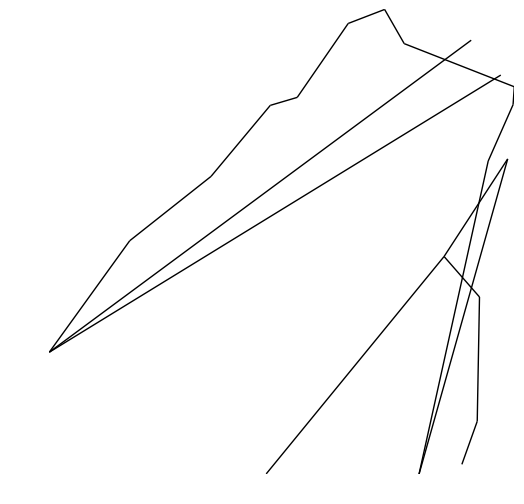

    After 20 iterations
        Discriminator Loss                         = -2.9781370163

    Generator_Loss: -7.51025915146
451
    After 20 iterations
        Discriminator Loss                         = -2.96264338493

    Generator_Loss: -7.50127124786
452
    After 20 iterations
        Discriminator Loss                         = -2.42919683456

    Generator_Loss: -7.67550086975
453
    After 20 iterations
        Discriminator Loss                         = -2.53389382362

    Generator_Loss: -7.94383716583
454
    After 20 iterations
        Discriminator Loss                         = -2.66965484619

    Generator_Loss: -8.19726371765
455
    After 20 iterations
        Discriminator Loss                         = -2.30521678925

    Generator_Loss: -8.40100765228
456
    After 20 iterations
        Discriminator Loss                         = -2.80129575729

    Generator_Loss: -8.80916023254
457
    After 20 iterations
        Discriminator Loss                         = 

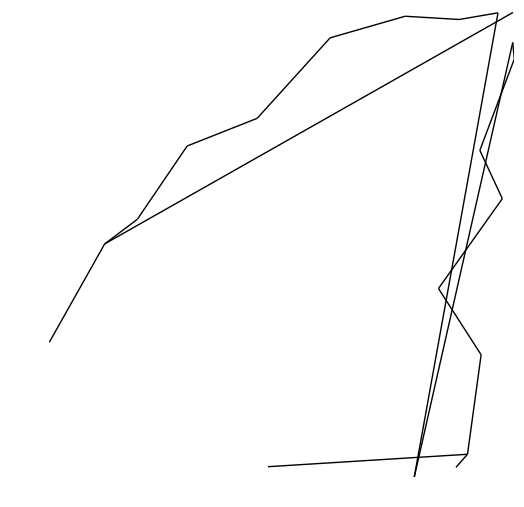

    After 20 iterations
        Discriminator Loss                         = -2.71160912514

    Generator_Loss: -7.58562469482
476
    After 20 iterations
        Discriminator Loss                         = -2.90512728691

    Generator_Loss: -7.17516565323
477
    After 20 iterations
        Discriminator Loss                         = -2.90195250511

    Generator_Loss: -6.99946641922
478
    After 20 iterations
        Discriminator Loss                         = -2.56211233139

    Generator_Loss: -6.99265384674
479
    After 20 iterations
        Discriminator Loss                         = -2.34204936028

    Generator_Loss: -7.17489147186
480
    After 20 iterations
        Discriminator Loss                         = -2.89839839935

    Generator_Loss: -7.03539419174
481
    After 20 iterations
        Discriminator Loss                         = -2.71361351013

    Generator_Loss: -6.98877191544
482
    After 20 iterations
        Discriminator Loss                         =

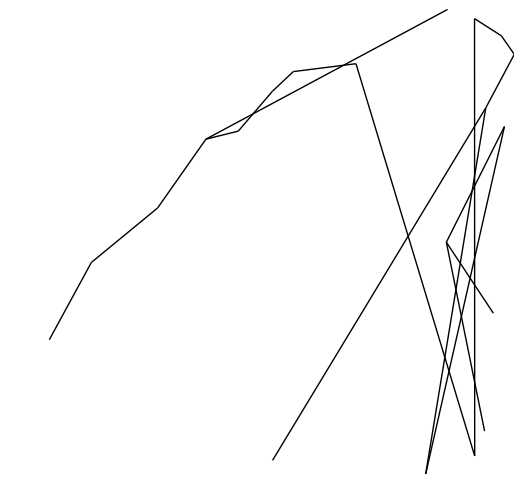

    After 20 iterations
        Discriminator Loss                         = -2.44886684418

    Generator_Loss: -8.63929176331
501
    After 20 iterations
        Discriminator Loss                         = -2.80191469193

    Generator_Loss: -8.57575416565
502
    After 20 iterations
        Discriminator Loss                         = -2.73719334602

    Generator_Loss: -8.53235912323
503
    After 20 iterations
        Discriminator Loss                         = -2.64397358894

    Generator_Loss: -8.49039936066
504
    After 20 iterations
        Discriminator Loss                         = -2.93511414528

    Generator_Loss: -8.34445667267
505
    After 20 iterations
        Discriminator Loss                         = -2.8314204216

    Generator_Loss: -8.27635478973
506
    After 20 iterations
        Discriminator Loss                         = -2.63498163223

    Generator_Loss: -8.28246307373
507
    After 20 iterations
        Discriminator Loss                         = 

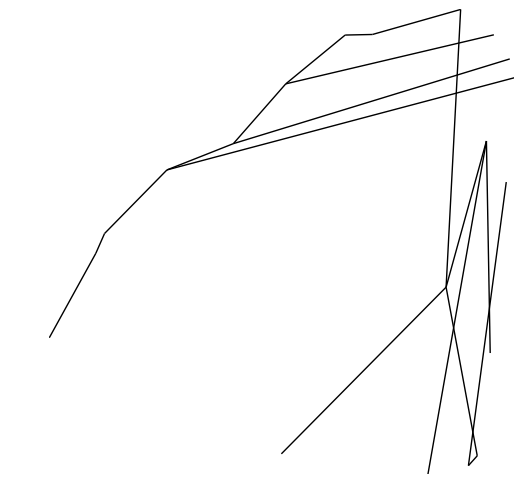

    After 20 iterations
        Discriminator Loss                         = -2.33185338974

    Generator_Loss: -8.41697692871
526
    After 20 iterations
        Discriminator Loss                         = -2.57148122787

    Generator_Loss: -8.44551086426
527
    After 20 iterations
        Discriminator Loss                         = -2.31504321098

    Generator_Loss: -8.34417724609
528
    After 20 iterations
        Discriminator Loss                         = -2.92461919785

    Generator_Loss: -7.94646453857
529
    After 20 iterations
        Discriminator Loss                         = -2.69282722473

    Generator_Loss: -7.40559148788
530
    After 20 iterations
        Discriminator Loss                         = -2.29039812088

    Generator_Loss: -7.30017995834
531
    After 20 iterations
        Discriminator Loss                         = -2.47427606583

    Generator_Loss: -7.17793941498
532
    After 20 iterations
        Discriminator Loss                         =

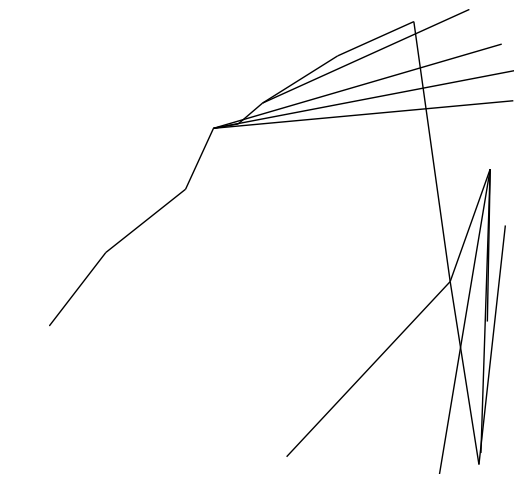

    After 20 iterations
        Discriminator Loss                         = -2.32272648811

    Generator_Loss: -7.74123382568
551
    After 20 iterations
        Discriminator Loss                         = -2.76759433746

    Generator_Loss: -7.54208755493
552
    After 20 iterations
        Discriminator Loss                         = -2.41180157661

    Generator_Loss: -7.28293037415
553
    After 20 iterations
        Discriminator Loss                         = -2.5265622139

    Generator_Loss: -7.15729856491
554
    After 20 iterations
        Discriminator Loss                         = -2.50653529167

    Generator_Loss: -6.9491891861
555
    After 20 iterations
        Discriminator Loss                         = -2.25138092041

    Generator_Loss: -6.96057605743
556
    After 20 iterations
        Discriminator Loss                         = -2.48084259033

    Generator_Loss: -6.57739305496
557
    After 20 iterations
        Discriminator Loss                         = -

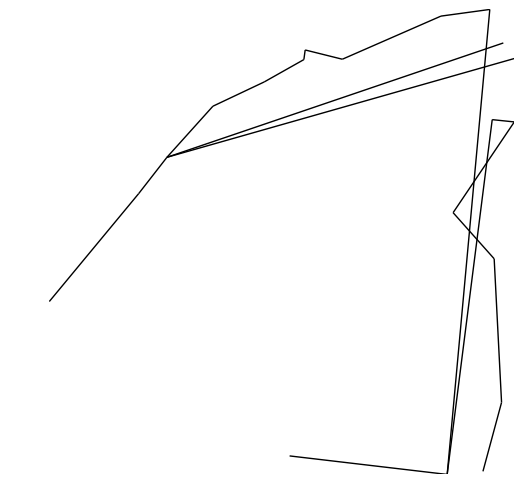

    After 20 iterations
        Discriminator Loss                         = -2.44722604752

    Generator_Loss: -7.6616897583
576
    After 20 iterations
        Discriminator Loss                         = -2.68600392342

    Generator_Loss: -7.61330842972
577
    After 20 iterations
        Discriminator Loss                         = -2.57605791092

    Generator_Loss: -7.70750188828
578
    After 20 iterations
        Discriminator Loss                         = -2.14502120018

    Generator_Loss: -8.01357460022
579
    After 20 iterations
        Discriminator Loss                         = -2.3323829174

    Generator_Loss: -8.1413898468
580
    After 20 iterations
        Discriminator Loss                         = -1.89282882214

    Generator_Loss: -8.2853345871
581
    After 20 iterations
        Discriminator Loss                         = -2.48885679245

    Generator_Loss: -8.21064662933
582
    After 20 iterations
        Discriminator Loss                         = -1.

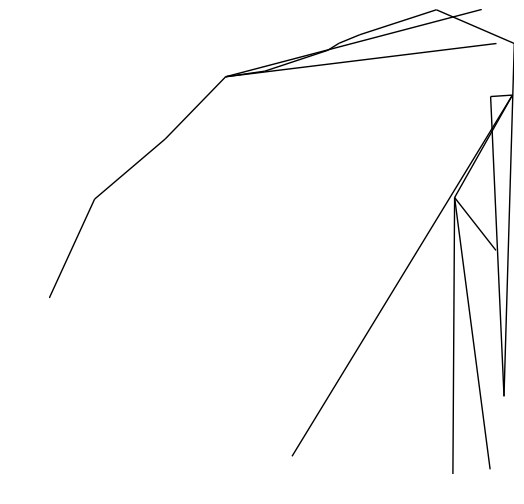

    After 20 iterations
        Discriminator Loss                         = -2.47344923019

    Generator_Loss: -9.39440441132
601
    After 20 iterations
        Discriminator Loss                         = -2.22168135643

    Generator_Loss: -9.37662315369
602
    After 20 iterations
        Discriminator Loss                         = -2.40224480629

    Generator_Loss: -9.41161060333
603
    After 20 iterations
        Discriminator Loss                         = -2.31820845604

    Generator_Loss: -9.29351711273
604
    After 20 iterations
        Discriminator Loss                         = -2.07735943794

    Generator_Loss: -9.29058170319
605
    After 20 iterations
        Discriminator Loss                         = -2.55156421661

    Generator_Loss: -8.91006469727
606
    After 20 iterations
        Discriminator Loss                         = -2.57212662697

    Generator_Loss: -8.47722816467
607
    After 20 iterations
        Discriminator Loss                         =

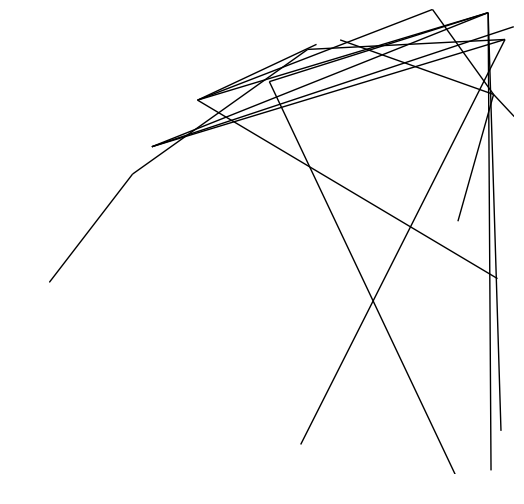

    After 20 iterations
        Discriminator Loss                         = -2.01157903671

    Generator_Loss: -7.04154491425
626
    After 20 iterations
        Discriminator Loss                         = -2.31065583229

    Generator_Loss: -7.31774377823
627
    After 20 iterations
        Discriminator Loss                         = -1.66301560402

    Generator_Loss: -7.72668075562
628
    After 20 iterations
        Discriminator Loss                         = -2.24473285675

    Generator_Loss: -8.01736927032
629
    After 20 iterations
        Discriminator Loss                         = -2.27520346642

    Generator_Loss: -8.10005474091
630
    After 20 iterations
        Discriminator Loss                         = -2.58900308609

    Generator_Loss: -8.41846084595
631
    After 20 iterations
        Discriminator Loss                         = -2.27824902534

    Generator_Loss: -8.49633979797
632
    After 20 iterations
        Discriminator Loss                         =

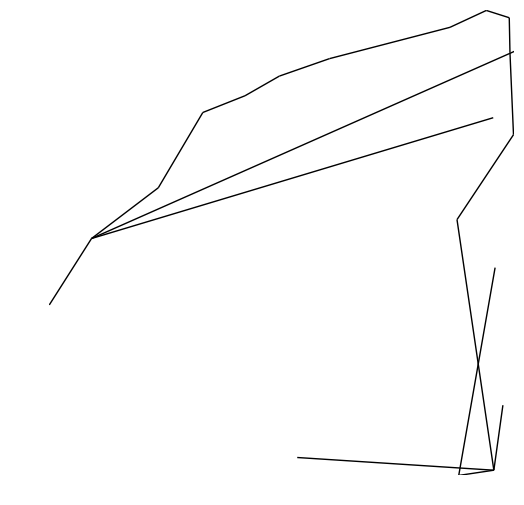

    After 20 iterations
        Discriminator Loss                         = -1.94914638996

    Generator_Loss: -7.7021613121
651
    After 20 iterations
        Discriminator Loss                         = -2.06985044479

    Generator_Loss: -7.68736457825
652
    After 20 iterations
        Discriminator Loss                         = -2.49253702164

    Generator_Loss: -7.44050264359
653
    After 20 iterations
        Discriminator Loss                         = -1.89787638187

    Generator_Loss: -7.50149583817
654
    After 20 iterations
        Discriminator Loss                         = -2.50283384323

    Generator_Loss: -7.09083509445
655
    After 20 iterations
        Discriminator Loss                         = -1.98732459545

    Generator_Loss: -6.99749422073
656
    After 20 iterations
        Discriminator Loss                         = -2.18267321587

    Generator_Loss: -6.79606151581
657
    After 20 iterations
        Discriminator Loss                         = 

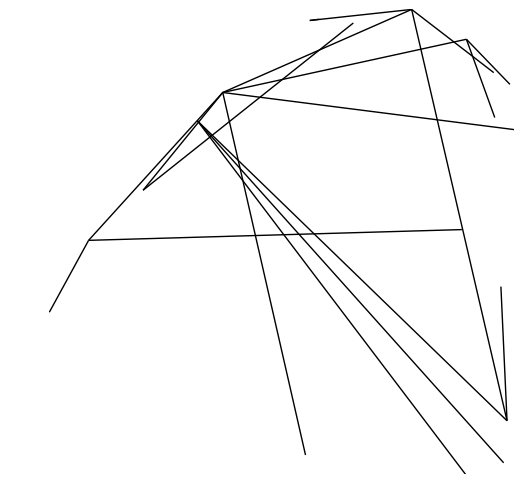

    After 20 iterations
        Discriminator Loss                         = -2.4347345829

    Generator_Loss: -8.27474212646
676
    After 20 iterations
        Discriminator Loss                         = -2.07313203812

    Generator_Loss: -7.96783876419
677
    After 20 iterations
        Discriminator Loss                         = -1.96730005741

    Generator_Loss: -7.68152093887
678
    After 20 iterations
        Discriminator Loss                         = -1.8052264452

    Generator_Loss: -7.2661190033
679
    After 20 iterations
        Discriminator Loss                         = -1.67681908607

    Generator_Loss: -6.94041204453
680
    After 20 iterations
        Discriminator Loss                         = -1.88497769833

    Generator_Loss: -6.49828481674
681
    After 20 iterations
        Discriminator Loss                         = -2.48203849792

    Generator_Loss: -6.0210943222
682
    After 20 iterations
        Discriminator Loss                         = -2.

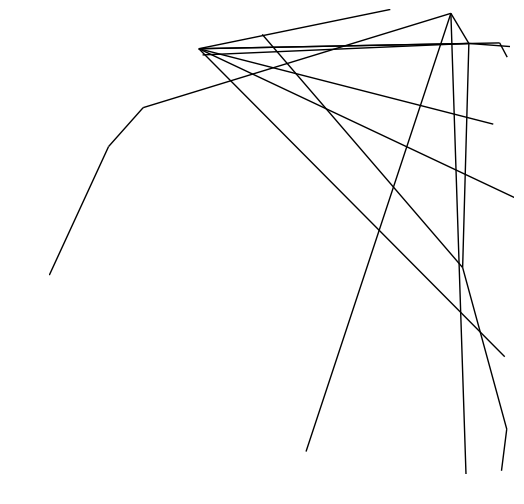

    After 20 iterations
        Discriminator Loss                         = -1.94380199909

    Generator_Loss: -9.68684673309
701
    After 20 iterations
        Discriminator Loss                         = -2.18656206131

    Generator_Loss: -9.55560016632
702
    After 20 iterations
        Discriminator Loss                         = -2.11099600792

    Generator_Loss: -9.32472133636
703
    After 20 iterations
        Discriminator Loss                         = -2.24323105812

    Generator_Loss: -9.18275642395
704
    After 20 iterations
        Discriminator Loss                         = -2.16377782822

    Generator_Loss: -8.93437957764
705
    After 20 iterations
        Discriminator Loss                         = -2.09289050102

    Generator_Loss: -8.7075586319
706
    After 20 iterations
        Discriminator Loss                         = -2.37462043762

    Generator_Loss: -8.69723320007
707
    After 20 iterations
        Discriminator Loss                         = 

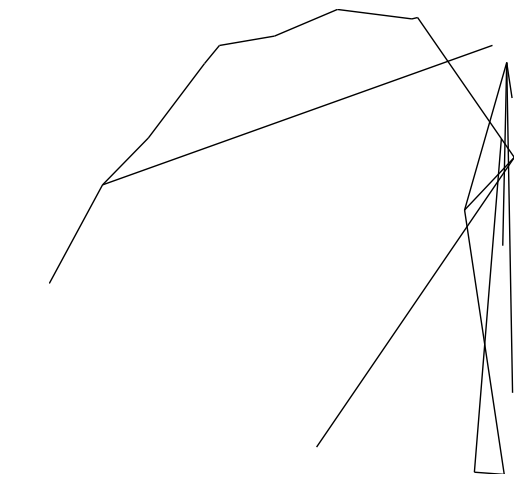

    After 20 iterations
        Discriminator Loss                         = -1.9753459692

    Generator_Loss: -7.39161539078
726
    After 20 iterations
        Discriminator Loss                         = -2.05737996101

    Generator_Loss: -7.70510530472
727
    After 20 iterations
        Discriminator Loss                         = -1.62875902653

    Generator_Loss: -8.44203853607
728
    After 20 iterations
        Discriminator Loss                         = -1.95614171028

    Generator_Loss: -8.83128738403
729
    After 20 iterations
        Discriminator Loss                         = -1.55544090271

    Generator_Loss: -9.03115558624
730
    After 20 iterations
        Discriminator Loss                         = -1.74625849724

    Generator_Loss: -9.34933948517
731
    After 20 iterations
        Discriminator Loss                         = -1.65831160545

    Generator_Loss: -9.65179824829
732
    After 20 iterations
        Discriminator Loss                         = 

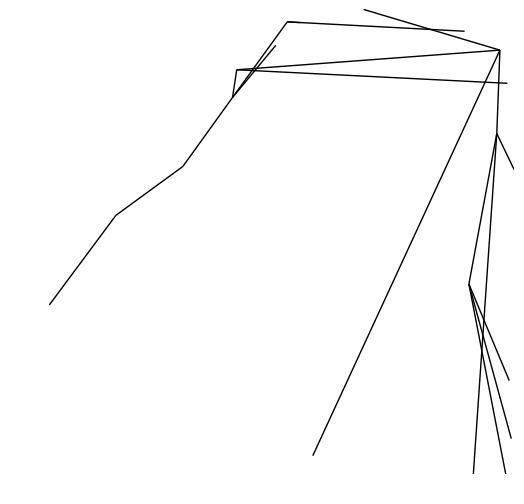

    After 20 iterations
        Discriminator Loss                         = -1.69118416309

    Generator_Loss: -10.5392894745
751
    After 20 iterations
        Discriminator Loss                         = -1.93767857552

    Generator_Loss: -10.4580783844
752
    After 20 iterations
        Discriminator Loss                         = -1.88833248615

    Generator_Loss: -10.499250412
753
    After 20 iterations
        Discriminator Loss                         = -2.10501194

    Generator_Loss: -10.5901794434
754
    After 20 iterations
        Discriminator Loss                         = -1.89375865459

    Generator_Loss: -10.5589227676
755
    After 20 iterations
        Discriminator Loss                         = -2.16040301323

    Generator_Loss: -10.6334838867
756
    After 20 iterations
        Discriminator Loss                         = -2.3163819313

    Generator_Loss: -10.8538980484
757
    After 20 iterations
        Discriminator Loss                         = -2.0

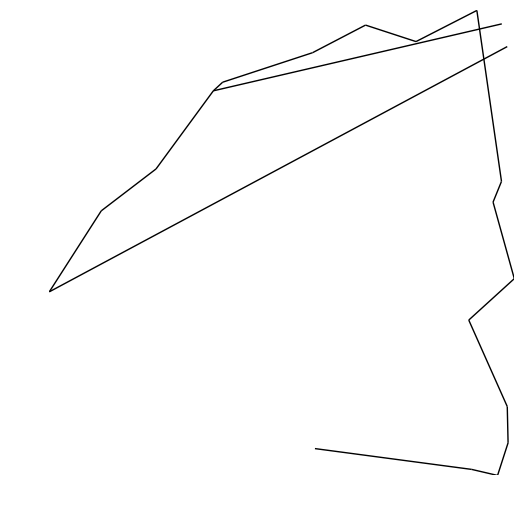

    After 20 iterations
        Discriminator Loss                         = -1.60941457748

    Generator_Loss: -7.84920787811
776
    After 20 iterations
        Discriminator Loss                         = -1.92741918564

    Generator_Loss: -7.71967983246
777
    After 20 iterations
        Discriminator Loss                         = -1.97280919552

    Generator_Loss: -7.62888050079
778
    After 20 iterations
        Discriminator Loss                         = -2.06369709969

    Generator_Loss: -7.69562911987
779
    After 20 iterations
        Discriminator Loss                         = -1.82662606239

    Generator_Loss: -7.74290466309
780
    After 20 iterations
        Discriminator Loss                         = -2.09397673607

    Generator_Loss: -7.84474992752
781

    Epoch #1

    After 20 iterations
        Discriminator Loss                         = -1.99551224709

    Generator_Loss: -7.64863443375
2
    After 20 iterations
        Discriminator Loss             

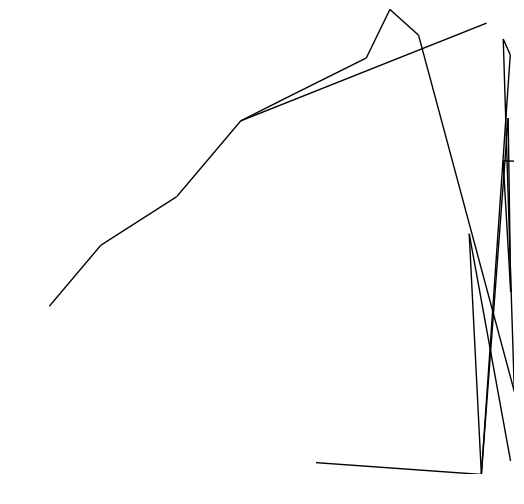

    After 20 iterations
        Discriminator Loss                         = -2.12128639221

    Generator_Loss: -4.42615318298
26
    After 20 iterations
        Discriminator Loss                         = -1.64679145813

    Generator_Loss: -5.18794202805
27
    After 20 iterations
        Discriminator Loss                         = -1.81401765347

    Generator_Loss: -5.28026151657
28
    After 20 iterations
        Discriminator Loss                         = -2.17474555969

    Generator_Loss: -5.32062578201
29
    After 20 iterations
        Discriminator Loss                         = -1.98344731331

    Generator_Loss: -5.37526702881
30
    After 20 iterations
        Discriminator Loss                         = -1.82822358608

    Generator_Loss: -5.37748861313
31
    After 20 iterations
        Discriminator Loss                         = -1.55484759808

    Generator_Loss: -5.62190389633
32
    After 20 iterations
        Discriminator Loss                         = -1.549

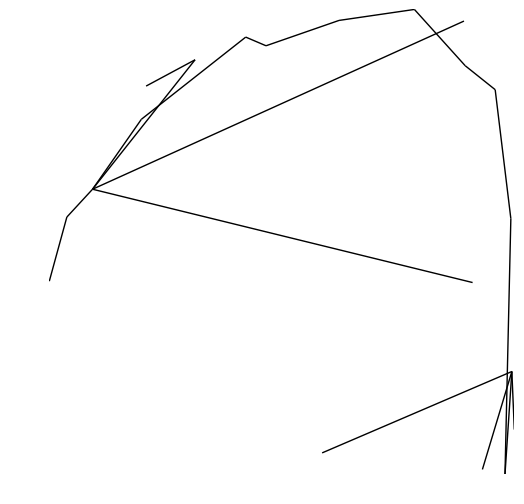

    After 20 iterations
        Discriminator Loss                         = -1.48276340961

    Generator_Loss: -8.02652168274
51
    After 20 iterations
        Discriminator Loss                         = -1.72603821754

    Generator_Loss: -8.27806854248
52
    After 20 iterations
        Discriminator Loss                         = -1.83133709431

    Generator_Loss: -8.37655162811
53
    After 20 iterations
        Discriminator Loss                         = -1.77665805817

    Generator_Loss: -8.67122745514
54
    After 20 iterations
        Discriminator Loss                         = -2.1175339222

    Generator_Loss: -8.87656497955
55
    After 20 iterations
        Discriminator Loss                         = -2.07310914993

    Generator_Loss: -9.08096313477
56
    After 20 iterations
        Discriminator Loss                         = -2.05683231354

    Generator_Loss: -9.50829219818
57
    After 20 iterations
        Discriminator Loss                         = -1.9914

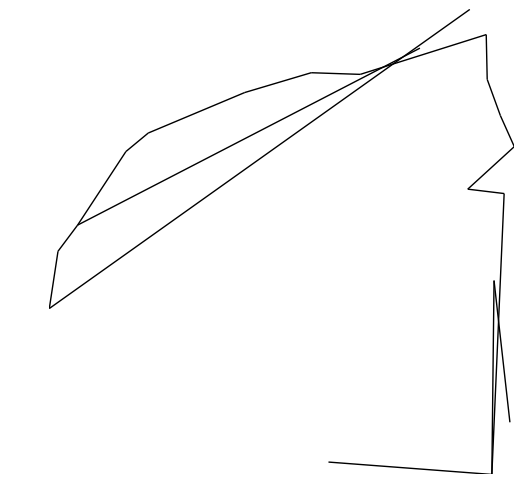

    After 20 iterations
        Discriminator Loss                         = -1.52815639973

    Generator_Loss: -8.70261955261
76
    After 20 iterations
        Discriminator Loss                         = -1.76821577549

    Generator_Loss: -8.88484477997
77
    After 20 iterations
        Discriminator Loss                         = -1.78788638115

    Generator_Loss: -8.92318534851
78
    After 20 iterations
        Discriminator Loss                         = -1.76612341404

    Generator_Loss: -8.84194660187
79
    After 20 iterations
        Discriminator Loss                         = -1.9061934948

    Generator_Loss: -8.7277841568
80
    After 20 iterations
        Discriminator Loss                         = -1.92047774792

    Generator_Loss: -8.84303188324
81
    After 20 iterations
        Discriminator Loss                         = -1.94421410561

    Generator_Loss: -9.06817722321
82
    After 20 iterations
        Discriminator Loss                         = -1.79664

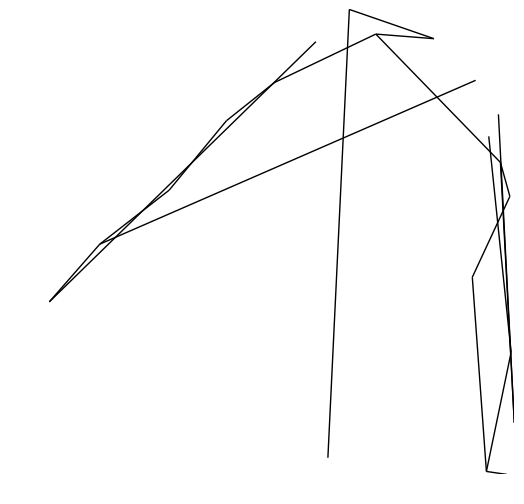

    After 20 iterations
        Discriminator Loss                         = -1.80067515373

    Generator_Loss: -7.96557283401
101
    After 20 iterations
        Discriminator Loss                         = -2.0172932148

    Generator_Loss: -7.55296325684
102
    After 20 iterations
        Discriminator Loss                         = -1.4977530241

    Generator_Loss: -7.60321331024
103
    After 20 iterations
        Discriminator Loss                         = -1.59742450714

    Generator_Loss: -7.55028295517
104
    After 20 iterations
        Discriminator Loss                         = -1.52450096607

    Generator_Loss: -7.45168018341
105
    After 20 iterations
        Discriminator Loss                         = -1.6982717514

    Generator_Loss: -7.16166877747
106
    After 20 iterations
        Discriminator Loss                         = -1.63934755325

    Generator_Loss: -6.80900096893
107
    After 20 iterations
        Discriminator Loss                         = -1

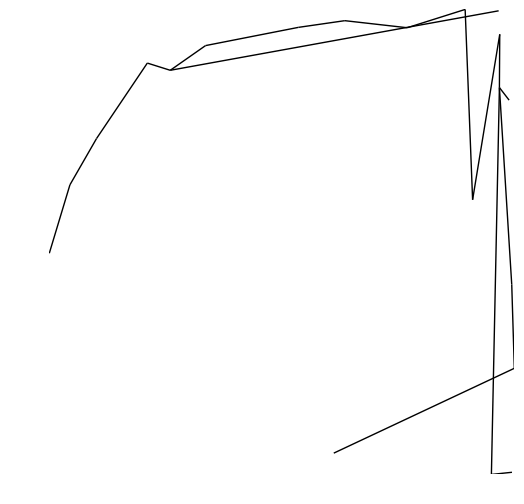

    After 20 iterations
        Discriminator Loss                         = -1.75685811043

    Generator_Loss: -9.68274116516
126
    After 20 iterations
        Discriminator Loss                         = -1.39276325703

    Generator_Loss: -9.80886459351
127
    After 20 iterations
        Discriminator Loss                         = -1.4388666153

    Generator_Loss: -9.96324157715
128
    After 20 iterations
        Discriminator Loss                         = -1.42816448212

    Generator_Loss: -9.74506950378
129
    After 20 iterations
        Discriminator Loss                         = -1.44510149956

    Generator_Loss: -9.51676940918
130
    After 20 iterations
        Discriminator Loss                         = -1.76178789139

    Generator_Loss: -9.39198589325
131
    After 20 iterations
        Discriminator Loss                         = -1.6385730505

    Generator_Loss: -9.17897701263
132
    After 20 iterations
        Discriminator Loss                         = -

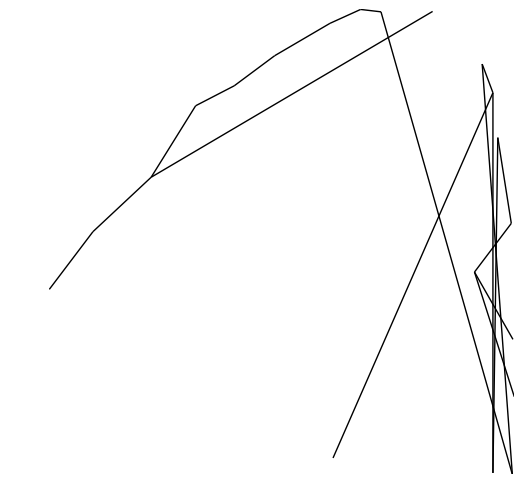

    After 20 iterations
        Discriminator Loss                         = -1.8391430378

    Generator_Loss: -9.15264034271
151
    After 20 iterations
        Discriminator Loss                         = -1.4631626606

    Generator_Loss: -9.19883823395
152
    After 20 iterations
        Discriminator Loss                         = -1.59445250034

    Generator_Loss: -9.24835395813
153
    After 20 iterations
        Discriminator Loss                         = -1.28857052326

    Generator_Loss: -9.30586624146
154
    After 20 iterations
        Discriminator Loss                         = -1.70859527588

    Generator_Loss: -9.04492950439
155
    After 20 iterations
        Discriminator Loss                         = -1.70319485664

    Generator_Loss: -8.9599237442
156
    After 20 iterations
        Discriminator Loss                         = -1.47935652733

    Generator_Loss: -8.96303653717
157
    After 20 iterations
        Discriminator Loss                         = -1

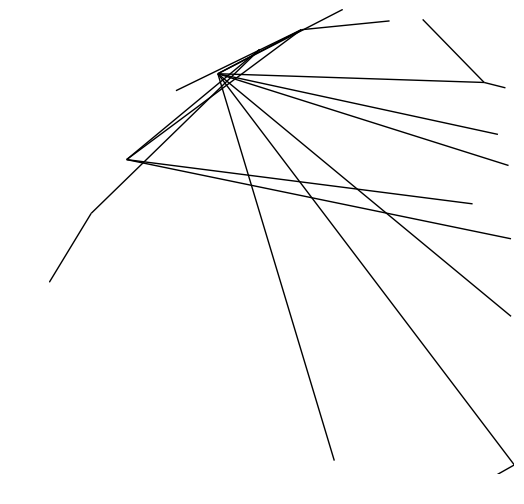

    After 20 iterations
        Discriminator Loss                         = -1.71526265144

    Generator_Loss: -9.72480964661
176
    After 20 iterations
        Discriminator Loss                         = -1.39726316929

    Generator_Loss: -9.79581642151
177
    After 20 iterations
        Discriminator Loss                         = -1.04561388493

    Generator_Loss: -9.77200508118
178
    After 20 iterations
        Discriminator Loss                         = -1.45089375973

    Generator_Loss: -9.75516891479
179
    After 20 iterations
        Discriminator Loss                         = -1.45072829723

    Generator_Loss: -9.92970275879
180
    After 20 iterations
        Discriminator Loss                         = -1.34516465664

    Generator_Loss: -10.001206398
181
    After 20 iterations
        Discriminator Loss                         = -1.56394851208

    Generator_Loss: -10.0234298706
182
    After 20 iterations
        Discriminator Loss                         = 

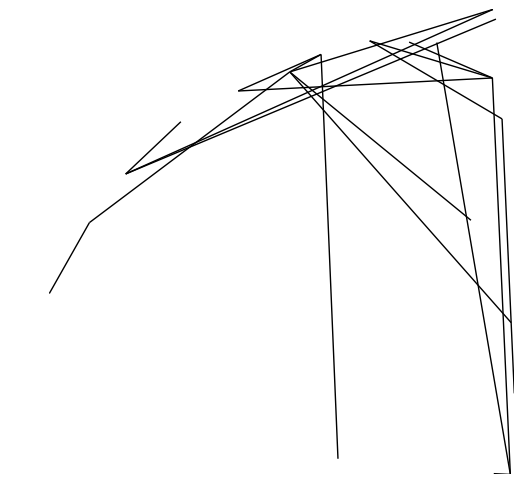

    After 20 iterations
        Discriminator Loss                         = -1.45055651665

    Generator_Loss: -8.27990245819
201
    After 20 iterations
        Discriminator Loss                         = -1.18135070801

    Generator_Loss: -8.3951625824
202
    After 20 iterations
        Discriminator Loss                         = -1.43986999989

    Generator_Loss: -8.22324848175
203
    After 20 iterations
        Discriminator Loss                         = -1.40254974365

    Generator_Loss: -8.27161407471
204
    After 20 iterations
        Discriminator Loss                         = -1.37626111507

    Generator_Loss: -8.45822429657
205
    After 20 iterations
        Discriminator Loss                         = -1.64457035065

    Generator_Loss: -8.50140666962
206
    After 20 iterations
        Discriminator Loss                         = -1.6972001791

    Generator_Loss: -8.4267282486
207
    After 20 iterations
        Discriminator Loss                         = -1

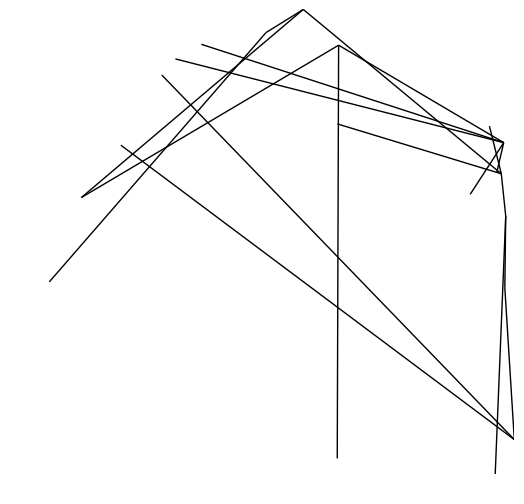

    After 20 iterations
        Discriminator Loss                         = -1.28317928314

    Generator_Loss: -7.51275205612
226
    After 20 iterations
        Discriminator Loss                         = -1.17723822594

    Generator_Loss: -7.5632519722
227
    After 20 iterations
        Discriminator Loss                         = -1.07456803322

    Generator_Loss: -7.57144069672
228
    After 20 iterations
        Discriminator Loss                         = -1.39361405373

    Generator_Loss: -7.63403224945
229
    After 20 iterations
        Discriminator Loss                         = -1.6114654541

    Generator_Loss: -7.63468837738
230
    After 20 iterations
        Discriminator Loss                         = -1.43857741356

    Generator_Loss: -7.7286233902
231
    After 20 iterations
        Discriminator Loss                         = -1.5102673769

    Generator_Loss: -8.14740657806
232
    After 20 iterations
        Discriminator Loss                         = -1.

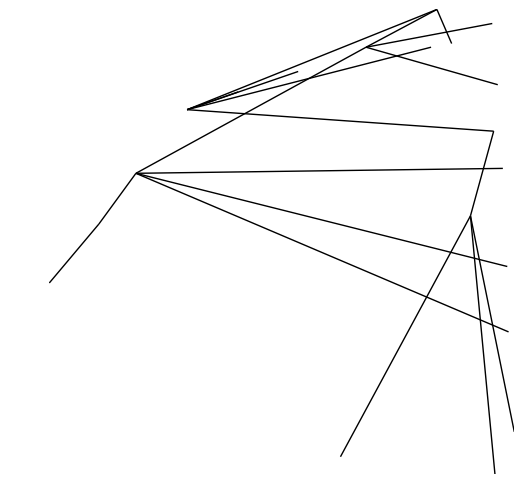

    After 20 iterations
        Discriminator Loss                         = -1.25520420074

    Generator_Loss: -7.42816448212
251
    After 20 iterations
        Discriminator Loss                         = -1.31734240055

    Generator_Loss: -7.22325754166
252
    After 20 iterations
        Discriminator Loss                         = -1.56676745415

    Generator_Loss: -6.78121376038
253
    After 20 iterations
        Discriminator Loss                         = -1.6185259819

    Generator_Loss: -6.61145734787
254
    After 20 iterations
        Discriminator Loss                         = -1.65705633163

    Generator_Loss: -6.57900905609
255
    After 20 iterations
        Discriminator Loss                         = -1.65940868855

    Generator_Loss: -6.48514938354
256
    After 20 iterations
        Discriminator Loss                         = -1.02720403671

    Generator_Loss: -6.69478225708
257
    After 20 iterations
        Discriminator Loss                         = 

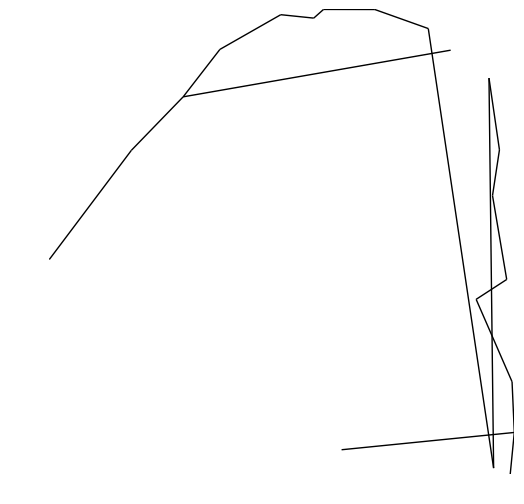

    After 20 iterations
        Discriminator Loss                         = -1.27585959435

    Generator_Loss: -9.19150066376
276
    After 20 iterations
        Discriminator Loss                         = -1.28645884991

    Generator_Loss: -8.79929542542
277
    After 20 iterations
        Discriminator Loss                         = -1.435947299

    Generator_Loss: -8.5516576767
278
    After 20 iterations
        Discriminator Loss                         = -1.38334739208

    Generator_Loss: -8.21399784088
279
    After 20 iterations
        Discriminator Loss                         = -1.26002621651

    Generator_Loss: -7.96432924271
280
    After 20 iterations
        Discriminator Loss                         = -1.24910390377

    Generator_Loss: -7.81938409805
281
    After 20 iterations
        Discriminator Loss                         = -1.36474537849

    Generator_Loss: -7.58510732651
282
    After 20 iterations
        Discriminator Loss                         = -1

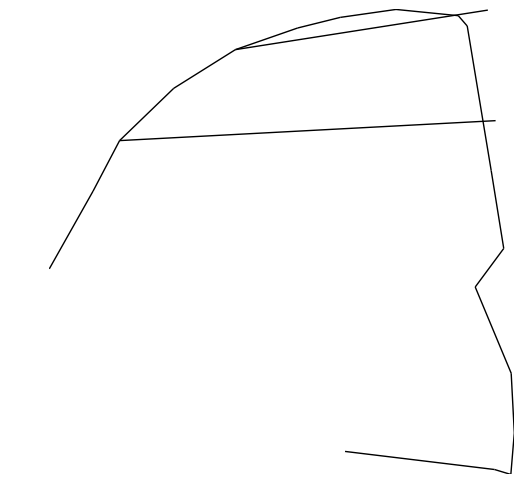

    After 20 iterations
        Discriminator Loss                         = -1.04235827923

    Generator_Loss: -8.79105186462
301
    After 20 iterations
        Discriminator Loss                         = -1.39576900005

    Generator_Loss: -8.4303483963
302
    After 20 iterations
        Discriminator Loss                         = -0.988198339939

    Generator_Loss: -8.27749538422
303
    After 20 iterations
        Discriminator Loss                         = -1.35861754417

    Generator_Loss: -8.13377761841
304
    After 20 iterations
        Discriminator Loss                         = -1.2399225235

    Generator_Loss: -7.92103910446
305
    After 20 iterations
        Discriminator Loss                         = -1.29470777512

    Generator_Loss: -7.56141138077
306
    After 20 iterations
        Discriminator Loss                         = -1.39622783661

    Generator_Loss: -7.59126567841
307
    After 20 iterations
        Discriminator Loss                         = 

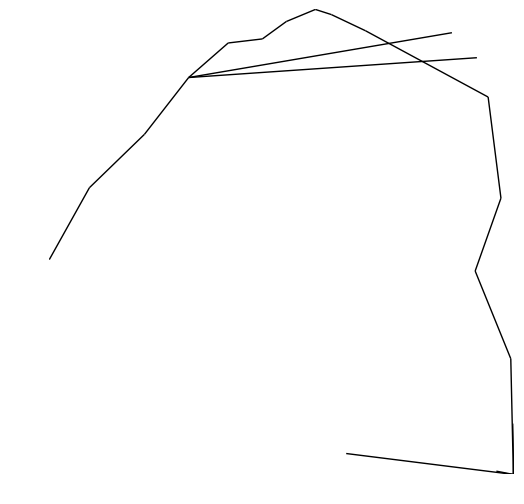

    After 20 iterations
        Discriminator Loss                         = -1.07407939434

    Generator_Loss: -6.79487419128
326
    After 20 iterations
        Discriminator Loss                         = -1.34646093845

    Generator_Loss: -6.7442522049
327
    After 20 iterations
        Discriminator Loss                         = -1.21919596195

    Generator_Loss: -6.82261037827
328
    After 20 iterations
        Discriminator Loss                         = -0.925427913666

    Generator_Loss: -7.1351108551
329
    After 20 iterations
        Discriminator Loss                         = -1.2032674551

    Generator_Loss: -7.21021938324
330
    After 20 iterations
        Discriminator Loss                         = -1.08816695213

    Generator_Loss: -7.43029928207
331
    After 20 iterations
        Discriminator Loss                         = -1.30170750618

    Generator_Loss: -7.73541402817
332
    After 20 iterations
        Discriminator Loss                         = -

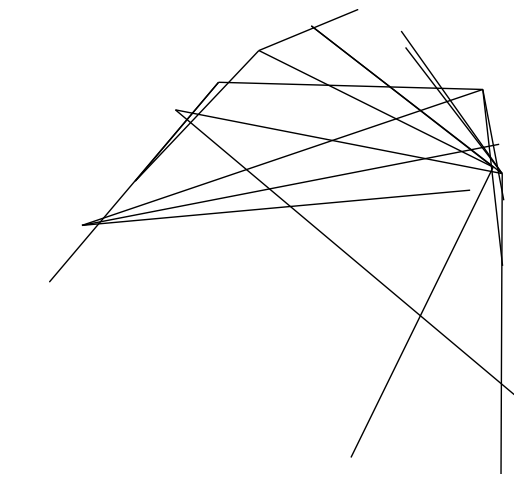

    After 20 iterations
        Discriminator Loss                         = -1.4456217289

    Generator_Loss: -7.55816936493
351
    After 20 iterations
        Discriminator Loss                         = -1.08668363094

    Generator_Loss: -7.49059963226
352
    After 20 iterations
        Discriminator Loss                         = -1.36553692818

    Generator_Loss: -7.36367321014
353
    After 20 iterations
        Discriminator Loss                         = -1.26043486595

    Generator_Loss: -7.0629901886
354
    After 20 iterations
        Discriminator Loss                         = -1.30354046822

    Generator_Loss: -6.95190191269
355
    After 20 iterations
        Discriminator Loss                         = -1.25595366955

    Generator_Loss: -6.80621433258
356
    After 20 iterations
        Discriminator Loss                         = -1.49731004238

    Generator_Loss: -6.69778633118
357
    After 20 iterations
        Discriminator Loss                         = -

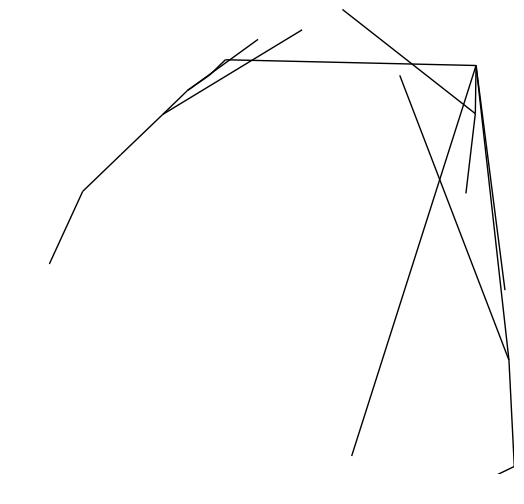

    After 20 iterations
        Discriminator Loss                         = -1.62087917328

    Generator_Loss: -9.05978488922
376
    After 20 iterations
        Discriminator Loss                         = -1.31872260571

    Generator_Loss: -9.2734670639
377
    After 20 iterations
        Discriminator Loss                         = -1.61304938793

    Generator_Loss: -9.35672950745
378
    After 20 iterations
        Discriminator Loss                         = -1.62035214901

    Generator_Loss: -9.64301300049
379
    After 20 iterations
        Discriminator Loss                         = -1.24840199947

    Generator_Loss: -9.69208717346
380
    After 20 iterations
        Discriminator Loss                         = -1.20144438744

    Generator_Loss: -9.92639446259
381
    After 20 iterations
        Discriminator Loss                         = -0.891269445419

    Generator_Loss: -10.5602664948
382
    After 20 iterations
        Discriminator Loss                         =

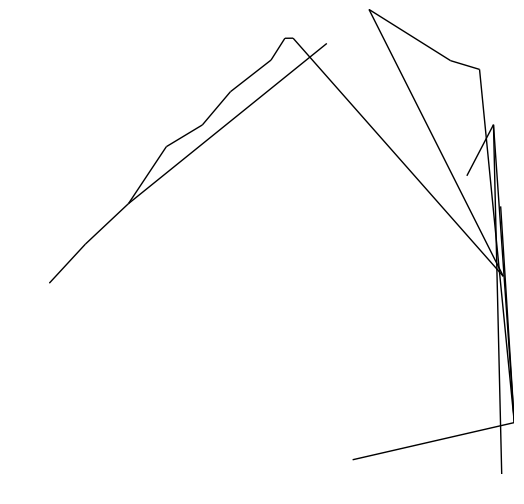

    After 20 iterations
        Discriminator Loss                         = -1.64982759953

    Generator_Loss: -8.01736354828
401
    After 20 iterations
        Discriminator Loss                         = -1.2436170578

    Generator_Loss: -8.16585445404
402
    After 20 iterations
        Discriminator Loss                         = -1.54075336456

    Generator_Loss: -8.10259056091
403
    After 20 iterations
        Discriminator Loss                         = -1.07836043835

    Generator_Loss: -8.40643024445
404
    After 20 iterations
        Discriminator Loss                         = -0.7426648736

    Generator_Loss: -8.57361125946
405
    After 20 iterations
        Discriminator Loss                         = -1.06979608536

    Generator_Loss: -8.3373041153
406
    After 20 iterations
        Discriminator Loss                         = -1.06762957573

    Generator_Loss: -8.07071399689
407
    After 20 iterations
        Discriminator Loss                         = -1

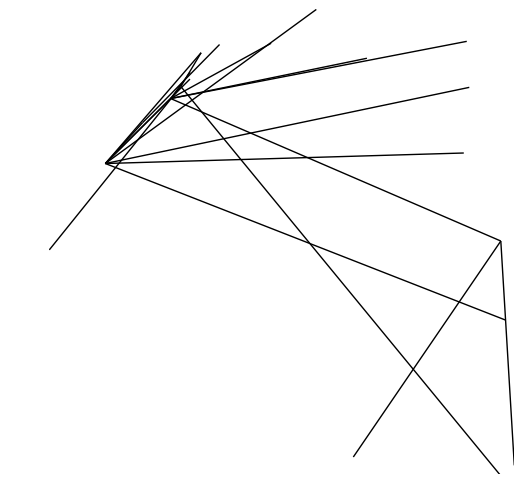

    After 20 iterations
        Discriminator Loss                         = -1.61714828014

    Generator_Loss: -7.75549602509
426
    After 20 iterations
        Discriminator Loss                         = -1.34334349632

    Generator_Loss: -7.95881175995
427
    After 20 iterations
        Discriminator Loss                         = -0.977068722248

    Generator_Loss: -8.31508255005
428
    After 20 iterations
        Discriminator Loss                         = -1.11942493916

    Generator_Loss: -8.5557050705
429
    After 20 iterations
        Discriminator Loss                         = -1.43744087219

    Generator_Loss: -8.74717140198
430
    After 20 iterations
        Discriminator Loss                         = -1.14233100414

    Generator_Loss: -8.96439552307
431
    After 20 iterations
        Discriminator Loss                         = -1.45942378044

    Generator_Loss: -9.12484169006
432
    After 20 iterations
        Discriminator Loss                         =

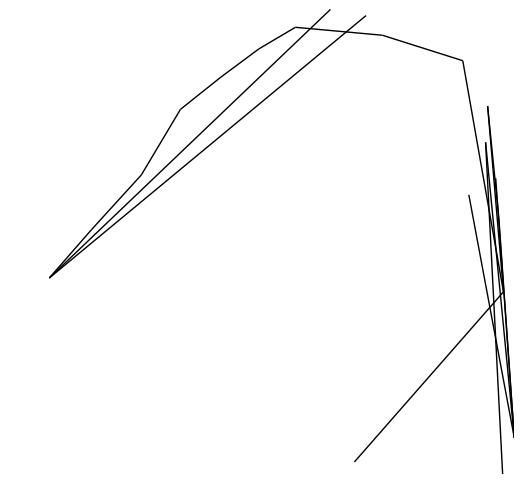

    After 20 iterations
        Discriminator Loss                         = -1.0632404089

    Generator_Loss: -7.15301990509
451
    After 20 iterations
        Discriminator Loss                         = -1.04097259045

    Generator_Loss: -7.14916229248
452
    After 20 iterations
        Discriminator Loss                         = -0.824153602123

    Generator_Loss: -7.28049850464
453
    After 20 iterations
        Discriminator Loss                         = -0.838101625443

    Generator_Loss: -7.4793639183
454
    After 20 iterations
        Discriminator Loss                         = -0.96245855093

    Generator_Loss: -7.7263469696
455
    After 20 iterations
        Discriminator Loss                         = -0.98503267765

    Generator_Loss: -7.87098884583
456
    After 20 iterations
        Discriminator Loss                         = -1.10768473148

    Generator_Loss: -8.20059776306
457
    After 20 iterations
        Discriminator Loss                         = 

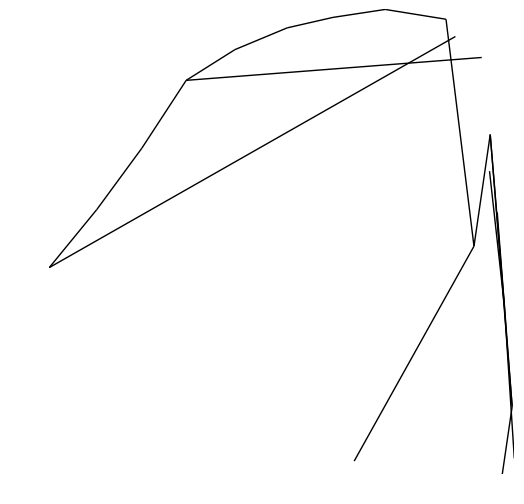

    After 20 iterations
        Discriminator Loss                         = -1.20983171463

    Generator_Loss: -6.41777324677
476
    After 20 iterations
        Discriminator Loss                         = -1.22986292839

    Generator_Loss: -6.04442358017
477
    After 20 iterations
        Discriminator Loss                         = -1.31675410271

    Generator_Loss: -5.80717658997
478
    After 20 iterations
        Discriminator Loss                         = -1.08685481548

    Generator_Loss: -5.72787094116
479
    After 20 iterations
        Discriminator Loss                         = -0.90263324976

    Generator_Loss: -5.81313323975
480
    After 20 iterations
        Discriminator Loss                         = -1.48928177357

    Generator_Loss: -5.64046621323
481
    After 20 iterations
        Discriminator Loss                         = -1.10025238991

    Generator_Loss: -5.41356754303
482
    After 20 iterations
        Discriminator Loss                         =

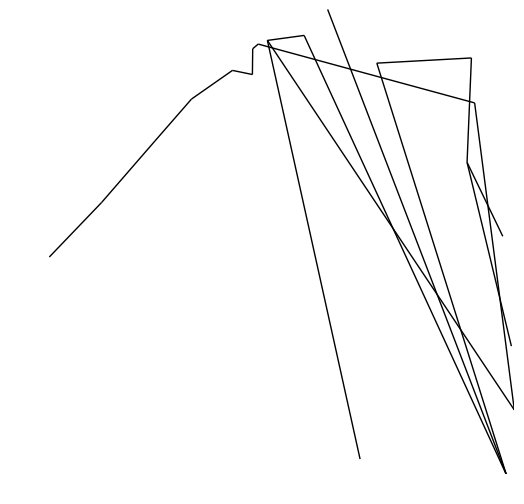

    After 20 iterations
        Discriminator Loss                         = -1.14410066605

    Generator_Loss: -8.91851520538
501
    After 20 iterations
        Discriminator Loss                         = -1.40766990185

    Generator_Loss: -8.94106292725
502
    After 20 iterations
        Discriminator Loss                         = -1.42193579674

    Generator_Loss: -8.98115253448
503
    After 20 iterations
        Discriminator Loss                         = -1.24236059189

    Generator_Loss: -9.05250930786
504
    After 20 iterations
        Discriminator Loss                         = -1.35027658939

    Generator_Loss: -9.14141178131
505
    After 20 iterations
        Discriminator Loss                         = -0.999157905579

    Generator_Loss: -9.39305782318
506
    After 20 iterations
        Discriminator Loss                         = -0.577188909054

    Generator_Loss: -9.25216388702
507
    After 20 iterations
        Discriminator Loss                        

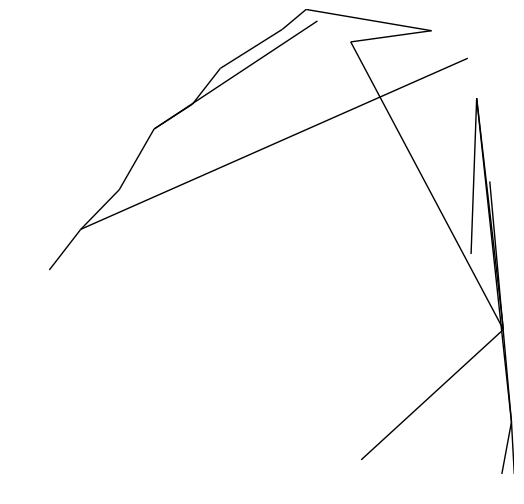

    After 20 iterations
        Discriminator Loss                         = -0.978996157646

    Generator_Loss: -6.10749101639
526
    After 20 iterations
        Discriminator Loss                         = -1.20760655403

    Generator_Loss: -6.33533477783
527
    After 20 iterations
        Discriminator Loss                         = -0.93587577343

    Generator_Loss: -6.49667072296
528
    After 20 iterations
        Discriminator Loss                         = -1.35734629631

    Generator_Loss: -6.69716310501
529
    After 20 iterations
        Discriminator Loss                         = -0.976912915707

    Generator_Loss: -6.87595796585
530
    After 20 iterations
        Discriminator Loss                         = -0.7640619874

    Generator_Loss: -7.18374061584
531
    After 20 iterations
        Discriminator Loss                         = -1.12636816502

    Generator_Loss: -7.31310224533
532
    After 20 iterations
        Discriminator Loss                         

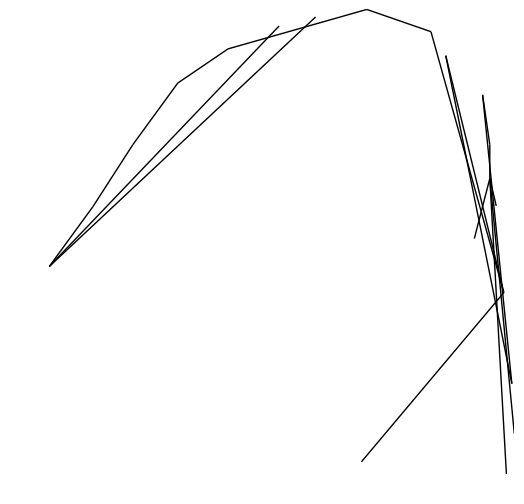

    After 20 iterations
        Discriminator Loss                         = -1.00368475914

    Generator_Loss: -6.22122144699
551
    After 20 iterations
        Discriminator Loss                         = -0.878405511379

    Generator_Loss: -5.974360466
552
    After 20 iterations
        Discriminator Loss                         = -0.829662680626

    Generator_Loss: -5.61361455917
553
    After 20 iterations
        Discriminator Loss                         = -1.13448739052

    Generator_Loss: -5.41531991959
554
    After 20 iterations
        Discriminator Loss                         = -1.02220523357

    Generator_Loss: -5.16677618027
555
    After 20 iterations
        Discriminator Loss                         = -1.20249319077

    Generator_Loss: -5.27902507782
556
    After 20 iterations
        Discriminator Loss                         = -0.997250914574

    Generator_Loss: -5.23964548111
557
    After 20 iterations
        Discriminator Loss                         

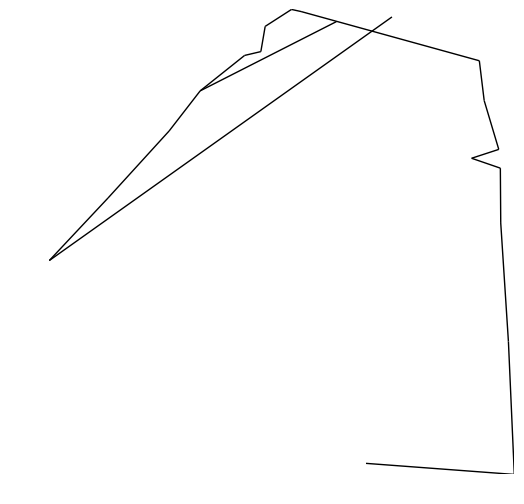

    After 20 iterations
        Discriminator Loss                         = -1.04027593136

    Generator_Loss: -6.15265130997
576
    After 20 iterations
        Discriminator Loss                         = -1.4398881197

    Generator_Loss: -5.93922710419
577
    After 20 iterations
        Discriminator Loss                         = -1.26635396481

    Generator_Loss: -5.83942222595
578
    After 20 iterations
        Discriminator Loss                         = -0.95805221796

    Generator_Loss: -5.89124965668
579
    After 20 iterations
        Discriminator Loss                         = -1.28724682331

    Generator_Loss: -5.89159631729
580
    After 20 iterations
        Discriminator Loss                         = -0.849474549294

    Generator_Loss: -6.08406448364
581
    After 20 iterations
        Discriminator Loss                         = -1.28498375416

    Generator_Loss: -6.19871044159
582
    After 20 iterations
        Discriminator Loss                         =

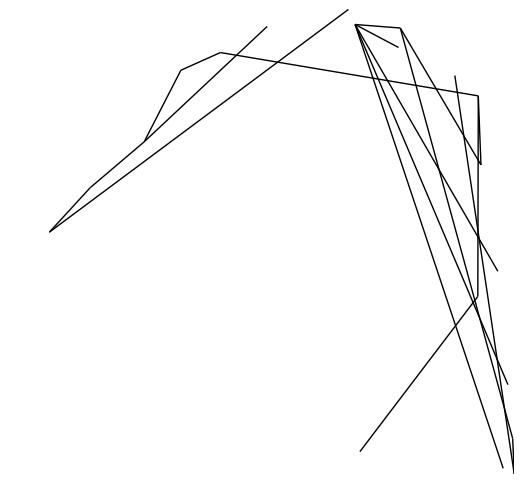

    After 20 iterations
        Discriminator Loss                         = -1.16674804688

    Generator_Loss: -6.69984722137
601
    After 20 iterations
        Discriminator Loss                         = -1.060359478

    Generator_Loss: -6.53196668625
602
    After 20 iterations
        Discriminator Loss                         = -1.27625381947

    Generator_Loss: -6.45020914078
603
    After 20 iterations
        Discriminator Loss                         = -1.18971073627

    Generator_Loss: -6.24626207352
604
    After 20 iterations
        Discriminator Loss                         = -1.20867609978

    Generator_Loss: -6.0871257782
605
    After 20 iterations
        Discriminator Loss                         = -1.23233294487

    Generator_Loss: -5.88499450684
606
    After 20 iterations
        Discriminator Loss                         = -1.28381955624

    Generator_Loss: -5.6067700386
607
    After 20 iterations
        Discriminator Loss                         = -1.

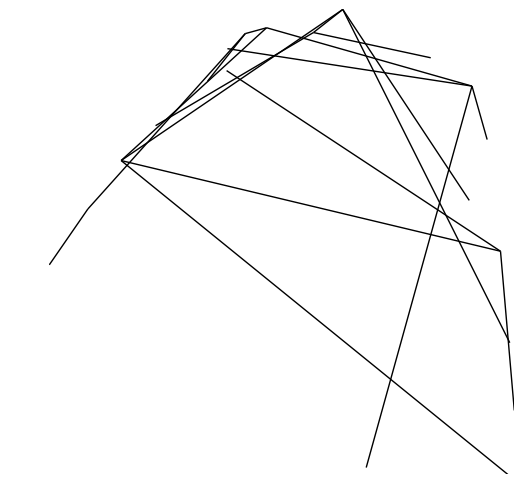

    After 20 iterations
        Discriminator Loss                         = -1.10968220234

    Generator_Loss: -7.46699810028
626
    After 20 iterations
        Discriminator Loss                         = -1.23032927513

    Generator_Loss: -7.56340360641
627
    After 20 iterations
        Discriminator Loss                         = -1.02164578438

    Generator_Loss: -7.83887434006
628
    After 20 iterations
        Discriminator Loss                         = -1.2323513031

    Generator_Loss: -8.08873558044
629
    After 20 iterations
        Discriminator Loss                         = -0.848765909672

    Generator_Loss: -8.13805294037
630
    After 20 iterations
        Discriminator Loss                         = -1.50053787231

    Generator_Loss: -8.33079242706
631
    After 20 iterations
        Discriminator Loss                         = -1.08965098858

    Generator_Loss: -8.28525924683
632
    After 20 iterations
        Discriminator Loss                         =

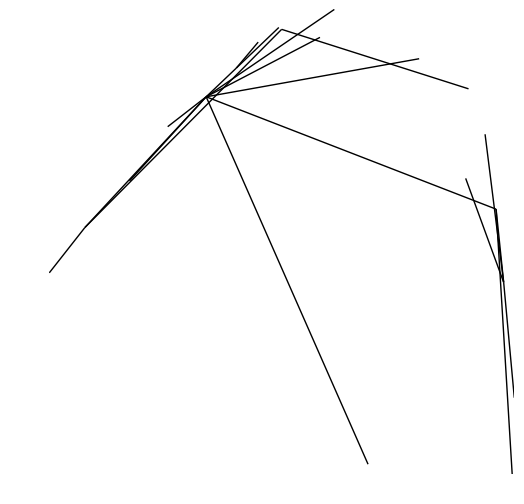

    After 20 iterations
        Discriminator Loss                         = -0.812645256519

    Generator_Loss: -9.03456687927
651
    After 20 iterations
        Discriminator Loss                         = -1.03827238083

    Generator_Loss: -9.03224754333
652
    After 20 iterations
        Discriminator Loss                         = -1.48327612877

    Generator_Loss: -8.89684677124
653
    After 20 iterations
        Discriminator Loss                         = -0.829363882542

    Generator_Loss: -9.01222610474
654
    After 20 iterations
        Discriminator Loss                         = -1.43835234642

    Generator_Loss: -8.77805233002
655
    After 20 iterations
        Discriminator Loss                         = -0.727056086063

    Generator_Loss: -8.90243911743
656
    After 20 iterations
        Discriminator Loss                         = -0.9587007761

    Generator_Loss: -8.893907547
657
    After 20 iterations
        Discriminator Loss                         =

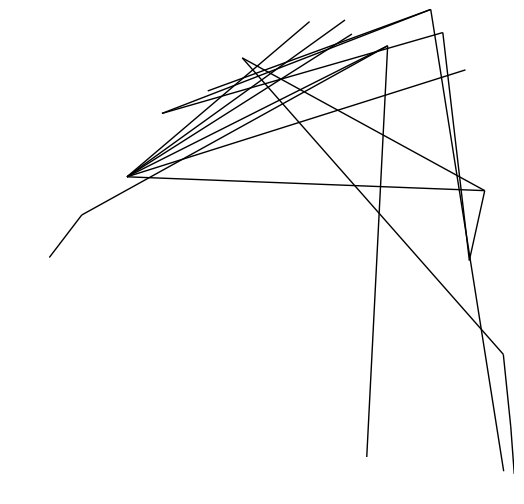

    After 20 iterations
        Discriminator Loss                         = -1.45044231415

    Generator_Loss: -6.28719425201
676
    After 20 iterations
        Discriminator Loss                         = -1.13307654858

    Generator_Loss: -6.10212802887
677
    After 20 iterations
        Discriminator Loss                         = -0.934830963612

    Generator_Loss: -5.92353391647
678
    After 20 iterations
        Discriminator Loss                         = -1.05233693123

    Generator_Loss: -5.66010189056
679
    After 20 iterations
        Discriminator Loss                         = -0.9606513381

    Generator_Loss: -5.62481641769
680
    After 20 iterations
        Discriminator Loss                         = -1.25551605225

    Generator_Loss: -5.6732378006
681
    After 20 iterations
        Discriminator Loss                         = -1.25564789772

    Generator_Loss: -5.59832859039
682
    After 20 iterations
        Discriminator Loss                         = 

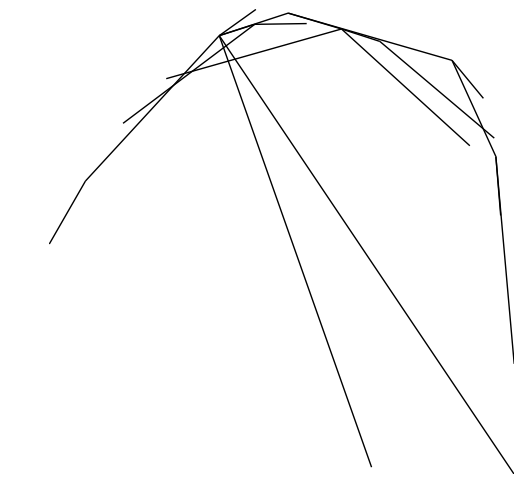

    After 20 iterations
        Discriminator Loss                         = -0.752051830292

    Generator_Loss: -5.98894882202
701
    After 20 iterations
        Discriminator Loss                         = -1.0759345293

    Generator_Loss: -5.95663356781
702
    After 20 iterations
        Discriminator Loss                         = -1.06059801579

    Generator_Loss: -5.94772148132
703
    After 20 iterations
        Discriminator Loss                         = -0.977975785732

    Generator_Loss: -6.0322842598
704
    After 20 iterations
        Discriminator Loss                         = -1.12020742893

    Generator_Loss: -5.97847700119
705
    After 20 iterations
        Discriminator Loss                         = -1.08850669861

    Generator_Loss: -5.99468326569
706
    After 20 iterations
        Discriminator Loss                         = -1.12151348591

    Generator_Loss: -6.17201042175
707
    After 20 iterations
        Discriminator Loss                         =

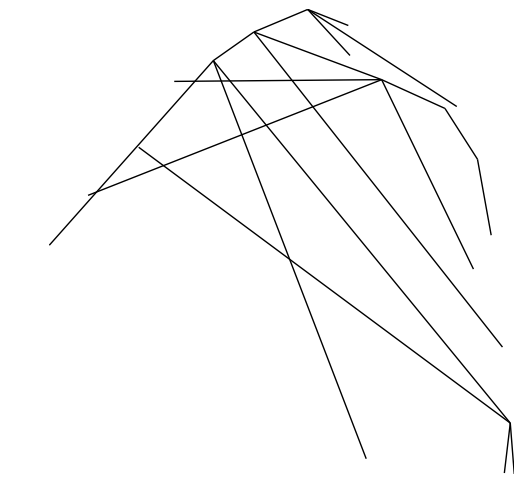

    After 20 iterations
        Discriminator Loss                         = -0.948455870152

    Generator_Loss: -5.94381999969
726
    After 20 iterations
        Discriminator Loss                         = -0.980903148651

    Generator_Loss: -5.90907669067
727
    After 20 iterations
        Discriminator Loss                         = -0.794527590275

    Generator_Loss: -5.84872722626
728
    After 20 iterations
        Discriminator Loss                         = -1.09789025784

    Generator_Loss: -5.81865215302
729
    After 20 iterations
        Discriminator Loss                         = -0.918308615685

    Generator_Loss: -5.7306137085
730
    After 20 iterations
        Discriminator Loss                         = -1.13785088062

    Generator_Loss: -5.70741081238
731
    After 20 iterations
        Discriminator Loss                         = -1.05351555347

    Generator_Loss: -5.67899370193
732
    After 20 iterations
        Discriminator Loss                       

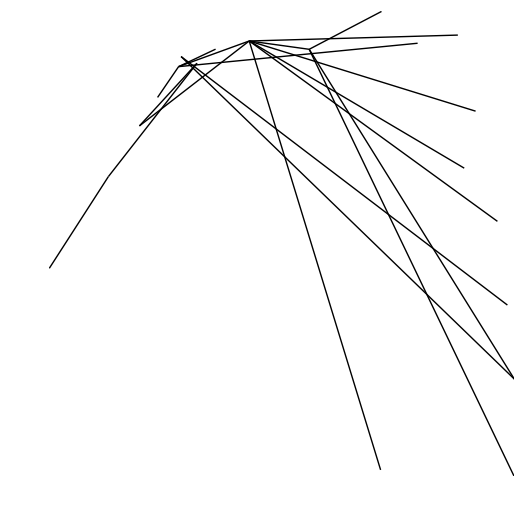

    After 20 iterations
        Discriminator Loss                         = -0.64518982172

    Generator_Loss: -6.97373867035
751
    After 20 iterations
        Discriminator Loss                         = -0.766630411148

    Generator_Loss: -7.03548765182
752
    After 20 iterations
        Discriminator Loss                         = -0.982358813286

    Generator_Loss: -7.15593528748
753
    After 20 iterations
        Discriminator Loss                         = -0.987958431244

    Generator_Loss: -7.40009784698
754
    After 20 iterations
        Discriminator Loss                         = -0.755778431892

    Generator_Loss: -7.54110050201
755
    After 20 iterations
        Discriminator Loss                         = -0.97084748745

    Generator_Loss: -7.72683906555
756
    After 20 iterations
        Discriminator Loss                         = -1.10033619404

    Generator_Loss: -7.86928272247
757
    After 20 iterations
        Discriminator Loss                      

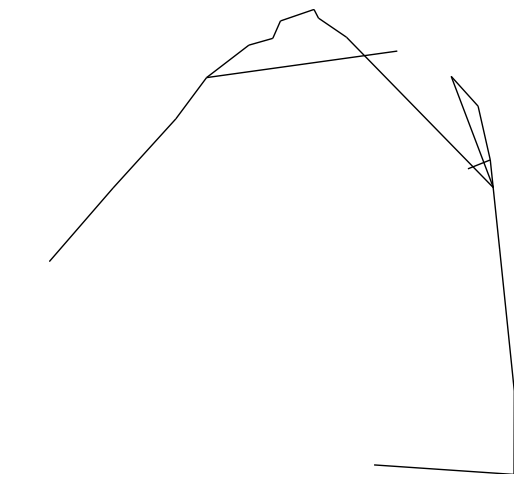

    After 20 iterations
        Discriminator Loss                         = -0.98862695694

    Generator_Loss: -5.75488758087
776
    After 20 iterations
        Discriminator Loss                         = -0.942174255848

    Generator_Loss: -5.6996717453
777
    After 20 iterations
        Discriminator Loss                         = -0.730175614357

    Generator_Loss: -5.69737768173
778
    After 20 iterations
        Discriminator Loss                         = -0.484143763781

    Generator_Loss: -5.89078187943
779
    After 20 iterations
        Discriminator Loss                         = -0.746304452419

    Generator_Loss: -5.91568660736
780
    After 20 iterations
        Discriminator Loss                         = -0.853303551674

    Generator_Loss: -5.97055625916
781

    Epoch #2

    After 20 iterations
        Discriminator Loss                         = -0.944110929966

    Generator_Loss: -5.74459314346
2
    After 20 iterations
        Discriminator Loss        

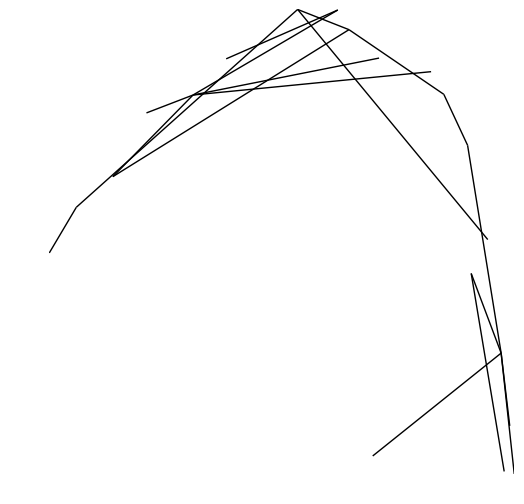

    After 20 iterations
        Discriminator Loss                         = -1.14122545719

    Generator_Loss: -3.2907948494
26
    After 20 iterations
        Discriminator Loss                         = -0.916924774647

    Generator_Loss: -3.39917612076
27
    After 20 iterations
        Discriminator Loss                         = -0.922398805618

    Generator_Loss: -3.3527700901
28
    After 20 iterations
        Discriminator Loss                         = -1.09919381142

    Generator_Loss: -3.28149676323
29
    After 20 iterations
        Discriminator Loss                         = -1.07501327991

    Generator_Loss: -3.20486068726
30
    After 20 iterations
        Discriminator Loss                         = -0.772439718246

    Generator_Loss: -3.14585804939
31
    After 20 iterations
        Discriminator Loss                         = -1.22916388512

    Generator_Loss: -3.20859098434
32
    After 20 iterations
        Discriminator Loss                         = -1.14

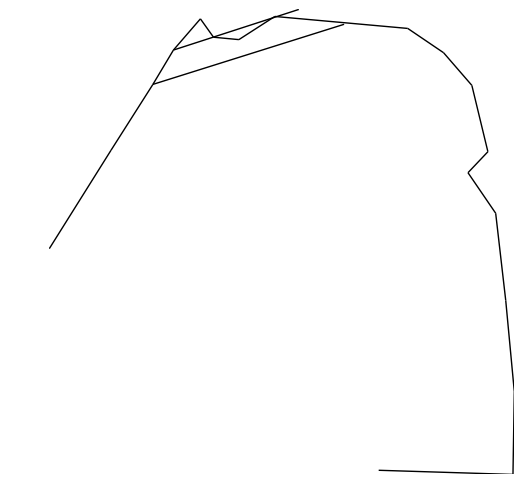

    After 20 iterations
        Discriminator Loss                         = -0.745254576206

    Generator_Loss: -5.97111940384
51
    After 20 iterations
        Discriminator Loss                         = -0.808049142361

    Generator_Loss: -5.99607753754
52
    After 20 iterations
        Discriminator Loss                         = -0.89344149828

    Generator_Loss: -5.73196125031
53
    After 20 iterations
        Discriminator Loss                         = -0.70035135746

    Generator_Loss: -5.72616481781
54
    After 20 iterations
        Discriminator Loss                         = -0.931199252605

    Generator_Loss: -5.72573566437
55
    After 20 iterations
        Discriminator Loss                         = -0.786858260632

    Generator_Loss: -5.69823455811
56
    After 20 iterations
        Discriminator Loss                         = -0.873904049397

    Generator_Loss: -5.80356264114
57
    After 20 iterations
        Discriminator Loss                         = -

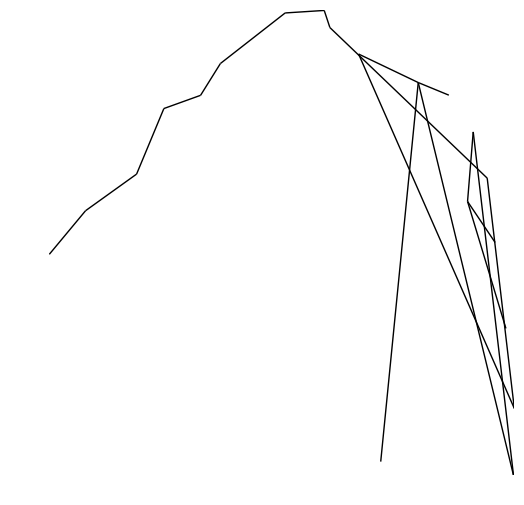

    After 20 iterations
        Discriminator Loss                         = -0.690783917904

    Generator_Loss: -4.99485445023
76
    After 20 iterations
        Discriminator Loss                         = -1.05713939667

    Generator_Loss: -5.07518482208
77
    After 20 iterations
        Discriminator Loss                         = -1.15616595745

    Generator_Loss: -5.02851915359
78
    After 20 iterations
        Discriminator Loss                         = -1.05141794682

    Generator_Loss: -4.9464263916
79
    After 20 iterations
        Discriminator Loss                         = -1.11359632015

    Generator_Loss: -4.79396009445
80
    After 20 iterations
        Discriminator Loss                         = -0.951431810856

    Generator_Loss: -4.88352680206
81
    After 20 iterations
        Discriminator Loss                         = -0.767401754856

    Generator_Loss: -4.96534156799
82
    After 20 iterations
        Discriminator Loss                         = -0.5

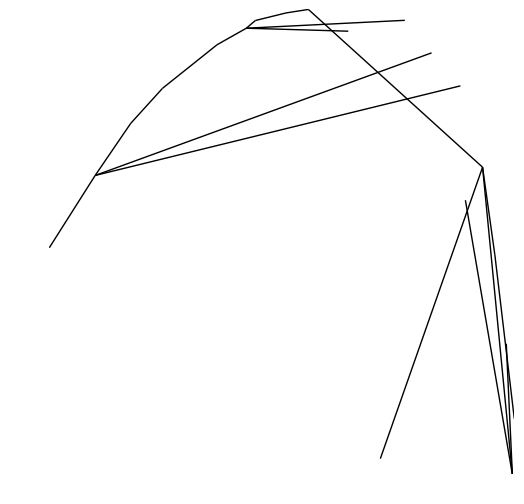

    After 20 iterations
        Discriminator Loss                         = -0.995319485664

    Generator_Loss: -4.8387389183
101
    After 20 iterations
        Discriminator Loss                         = -1.03253412247

    Generator_Loss: -4.54871225357
102
    After 20 iterations
        Discriminator Loss                         = -0.749739646912

    Generator_Loss: -4.65833425522
103
    After 20 iterations
        Discriminator Loss                         = -0.841528356075

    Generator_Loss: -4.72680473328
104
    After 20 iterations
        Discriminator Loss                         = -0.937773704529

    Generator_Loss: -4.82497358322
105
    After 20 iterations
        Discriminator Loss                         = -0.868175506592

    Generator_Loss: -4.77303886414
106
    After 20 iterations
        Discriminator Loss                         = -0.857870221138

    Generator_Loss: -4.59680318832
107
    After 20 iterations
        Discriminator Loss                     

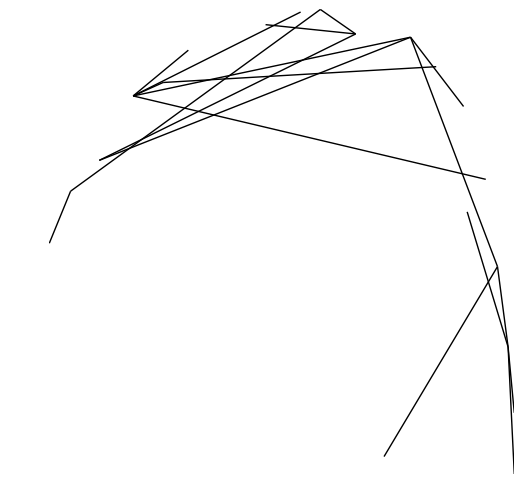

    After 20 iterations
        Discriminator Loss                         = -1.05121874809

    Generator_Loss: -3.73699402809
126
    After 20 iterations
        Discriminator Loss                         = -0.601421296597

    Generator_Loss: -3.72707152367
127
    After 20 iterations
        Discriminator Loss                         = -0.856259703636

    Generator_Loss: -3.83896493912
128
    After 20 iterations
        Discriminator Loss                         = -0.968640804291

    Generator_Loss: -3.79999661446
129
    After 20 iterations
        Discriminator Loss                         = -0.680219590664

    Generator_Loss: -3.87533855438
130
    After 20 iterations
        Discriminator Loss                         = -0.799907922745

    Generator_Loss: -4.04712200165
131
    After 20 iterations
        Discriminator Loss                         = -0.722169756889

    Generator_Loss: -4.12352609634
132
    After 20 iterations
        Discriminator Loss                    

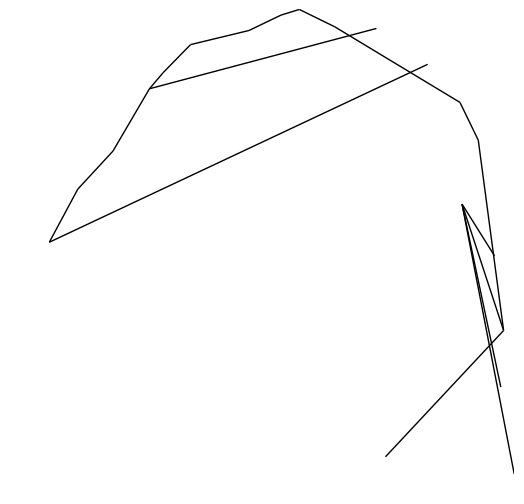

    After 20 iterations
        Discriminator Loss                         = -1.05704569817

    Generator_Loss: -4.86901807785
151
    After 20 iterations
        Discriminator Loss                         = -0.7310552001

    Generator_Loss: -4.92155504227
152
    After 20 iterations
        Discriminator Loss                         = -0.914894580841

    Generator_Loss: -5.03176450729
153
    After 20 iterations
        Discriminator Loss                         = -0.839134037495

    Generator_Loss: -5.11858129501
154
    After 20 iterations
        Discriminator Loss                         = -0.909660518169

    Generator_Loss: -5.06062412262
155
    After 20 iterations
        Discriminator Loss                         = -1.0279943943

    Generator_Loss: -5.01319551468
156
    After 20 iterations
        Discriminator Loss                         = -0.718352198601

    Generator_Loss: -5.10358047485
157
    After 20 iterations
        Discriminator Loss                        

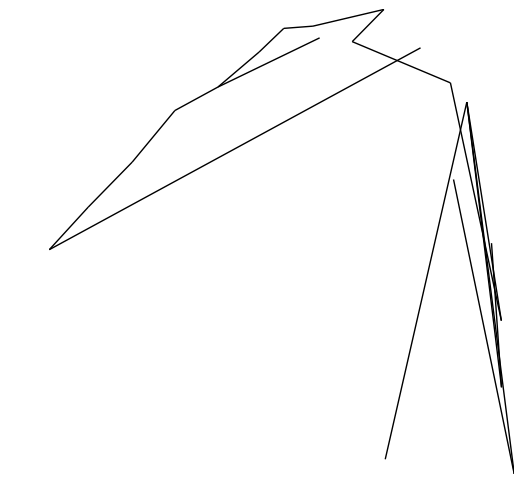

    After 20 iterations
        Discriminator Loss                         = -1.0664999485

    Generator_Loss: -4.84487581253
176
    After 20 iterations
        Discriminator Loss                         = -0.722460508347

    Generator_Loss: -4.80725240707
177
    After 20 iterations
        Discriminator Loss                         = -0.599932849407

    Generator_Loss: -4.70978498459
178
    After 20 iterations
        Discriminator Loss                         = -0.847614228725

    Generator_Loss: -4.65607833862
179
    After 20 iterations
        Discriminator Loss                         = -0.70180785656

    Generator_Loss: -4.75185537338
180
    After 20 iterations
        Discriminator Loss                         = -0.661035716534

    Generator_Loss: -4.72628498077
181
    After 20 iterations
        Discriminator Loss                         = -0.882956326008

    Generator_Loss: -4.69168281555
182
    After 20 iterations
        Discriminator Loss                      

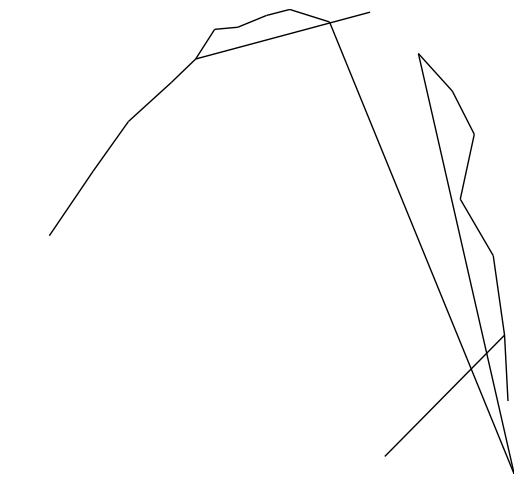

    After 20 iterations
        Discriminator Loss                         = -0.786194682121

    Generator_Loss: -4.16832399368
201
    After 20 iterations
        Discriminator Loss                         = -0.352752447128

    Generator_Loss: -4.32338762283
202
    After 20 iterations
        Discriminator Loss                         = -0.844620764256

    Generator_Loss: -4.24646043777
203
    After 20 iterations
        Discriminator Loss                         = -0.597531020641

    Generator_Loss: -4.38618373871
204
    After 20 iterations
        Discriminator Loss                         = -0.623248577118

    Generator_Loss: -4.50938558578
205
    After 20 iterations
        Discriminator Loss                         = -0.95168608427

    Generator_Loss: -4.57373809814
206
    After 20 iterations
        Discriminator Loss                         = -0.842975914478

    Generator_Loss: -4.53973197937
207
    After 20 iterations
        Discriminator Loss                    

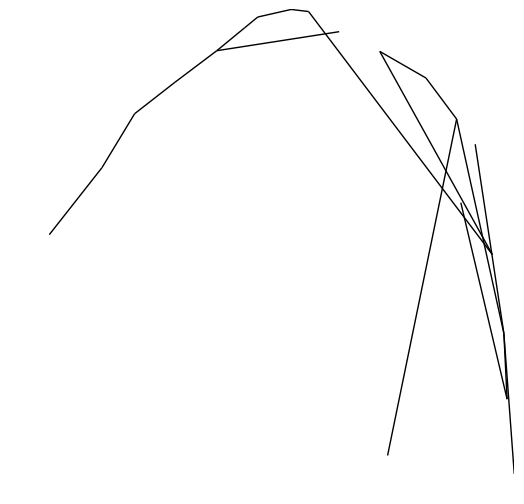

    After 20 iterations
        Discriminator Loss                         = -0.409363865852

    Generator_Loss: -5.21219062805
226
    After 20 iterations
        Discriminator Loss                         = -0.67917907238

    Generator_Loss: -5.18686437607
227
    After 20 iterations
        Discriminator Loss                         = -0.645201921463

    Generator_Loss: -5.20756006241
228
    After 20 iterations
        Discriminator Loss                         = -0.784385859966

    Generator_Loss: -5.26135969162
229
    After 20 iterations
        Discriminator Loss                         = -0.543718636036

    Generator_Loss: -5.23539829254
230
    After 20 iterations
        Discriminator Loss                         = -0.670642793179

    Generator_Loss: -5.14450836182
231
    After 20 iterations
        Discriminator Loss                         = -0.711665987968

    Generator_Loss: -5.22393941879
232
    After 20 iterations
        Discriminator Loss                    

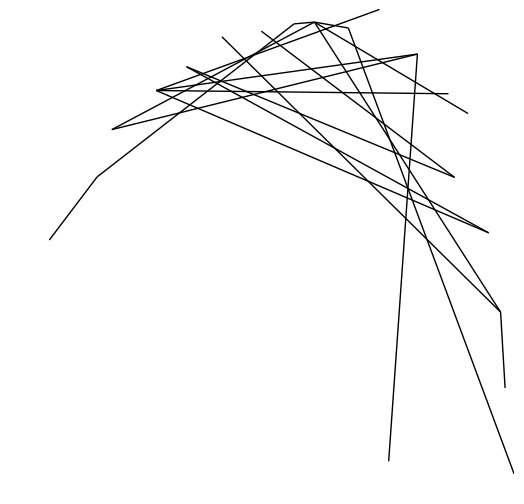

    After 20 iterations
        Discriminator Loss                         = -0.591541469097

    Generator_Loss: -4.64132881165
251
    After 20 iterations
        Discriminator Loss                         = -0.533855140209

    Generator_Loss: -4.59477901459
252
    After 20 iterations
        Discriminator Loss                         = -0.909405708313

    Generator_Loss: -4.36042690277
253
    After 20 iterations
        Discriminator Loss                         = -0.876304507256

    Generator_Loss: -4.29560804367
254
    After 20 iterations
        Discriminator Loss                         = -1.0422924757

    Generator_Loss: -4.27079772949
255
    After 20 iterations
        Discriminator Loss                         = -0.777037084103

    Generator_Loss: -4.18386888504
256
    After 20 iterations
        Discriminator Loss                         = -0.401670783758

    Generator_Loss: -4.30611944199
257
    After 20 iterations
        Discriminator Loss                     

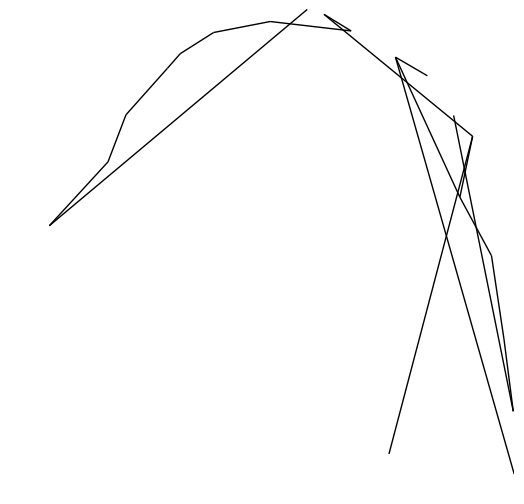

    After 20 iterations
        Discriminator Loss                         = -0.666527152061

    Generator_Loss: -4.51289129257
276
    After 20 iterations
        Discriminator Loss                         = -0.687695860863

    Generator_Loss: -4.4522819519
277
    After 20 iterations
        Discriminator Loss                         = -0.903097808361

    Generator_Loss: -4.43215560913
278
    After 20 iterations
        Discriminator Loss                         = -0.737321615219

    Generator_Loss: -4.4549498558
279
    After 20 iterations
        Discriminator Loss                         = -0.6066005826

    Generator_Loss: -4.53604078293
280
    After 20 iterations
        Discriminator Loss                         = -0.682835757732

    Generator_Loss: -4.62977075577
281
    After 20 iterations
        Discriminator Loss                         = -0.421204030514

    Generator_Loss: -4.50824737549
282
    After 20 iterations
        Discriminator Loss                       

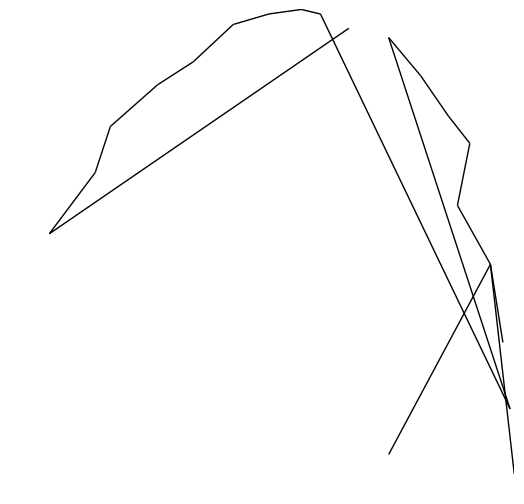

    After 20 iterations
        Discriminator Loss                         = -0.533590734005

    Generator_Loss: -4.20282125473
301
    After 20 iterations
        Discriminator Loss                         = -0.870593965054

    Generator_Loss: -4.11533021927
302
    After 20 iterations
        Discriminator Loss                         = -0.60468351841

    Generator_Loss: -4.15278530121
303
    After 20 iterations
        Discriminator Loss                         = -0.761572360992

    Generator_Loss: -4.20263910294
304
    After 20 iterations
        Discriminator Loss                         = -0.623318910599

    Generator_Loss: -4.17616081238
305
    After 20 iterations
        Discriminator Loss                         = -0.68316590786

    Generator_Loss: -4.02886199951
306
    After 20 iterations
        Discriminator Loss                         = -0.821084439754

    Generator_Loss: -4.18052196503
307
    After 20 iterations
        Discriminator Loss                     

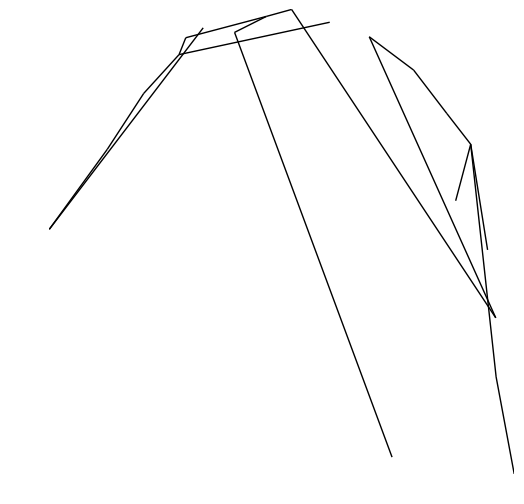

    After 20 iterations
        Discriminator Loss                         = -0.658219218254

    Generator_Loss: -3.38826799393
326
    After 20 iterations
        Discriminator Loss                         = -0.788074910641

    Generator_Loss: -3.32860422134
327
    After 20 iterations
        Discriminator Loss                         = -0.663108944893

    Generator_Loss: -3.3676264286
328
    After 20 iterations
        Discriminator Loss                         = -0.442331165075

    Generator_Loss: -3.54832077026
329
    After 20 iterations
        Discriminator Loss                         = -0.799337148666

    Generator_Loss: -3.50092029572
330
    After 20 iterations
        Discriminator Loss                         = -0.549913644791

    Generator_Loss: -3.57027101517
331
    After 20 iterations
        Discriminator Loss                         = -0.662368535995

    Generator_Loss: -3.66252970695
332
    After 20 iterations
        Discriminator Loss                    

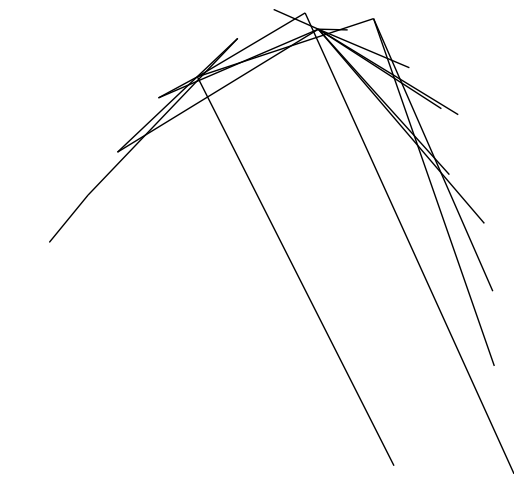

    After 20 iterations
        Discriminator Loss                         = -0.797465920448

    Generator_Loss: -4.2736582756
351
    After 20 iterations
        Discriminator Loss                         = -0.743389964104

    Generator_Loss: -4.28768062592
352
    After 20 iterations
        Discriminator Loss                         = -0.800228655338

    Generator_Loss: -4.18627262115
353
    After 20 iterations
        Discriminator Loss                         = -0.540063142776

    Generator_Loss: -3.97605967522
354
    After 20 iterations
        Discriminator Loss                         = -0.639592528343

    Generator_Loss: -3.90005326271
355
    After 20 iterations
        Discriminator Loss                         = -0.771162092686

    Generator_Loss: -3.78453063965
356
    After 20 iterations
        Discriminator Loss                         = -0.728007316589

    Generator_Loss: -3.73540735245
357
    After 20 iterations
        Discriminator Loss                    

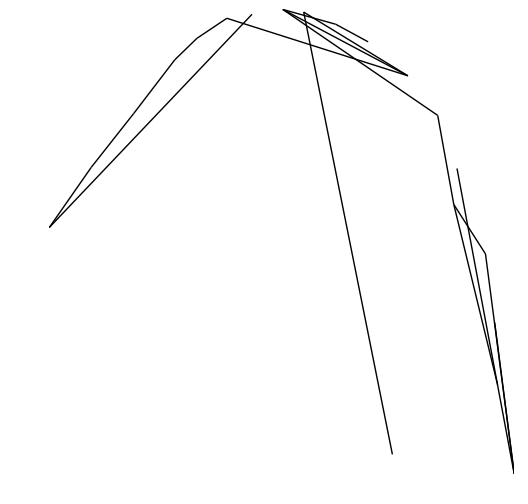

    After 20 iterations
        Discriminator Loss                         = -0.78124755621

    Generator_Loss: -3.84443855286
376
    After 20 iterations
        Discriminator Loss                         = -0.656456530094

    Generator_Loss: -3.79150986671
377
    After 20 iterations
        Discriminator Loss                         = -0.839269697666

    Generator_Loss: -3.69062709808
378
    After 20 iterations
        Discriminator Loss                         = -0.670200049877

    Generator_Loss: -3.7315299511
379
    After 20 iterations
        Discriminator Loss                         = -0.592208325863

    Generator_Loss: -3.64493131638
380
    After 20 iterations
        Discriminator Loss                         = -0.637547373772

    Generator_Loss: -3.61136651039
381
    After 20 iterations
        Discriminator Loss                         = -0.397973537445

    Generator_Loss: -3.70695543289
382
    After 20 iterations
        Discriminator Loss                     

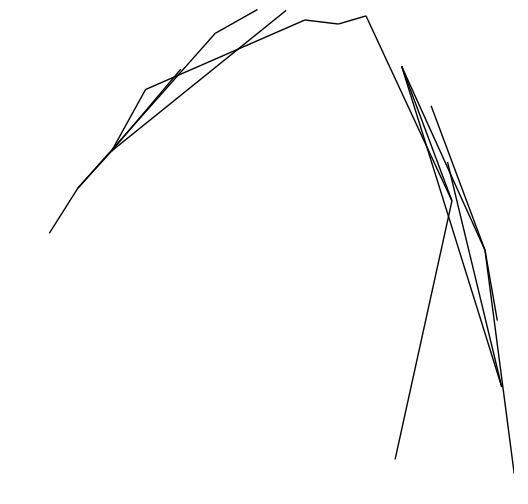

    After 20 iterations
        Discriminator Loss                         = -0.880224168301

    Generator_Loss: -3.85223507881
401
    After 20 iterations
        Discriminator Loss                         = -0.63369590044

    Generator_Loss: -3.91514444351
402
    After 20 iterations
        Discriminator Loss                         = -0.698152244091

    Generator_Loss: -3.78512573242
403
    After 20 iterations
        Discriminator Loss                         = -0.559258699417

    Generator_Loss: -3.8870549202
404
    After 20 iterations
        Discriminator Loss                         = -0.397326558828

    Generator_Loss: -3.91905975342
405
    After 20 iterations
        Discriminator Loss                         = -0.571310937405

    Generator_Loss: -3.87481117249
406
    After 20 iterations
        Discriminator Loss                         = -0.521381616592

    Generator_Loss: -3.90715456009
407
    After 20 iterations
        Discriminator Loss                     

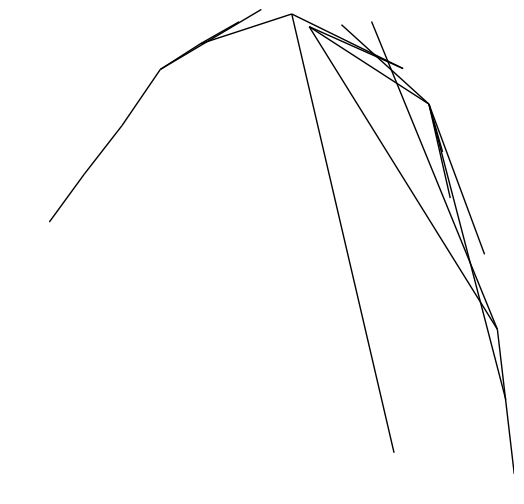

    After 20 iterations
        Discriminator Loss                         = -0.938768148422

    Generator_Loss: -3.56456613541
426
    After 20 iterations
        Discriminator Loss                         = -0.54923081398

    Generator_Loss: -3.51821708679
427
    After 20 iterations
        Discriminator Loss                         = -0.148886159062

    Generator_Loss: -3.65963339806
428
    After 20 iterations
        Discriminator Loss                         = -0.447193533182

    Generator_Loss: -3.68965959549
429
    After 20 iterations
        Discriminator Loss                         = -0.586429238319

    Generator_Loss: -3.74060726166
430
    After 20 iterations
        Discriminator Loss                         = -0.322380781174

    Generator_Loss: -3.7821199894
431
    After 20 iterations
        Discriminator Loss                         = -0.496122539043

    Generator_Loss: -3.8226044178
432
    After 20 iterations
        Discriminator Loss                      

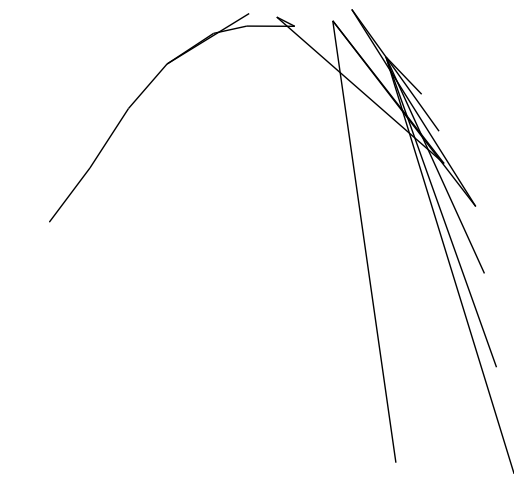

    After 20 iterations
        Discriminator Loss                         = -0.613846719265

    Generator_Loss: -4.48520517349
451
    After 20 iterations
        Discriminator Loss                         = -0.45696631074

    Generator_Loss: -4.47762680054
452
    After 20 iterations
        Discriminator Loss                         = -0.372256278992

    Generator_Loss: -4.54737949371
453
    After 20 iterations
        Discriminator Loss                         = -0.507342398167

    Generator_Loss: -4.61795091629
454
    After 20 iterations
        Discriminator Loss                         = -0.438559174538

    Generator_Loss: -4.67726993561
455
    After 20 iterations
        Discriminator Loss                         = -0.565097868443

    Generator_Loss: -4.70889997482
456
    After 20 iterations
        Discriminator Loss                         = -0.455827414989

    Generator_Loss: -4.87547492981
457
    After 20 iterations
        Discriminator Loss                    

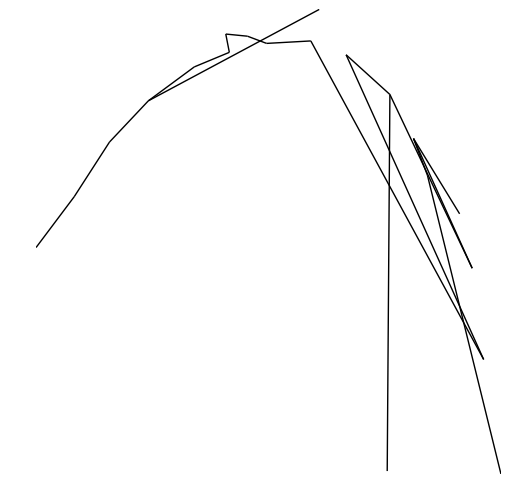

    After 20 iterations
        Discriminator Loss                         = -0.570885419846

    Generator_Loss: -5.56936597824
476
    After 20 iterations
        Discriminator Loss                         = -0.615387618542

    Generator_Loss: -5.46843290329
477
    After 20 iterations
        Discriminator Loss                         = -0.805275201797

    Generator_Loss: -5.43176746368
478
    After 20 iterations
        Discriminator Loss                         = -0.694223999977

    Generator_Loss: -5.50080537796
479
    After 20 iterations
        Discriminator Loss                         = -0.329866886139

    Generator_Loss: -5.61973905563
480
    After 20 iterations
        Discriminator Loss                         = -0.628643810749

    Generator_Loss: -5.60978126526
481
    After 20 iterations
        Discriminator Loss                         = -0.855077624321

    Generator_Loss: -5.54404497147
482
    After 20 iterations
        Discriminator Loss                   

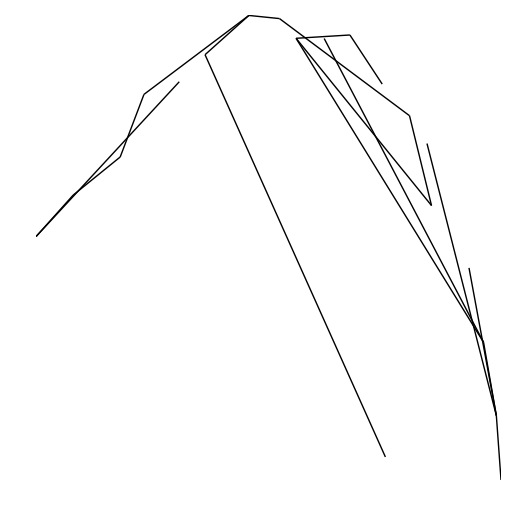

    After 20 iterations
        Discriminator Loss                         = -0.494115501642

    Generator_Loss: -4.97488451004
501
    After 20 iterations
        Discriminator Loss                         = -0.610609233379

    Generator_Loss: -4.87558460236
502
    After 20 iterations
        Discriminator Loss                         = -0.643730342388

    Generator_Loss: -4.8223285675
503
    After 20 iterations
        Discriminator Loss                         = -0.491570740938

    Generator_Loss: -4.7169547081
504
    After 20 iterations
        Discriminator Loss                         = -0.642960011959

    Generator_Loss: -4.59282016754
505
    After 20 iterations
        Discriminator Loss                         = -0.660874128342

    Generator_Loss: -4.52340507507
506
    After 20 iterations
        Discriminator Loss                         = -0.337320208549

    Generator_Loss: -4.53104114532
507
    After 20 iterations
        Discriminator Loss                     

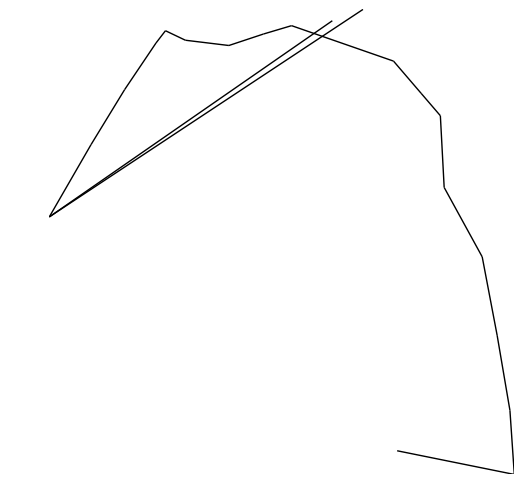

    After 20 iterations
        Discriminator Loss                         = -0.457432240248

    Generator_Loss: -5.14137935638
526
    After 20 iterations
        Discriminator Loss                         = -0.602020740509

    Generator_Loss: -5.25320672989
527
    After 20 iterations
        Discriminator Loss                         = -0.479708999395

    Generator_Loss: -5.30887508392
528
    After 20 iterations
        Discriminator Loss                         = -0.867438852787

    Generator_Loss: -5.33855342865
529
    After 20 iterations
        Discriminator Loss                         = -0.515548229218

    Generator_Loss: -5.24901676178
530
    After 20 iterations
        Discriminator Loss                         = -0.200710907578

    Generator_Loss: -5.38919878006
531
    After 20 iterations
        Discriminator Loss                         = -0.553023338318

    Generator_Loss: -5.44549417496
532
    After 20 iterations
        Discriminator Loss                   

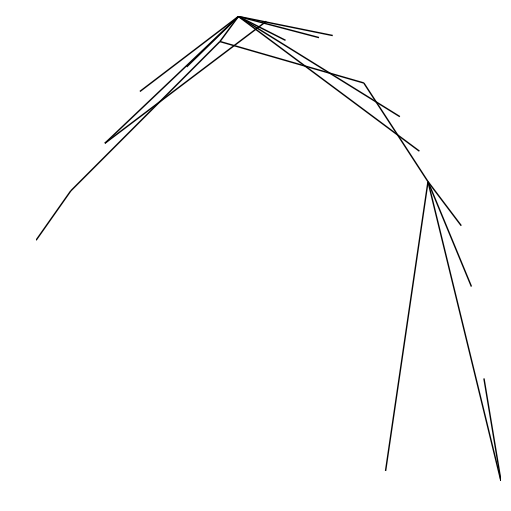

    After 20 iterations
        Discriminator Loss                         = -0.412516325712

    Generator_Loss: -6.5010638237
551
    After 20 iterations
        Discriminator Loss                         = -0.468400388956

    Generator_Loss: -6.37825345993
552
    After 20 iterations
        Discriminator Loss                         = -0.443139582872

    Generator_Loss: -6.16081190109
553
    After 20 iterations
        Discriminator Loss                         = -0.568265676498

    Generator_Loss: -6.07874679565
554
    After 20 iterations
        Discriminator Loss                         = -0.627874135971

    Generator_Loss: -5.95071268082
555
    After 20 iterations
        Discriminator Loss                         = -0.545445859432

    Generator_Loss: -6.06005764008
556
    After 20 iterations
        Discriminator Loss                         = -0.493045240641

    Generator_Loss: -6.01052236557
557
    After 20 iterations
        Discriminator Loss                    

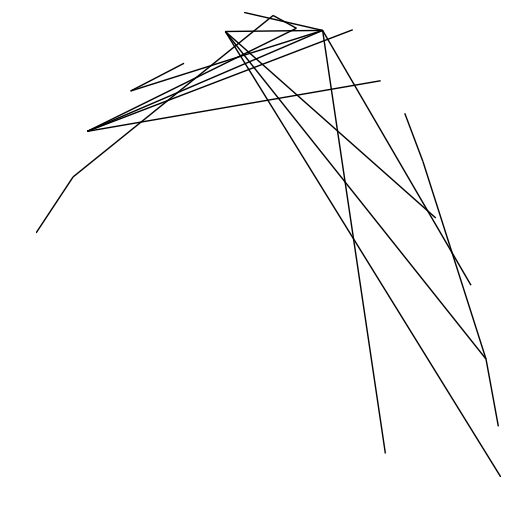

    After 20 iterations
        Discriminator Loss                         = -0.373311579227

    Generator_Loss: -5.17516374588
576
    After 20 iterations
        Discriminator Loss                         = -0.603041470051

    Generator_Loss: -4.96417617798
577
    After 20 iterations
        Discriminator Loss                         = -0.460012286901

    Generator_Loss: -4.85800695419
578
    After 20 iterations
        Discriminator Loss                         = -0.266979604959

    Generator_Loss: -4.76226091385
579
    After 20 iterations
        Discriminator Loss                         = -0.530807733536

    Generator_Loss: -4.66919565201
580
    After 20 iterations
        Discriminator Loss                         = -0.339171648026

    Generator_Loss: -4.59205055237
581
    After 20 iterations
        Discriminator Loss                         = -0.549993038177

    Generator_Loss: -4.45304489136
582
    After 20 iterations
        Discriminator Loss                   

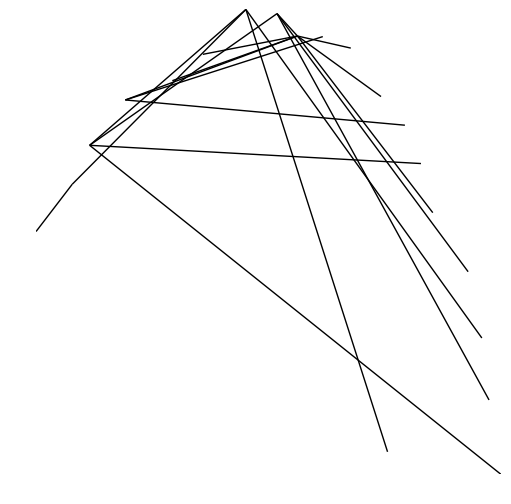

    After 20 iterations
        Discriminator Loss                         = -0.532059073448

    Generator_Loss: -4.08566808701
601
    After 20 iterations
        Discriminator Loss                         = -0.406107217073

    Generator_Loss: -4.09068012238
602
    After 20 iterations
        Discriminator Loss                         = -0.528483688831

    Generator_Loss: -4.16694259644
603
    After 20 iterations
        Discriminator Loss                         = -0.512434363365

    Generator_Loss: -4.16857719421
604
    After 20 iterations
        Discriminator Loss                         = -0.537213683128

    Generator_Loss: -4.20554685593
605
    After 20 iterations
        Discriminator Loss                         = -0.498827159405

    Generator_Loss: -4.17209720612
606
    After 20 iterations
        Discriminator Loss                         = -0.634117424488

    Generator_Loss: -4.03758764267
607
    After 20 iterations
        Discriminator Loss                   

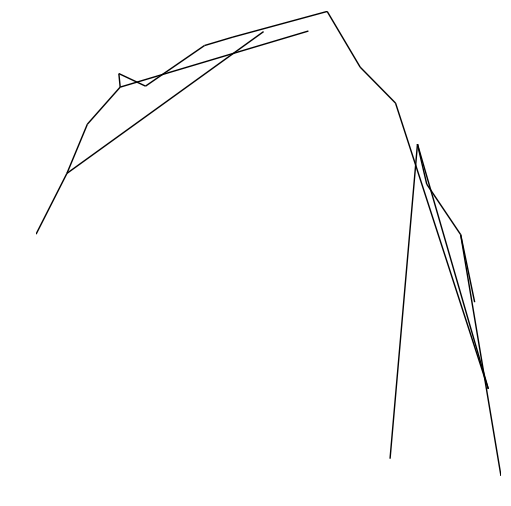

    After 20 iterations
        Discriminator Loss                         = -0.516644179821

    Generator_Loss: -5.09450101852
626
    After 20 iterations
        Discriminator Loss                         = -0.702859580517

    Generator_Loss: -5.21707201004
627
    After 20 iterations
        Discriminator Loss                         = -0.363866537809

    Generator_Loss: -5.35498666763
628
    After 20 iterations
        Discriminator Loss                         = -0.512610971928

    Generator_Loss: -5.5367102623
629
    After 20 iterations
        Discriminator Loss                         = -0.412072211504

    Generator_Loss: -5.55940818787
630
    After 20 iterations
        Discriminator Loss                         = -0.837882637978

    Generator_Loss: -5.73859596252
631
    After 20 iterations
        Discriminator Loss                         = -0.646577239037

    Generator_Loss: -5.61687707901
632
    After 20 iterations
        Discriminator Loss                    

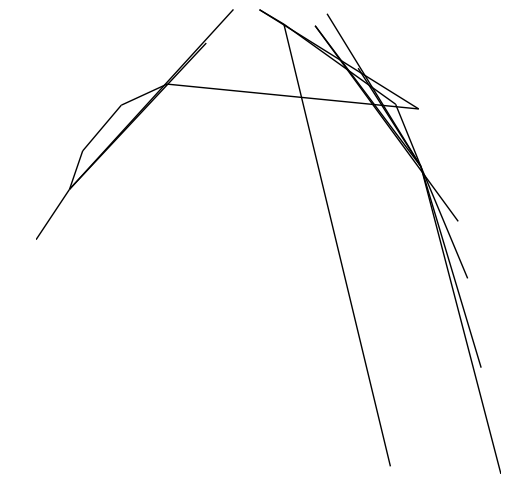

    After 20 iterations
        Discriminator Loss                         = -0.106192365289

    Generator_Loss: -5.26397752762
651
    After 20 iterations
        Discriminator Loss                         = -0.377784997225

    Generator_Loss: -5.33124113083
652
    After 20 iterations
        Discriminator Loss                         = -0.537619948387

    Generator_Loss: -5.23761510849
653
    After 20 iterations
        Discriminator Loss                         = -0.250274837017

    Generator_Loss: -5.36460828781
654
    After 20 iterations
        Discriminator Loss                         = -0.479307562113

    Generator_Loss: -5.21285486221
655
    After 20 iterations
        Discriminator Loss                         = -0.155836582184

    Generator_Loss: -5.29789686203
656
    After 20 iterations
        Discriminator Loss                         = -0.436864495277

    Generator_Loss: -5.33251190186
657
    After 20 iterations
        Discriminator Loss                   

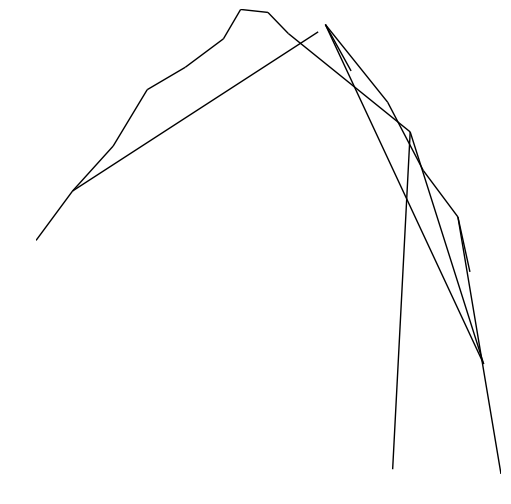

    After 20 iterations
        Discriminator Loss                         = -0.684913814068

    Generator_Loss: -5.02924823761
676
    After 20 iterations
        Discriminator Loss                         = -0.584384143353

    Generator_Loss: -4.95001459122
677
    After 20 iterations
        Discriminator Loss                         = -0.424662172794

    Generator_Loss: -4.83973455429
678
    After 20 iterations
        Discriminator Loss                         = -0.511832594872

    Generator_Loss: -4.71111726761
679
    After 20 iterations
        Discriminator Loss                         = -0.390031248331

    Generator_Loss: -4.69740009308
680
    After 20 iterations
        Discriminator Loss                         = -0.309535622597

    Generator_Loss: -4.74259471893
681
    After 20 iterations
        Discriminator Loss                         = -0.613375484943

    Generator_Loss: -4.71766614914
682
    After 20 iterations
        Discriminator Loss                   

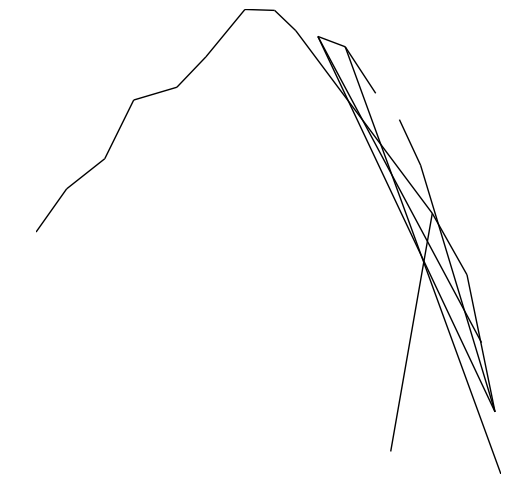

    After 20 iterations
        Discriminator Loss                         = -0.346341371536

    Generator_Loss: -3.68019533157
701
    After 20 iterations
        Discriminator Loss                         = -0.686558663845

    Generator_Loss: -3.59355425835
702
    After 20 iterations
        Discriminator Loss                         = -0.422163695097

    Generator_Loss: -3.53475022316
703
    After 20 iterations
        Discriminator Loss                         = -0.437536746264

    Generator_Loss: -3.50624418259
704
    After 20 iterations
        Discriminator Loss                         = -0.587043881416

    Generator_Loss: -3.42719388008
705
    After 20 iterations
        Discriminator Loss                         = -0.525789678097

    Generator_Loss: -3.36510014534
706
    After 20 iterations
        Discriminator Loss                         = -0.528819203377

    Generator_Loss: -3.42971301079
707
    After 20 iterations
        Discriminator Loss                   

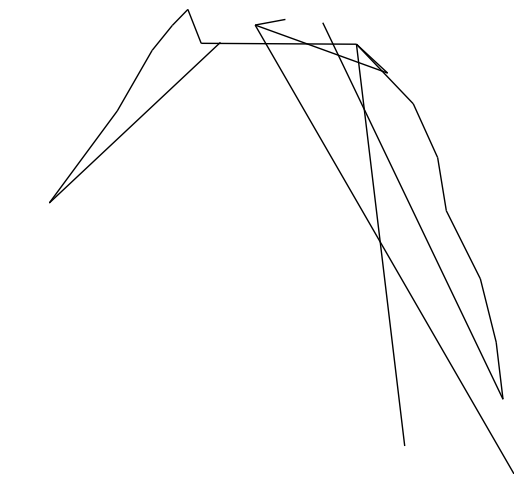

    After 20 iterations
        Discriminator Loss                         = -0.448738306761

    Generator_Loss: -3.33879518509
726
    After 20 iterations
        Discriminator Loss                         = -0.283426403999

    Generator_Loss: -3.38714241982
727
    After 20 iterations
        Discriminator Loss                         = -0.270865052938

    Generator_Loss: -3.38203907013
728
    After 20 iterations
        Discriminator Loss                         = -0.484513401985

    Generator_Loss: -3.47599983215
729
    After 20 iterations
        Discriminator Loss                         = -0.412299305201

    Generator_Loss: -3.56668806076
730
    After 20 iterations
        Discriminator Loss                         = -0.353982508183

    Generator_Loss: -3.77929806709
731
    After 20 iterations
        Discriminator Loss                         = -0.490127921104

    Generator_Loss: -3.93424749374
732
    After 20 iterations
        Discriminator Loss                   

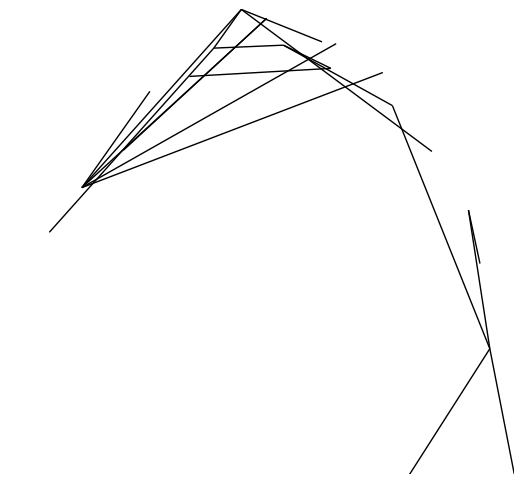

    After 20 iterations
        Discriminator Loss                         = -0.141678020358

    Generator_Loss: -7.03635311127
751
    After 20 iterations
        Discriminator Loss                         = -0.0852640122175

    Generator_Loss: -7.06973934174
752
    After 20 iterations
        Discriminator Loss                         = -0.278204113245

    Generator_Loss: -7.19636821747
753
    After 20 iterations
        Discriminator Loss                         = -0.422348022461

    Generator_Loss: -7.30112075806
754
    After 20 iterations
        Discriminator Loss                         = -0.282467275858

    Generator_Loss: -7.38626766205
755
    After 20 iterations
        Discriminator Loss                         = -0.408114254475

    Generator_Loss: -7.49702262878
756
    After 20 iterations
        Discriminator Loss                         = -0.522571206093

    Generator_Loss: -7.70501375198
757
    After 20 iterations
        Discriminator Loss                  

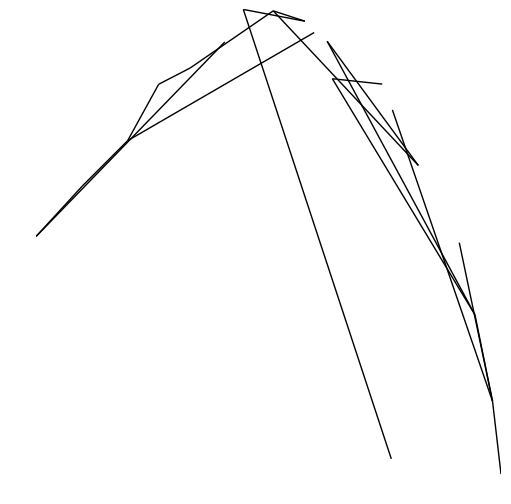

    After 20 iterations
        Discriminator Loss                         = -0.187928378582

    Generator_Loss: -6.44863796234
776
    After 20 iterations
        Discriminator Loss                         = -0.295794308186

    Generator_Loss: -6.37442779541
777
    After 20 iterations
        Discriminator Loss                         = -0.163473024964

    Generator_Loss: -6.25942087173
778
    After 20 iterations
        Discriminator Loss                         = -0.359358459711

    Generator_Loss: -6.28937911987
779
    After 20 iterations
        Discriminator Loss                         = -0.312392681837

    Generator_Loss: -6.21285295486
780
    After 20 iterations
        Discriminator Loss                         = -0.3473533988

    Generator_Loss: -6.15602827072
781

    Epoch #3

    After 20 iterations
        Discriminator Loss                         = -0.329466849566

    Generator_Loss: -5.91568088531
2
    After 20 iterations
        Discriminator Loss        

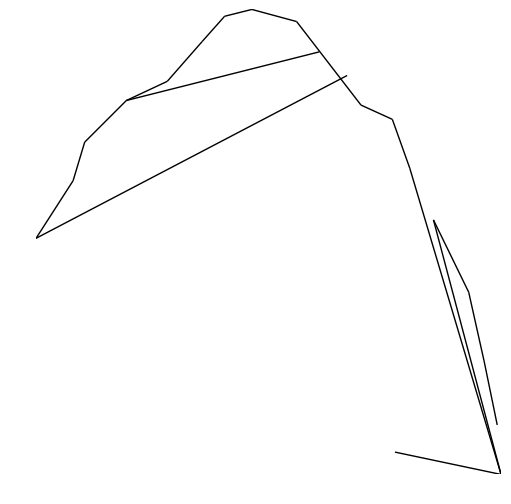

    After 20 iterations
        Discriminator Loss                         = -0.433424055576

    Generator_Loss: -4.29560184479
26
    After 20 iterations
        Discriminator Loss                         = -0.370557576418

    Generator_Loss: -4.44194889069
27
    After 20 iterations
        Discriminator Loss                         = -0.180558010936

    Generator_Loss: -4.25277805328
28
    After 20 iterations
        Discriminator Loss                         = -0.465389102697

    Generator_Loss: -4.2235584259
29
    After 20 iterations
        Discriminator Loss                         = -0.470581591129

    Generator_Loss: -4.13378000259
30
    After 20 iterations
        Discriminator Loss                         = -0.15230832994

    Generator_Loss: -3.95435929298
31
    After 20 iterations
        Discriminator Loss                         = -0.570763349533

    Generator_Loss: -3.99084424973
32
    After 20 iterations
        Discriminator Loss                         = -

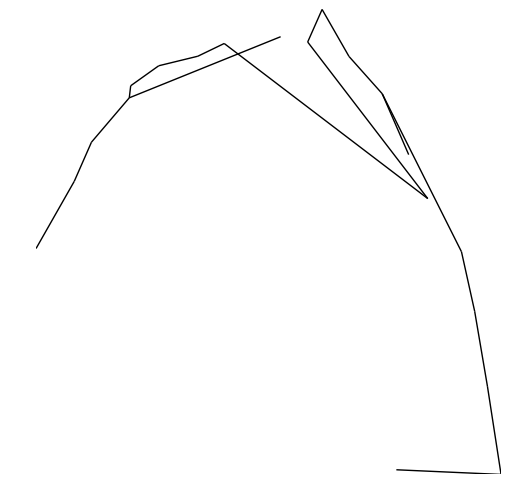

    After 20 iterations
        Discriminator Loss                         = -0.212354585528

    Generator_Loss: -3.93796610832
51
    After 20 iterations
        Discriminator Loss                         = -0.367294549942

    Generator_Loss: -3.96563196182
52
    After 20 iterations
        Discriminator Loss                         = -0.395893901587

    Generator_Loss: -3.84596419334
53
    After 20 iterations
        Discriminator Loss                         = -0.224902719259

    Generator_Loss: -3.87120318413
54
    After 20 iterations
        Discriminator Loss                         = -0.329652577639

    Generator_Loss: -3.86247086525
55
    After 20 iterations
        Discriminator Loss                         = -0.277666926384

    Generator_Loss: -3.82813882828
56
    After 20 iterations
        Discriminator Loss                         = -0.402212232351

    Generator_Loss: -3.98420667648
57
    After 20 iterations
        Discriminator Loss                         =

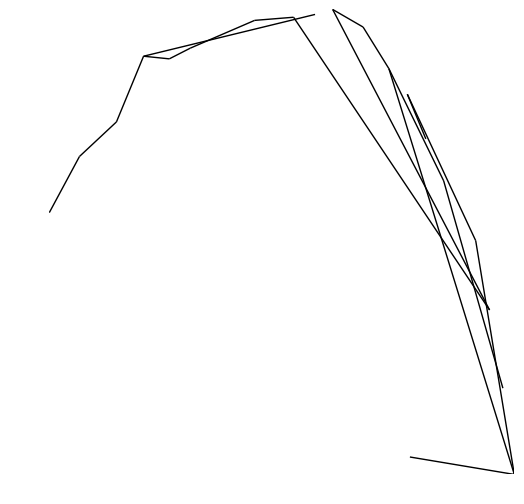

    After 20 iterations
        Discriminator Loss                         = -0.202706709504

    Generator_Loss: -3.44413042068
76
    After 20 iterations
        Discriminator Loss                         = -0.399749666452

    Generator_Loss: -3.63948607445
77
    After 20 iterations
        Discriminator Loss                         = -0.439723283052

    Generator_Loss: -3.61907291412
78
    After 20 iterations
        Discriminator Loss                         = -0.345209300518

    Generator_Loss: -3.57818722725
79
    After 20 iterations
        Discriminator Loss                         = -0.517089664936

    Generator_Loss: -3.58267831802
80
    After 20 iterations
        Discriminator Loss                         = -0.395559966564

    Generator_Loss: -3.6629948616
81
    After 20 iterations
        Discriminator Loss                         = -0.274594604969

    Generator_Loss: -3.75749707222
82
    After 20 iterations
        Discriminator Loss                         = 

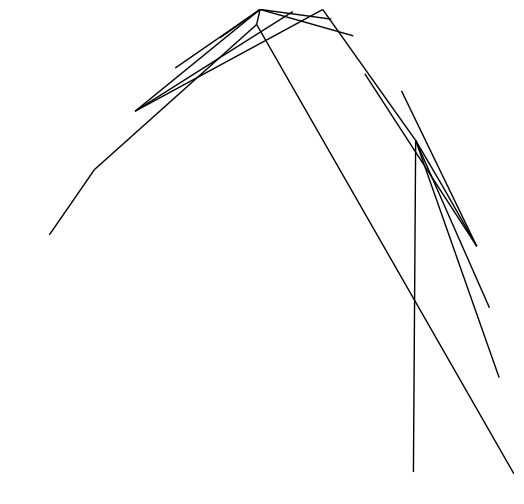

    After 20 iterations
        Discriminator Loss                         = -0.324886202812

    Generator_Loss: -3.8975071907
101
    After 20 iterations
        Discriminator Loss                         = -0.147211432457

    Generator_Loss: -3.57974505424
102
    After 20 iterations
        Discriminator Loss                         = -0.451744675636

    Generator_Loss: -3.59010744095
103
    After 20 iterations
        Discriminator Loss                         = -0.322922796011

    Generator_Loss: -3.5376932621
104
    After 20 iterations
        Discriminator Loss                         = -0.501396596432

    Generator_Loss: -3.48958396912
105
    After 20 iterations
        Discriminator Loss                         = -0.340186804533

    Generator_Loss: -3.33401608467
106
    After 20 iterations
        Discriminator Loss                         = -0.207116603851

    Generator_Loss: -3.07186055183
107
    After 20 iterations
        Discriminator Loss                     

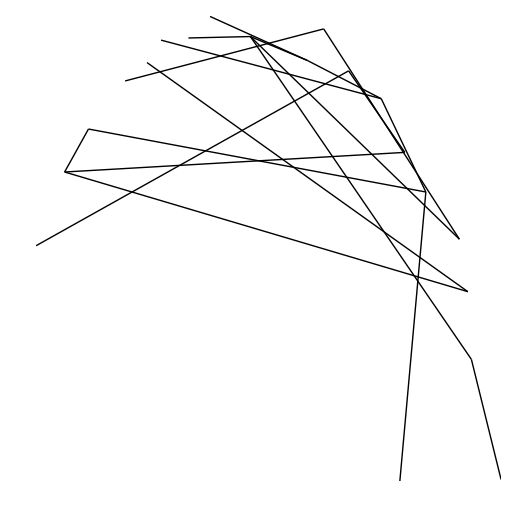

    After 20 iterations
        Discriminator Loss                         = -0.585741221905

    Generator_Loss: -3.04439473152
126
    After 20 iterations
        Discriminator Loss                         = -0.22980158031

    Generator_Loss: -3.0909974575
127
    After 20 iterations
        Discriminator Loss                         = -0.386109232903

    Generator_Loss: -3.26126194
128
    After 20 iterations
        Discriminator Loss                         = -0.442791908979

    Generator_Loss: -3.31027889252
129
    After 20 iterations
        Discriminator Loss                         = -0.290989011526

    Generator_Loss: -3.34896349907
130
    After 20 iterations
        Discriminator Loss                         = -0.391483187675

    Generator_Loss: -3.49670958519
131
    After 20 iterations
        Discriminator Loss                         = -0.323649823666

    Generator_Loss: -3.55465722084
132
    After 20 iterations
        Discriminator Loss                        

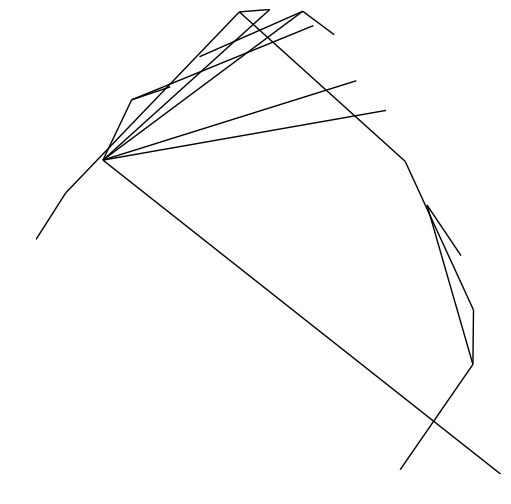

    After 20 iterations
        Discriminator Loss                         = -0.605451405048

    Generator_Loss: -1.78278672695
151
    After 20 iterations
        Discriminator Loss                         = -0.289643704891

    Generator_Loss: -1.80611646175
152
    After 20 iterations
        Discriminator Loss                         = -0.447715908289

    Generator_Loss: -1.79687261581
153
    After 20 iterations
        Discriminator Loss                         = -0.303127020597

    Generator_Loss: -1.77775645256
154
    After 20 iterations
        Discriminator Loss                         = -0.559622704983

    Generator_Loss: -1.66327691078
155
    After 20 iterations
        Discriminator Loss                         = -0.554985225201

    Generator_Loss: -1.63366222382
156
    After 20 iterations
        Discriminator Loss                         = -0.25128147006

    Generator_Loss: -1.71107769012
157
    After 20 iterations
        Discriminator Loss                    

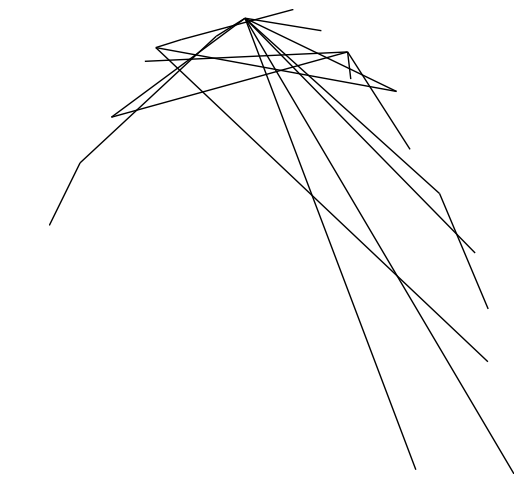

    After 20 iterations
        Discriminator Loss                         = -0.437752068043

    Generator_Loss: -2.94061946869
176
    After 20 iterations
        Discriminator Loss                         = -0.390319824219

    Generator_Loss: -3.0279507637
177
    After 20 iterations
        Discriminator Loss                         = -0.172307997942

    Generator_Loss: -2.94471621513
178
    After 20 iterations
        Discriminator Loss                         = -0.388322651386

    Generator_Loss: -2.95167970657
179
    After 20 iterations
        Discriminator Loss                         = -0.255054503679

    Generator_Loss: -3.07594132423
180
    After 20 iterations
        Discriminator Loss                         = -0.300726264715

    Generator_Loss: -3.16987109184
181
    After 20 iterations
        Discriminator Loss                         = -0.295062065125

    Generator_Loss: -3.21492815018
182
    After 20 iterations
        Discriminator Loss                    

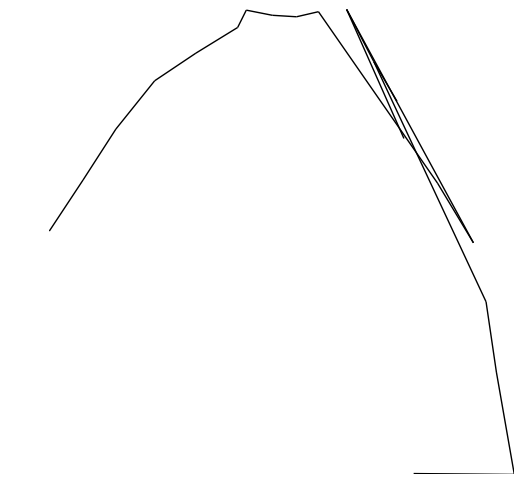

    After 20 iterations
        Discriminator Loss                         = -0.219479843974

    Generator_Loss: -2.3113181591
201
    After 20 iterations
        Discriminator Loss                         = -0.200667455792

    Generator_Loss: -2.40902996063
202
    After 20 iterations
        Discriminator Loss                         = -0.25813305378

    Generator_Loss: -2.29407668114
203
    After 20 iterations
        Discriminator Loss                         = -0.281597584486

    Generator_Loss: -2.3684566021
204
    After 20 iterations
        Discriminator Loss                         = -0.315120518208

    Generator_Loss: -2.52083301544
205
    After 20 iterations
        Discriminator Loss                         = -0.374411582947

    Generator_Loss: -2.54273867607
206
    After 20 iterations
        Discriminator Loss                         = -0.285939514637

    Generator_Loss: -2.46242618561
207
    After 20 iterations
        Discriminator Loss                      

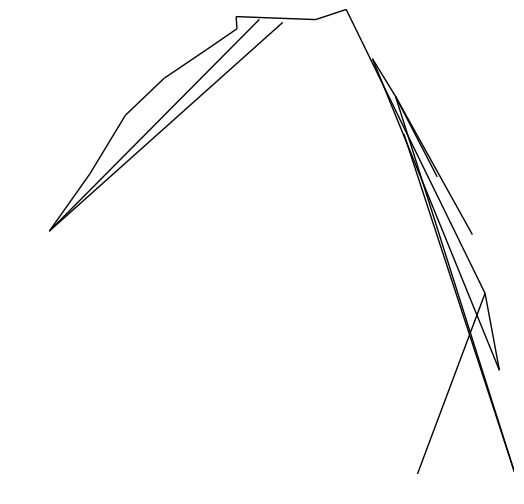

    After 20 iterations
        Discriminator Loss                         = -0.150806412101

    Generator_Loss: -3.03428339958
226
    After 20 iterations
        Discriminator Loss                         = -0.255725979805

    Generator_Loss: -3.01774215698
227
    After 20 iterations
        Discriminator Loss                         = -0.13589181006

    Generator_Loss: -2.99659395218
228
    After 20 iterations
        Discriminator Loss                         = -0.284489959478

    Generator_Loss: -3.10737586021
229
    After 20 iterations
        Discriminator Loss                         = -0.236317813396

    Generator_Loss: -3.059694767
230
    After 20 iterations
        Discriminator Loss                         = -0.310383945704

    Generator_Loss: -3.05367708206
231
    After 20 iterations
        Discriminator Loss                         = -0.257765889168

    Generator_Loss: -3.17963218689
232
    After 20 iterations
        Discriminator Loss                      

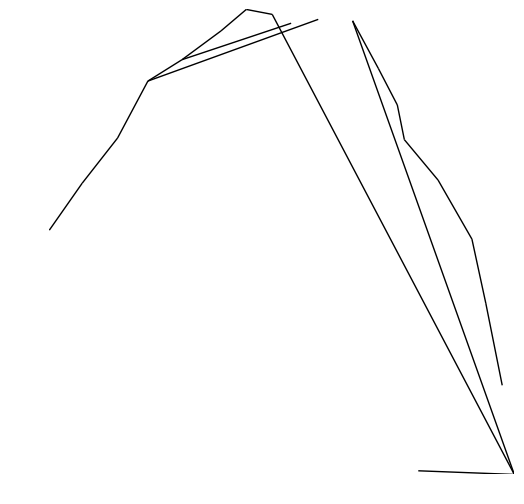

    After 20 iterations
        Discriminator Loss                         = -0.272044569254

    Generator_Loss: -3.22020554543
251
    After 20 iterations
        Discriminator Loss                         = -0.257729649544

    Generator_Loss: -3.17915701866
252
    After 20 iterations
        Discriminator Loss                         = -0.454861849546

    Generator_Loss: -2.96826148033
253
    After 20 iterations
        Discriminator Loss                         = -0.385342717171

    Generator_Loss: -2.90030765533
254
    After 20 iterations
        Discriminator Loss                         = -0.438977271318

    Generator_Loss: -2.90839624405
255
    After 20 iterations
        Discriminator Loss                         = -0.32024616003

    Generator_Loss: -2.81773138046
256
    After 20 iterations
        Discriminator Loss                         = -0.0974536910653

    Generator_Loss: -2.90550851822
257
    After 20 iterations
        Discriminator Loss                   

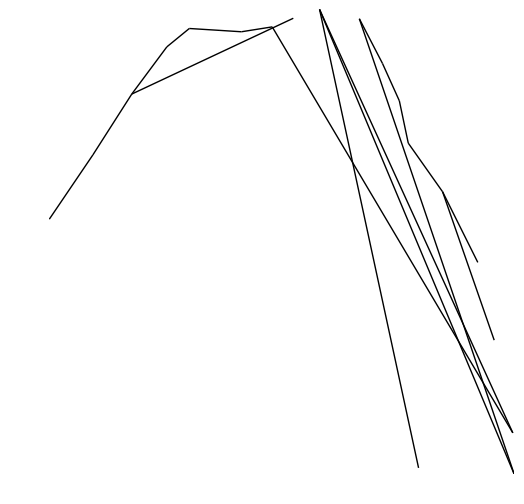

    After 20 iterations
        Discriminator Loss                         = -0.423724263906

    Generator_Loss: -2.70179152489
276
    After 20 iterations
        Discriminator Loss                         = -0.250018984079

    Generator_Loss: -2.64602470398
277
    After 20 iterations
        Discriminator Loss                         = -0.39359909296

    Generator_Loss: -2.69729804993
278
    After 20 iterations
        Discriminator Loss                         = -0.404490232468

    Generator_Loss: -2.67095518112
279
    After 20 iterations
        Discriminator Loss                         = -0.521690249443

    Generator_Loss: -2.68788743019
280
    After 20 iterations
        Discriminator Loss                         = -0.380843132734

    Generator_Loss: -2.6875731945
281
    After 20 iterations
        Discriminator Loss                         = -0.216164693236

    Generator_Loss: -2.66421365738
282
    After 20 iterations
        Discriminator Loss                     

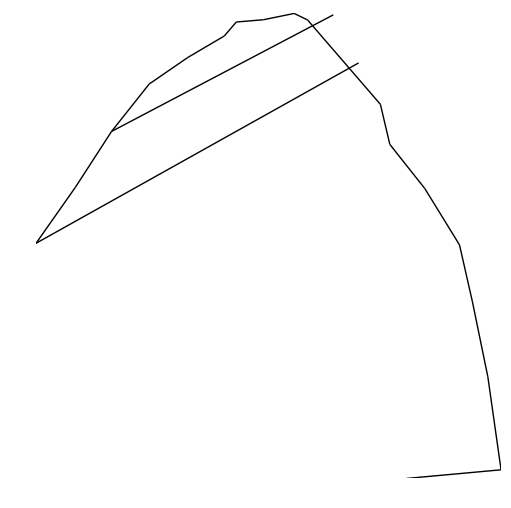

    After 20 iterations
        Discriminator Loss                         = -0.200144946575

    Generator_Loss: -2.38523077965
301
    After 20 iterations
        Discriminator Loss                         = -0.375672578812

    Generator_Loss: -2.26522779465
302
    After 20 iterations
        Discriminator Loss                         = -0.437896460295

    Generator_Loss: -2.2584965229
303
    After 20 iterations
        Discriminator Loss                         = -0.396623969078

    Generator_Loss: -2.22487711906
304
    After 20 iterations
        Discriminator Loss                         = -0.29851052165

    Generator_Loss: -2.16220283508
305
    After 20 iterations
        Discriminator Loss                         = -0.322615027428

    Generator_Loss: -2.05279183388
306
    After 20 iterations
        Discriminator Loss                         = -0.305834293365

    Generator_Loss: -2.18389153481
307
    After 20 iterations
        Discriminator Loss                     

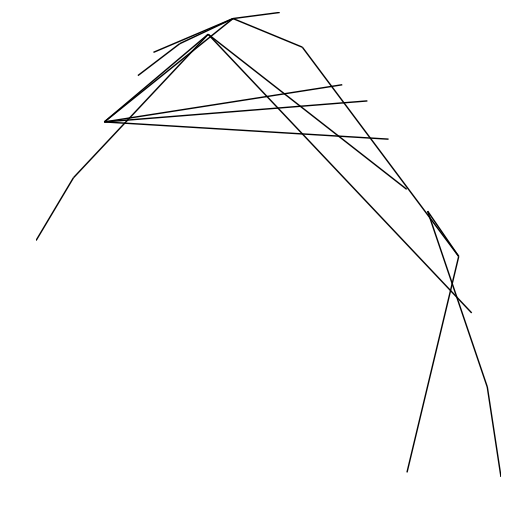

    After 20 iterations
        Discriminator Loss                         = -0.393999606371

    Generator_Loss: -0.873957157135
326
    After 20 iterations
        Discriminator Loss                         = -0.463342308998

    Generator_Loss: -0.762067735195
327
    After 20 iterations
        Discriminator Loss                         = -0.356173038483

    Generator_Loss: -0.705100238323
328
    After 20 iterations
        Discriminator Loss                         = 0.00365290325135

    Generator_Loss: -0.790382921696
329
    After 20 iterations
        Discriminator Loss                         = -0.327503621578

    Generator_Loss: -0.671927034855
330
    After 20 iterations
        Discriminator Loss                         = -0.199541911483

    Generator_Loss: -0.678532481194
331
    After 20 iterations
        Discriminator Loss                         = -0.334235221148

    Generator_Loss: -0.718639969826
332
    After 20 iterations
        Discriminator Loss           

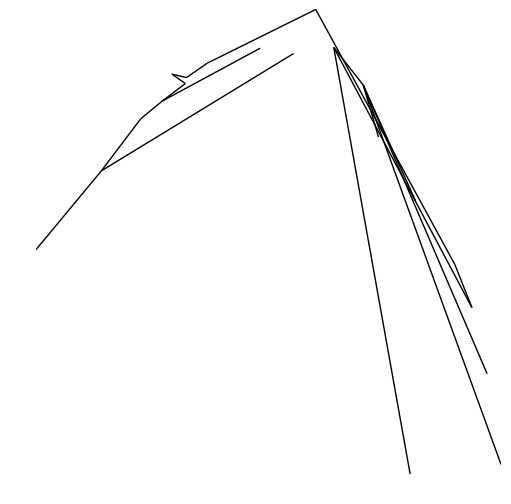

    After 20 iterations
        Discriminator Loss                         = -0.333405524492

    Generator_Loss: -0.756815671921
351
    After 20 iterations
        Discriminator Loss                         = -0.396135449409

    Generator_Loss: -0.757253885269
352
    After 20 iterations
        Discriminator Loss                         = -0.404238671064

    Generator_Loss: -0.738659262657
353
    After 20 iterations
        Discriminator Loss                         = -0.324663460255

    Generator_Loss: -0.599572837353
354
    After 20 iterations
        Discriminator Loss                         = -0.315072387457

    Generator_Loss: -0.599005579948
355
    After 20 iterations
        Discriminator Loss                         = -0.406921893358

    Generator_Loss: -0.560040235519
356
    After 20 iterations
        Discriminator Loss                         = -0.46683216095

    Generator_Loss: -0.592210650444
357
    After 20 iterations
        Discriminator Loss             

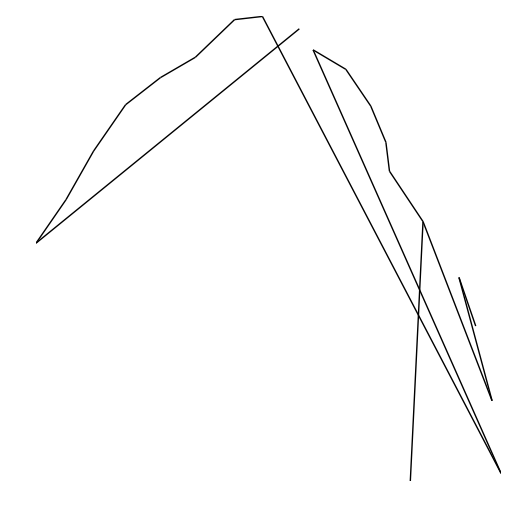

    After 20 iterations
        Discriminator Loss                         = -0.365669071674

    Generator_Loss: 0.595545947552
376
    After 20 iterations
        Discriminator Loss                         = -0.340457320213

    Generator_Loss: 0.683781802654
377
    After 20 iterations
        Discriminator Loss                         = -0.519754767418

    Generator_Loss: 0.778714418411
378
    After 20 iterations
        Discriminator Loss                         = -0.18044732511

    Generator_Loss: 0.72645676136
379
    After 20 iterations
        Discriminator Loss                         = -0.461236357689

    Generator_Loss: 0.856340050697
380
    After 20 iterations
        Discriminator Loss                         = -0.412711292505

    Generator_Loss: 0.898684442043
381
    After 20 iterations
        Discriminator Loss                         = -0.0606257878244

    Generator_Loss: 0.856533885002
382
    After 20 iterations
        Discriminator Loss                    

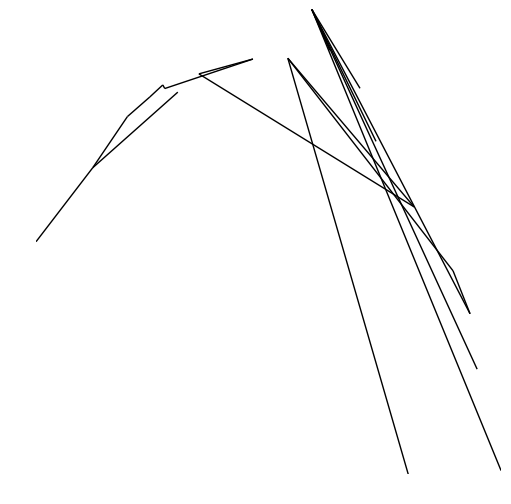

    After 20 iterations
        Discriminator Loss                         = -0.566300570965

    Generator_Loss: -0.265736192465
401
    After 20 iterations
        Discriminator Loss                         = -0.346430510283

    Generator_Loss: -0.39486771822
402
    After 20 iterations
        Discriminator Loss                         = -0.53142863512

    Generator_Loss: -0.316713571548
403
    After 20 iterations
        Discriminator Loss                         = -0.261551201344

    Generator_Loss: -0.351891279221
404
    After 20 iterations
        Discriminator Loss                         = -0.289465367794

    Generator_Loss: -0.264658033848
405
    After 20 iterations
        Discriminator Loss                         = -0.328515410423

    Generator_Loss: -0.18002615869
406
    After 20 iterations
        Discriminator Loss                         = -0.370598763227

    Generator_Loss: -0.0654208436608
407
    After 20 iterations
        Discriminator Loss              

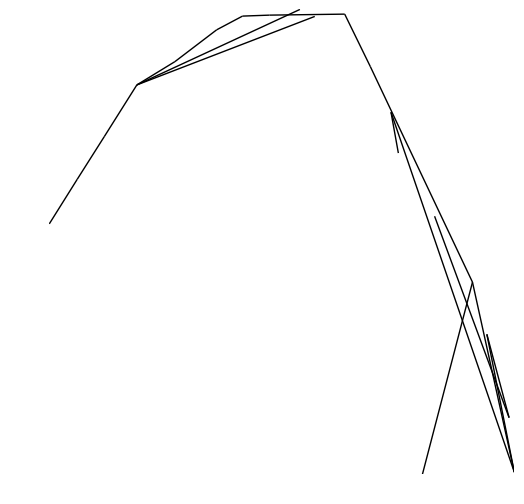

    After 20 iterations
        Discriminator Loss                         = -0.651023745537

    Generator_Loss: 0.635027766228
426
    After 20 iterations
        Discriminator Loss                         = -0.341280639172

    Generator_Loss: 0.604440569878
427
    After 20 iterations
        Discriminator Loss                         = 0.03241250664

    Generator_Loss: 0.463638693094
428
    After 20 iterations
        Discriminator Loss                         = -0.207841739058

    Generator_Loss: 0.39089936018
429
    After 20 iterations
        Discriminator Loss                         = -0.4088717103

    Generator_Loss: 0.345175385475
430
    After 20 iterations
        Discriminator Loss                         = -0.259305000305

    Generator_Loss: 0.293084591627
431
    After 20 iterations
        Discriminator Loss                         = -0.31043317914

    Generator_Loss: 0.264007121325
432
    After 20 iterations
        Discriminator Loss                         

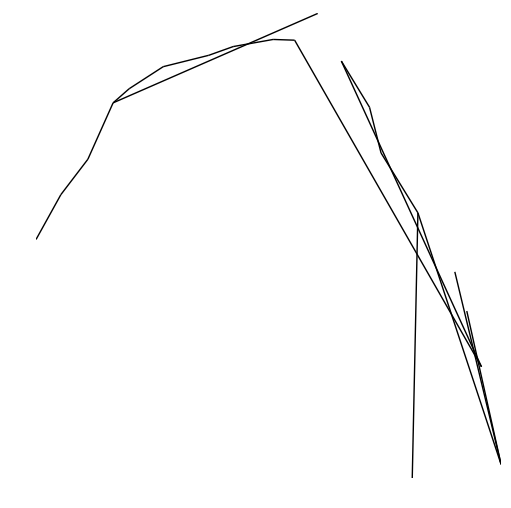

    After 20 iterations
        Discriminator Loss                         = -0.370935171843

    Generator_Loss: -0.283473849297
451
    After 20 iterations
        Discriminator Loss                         = -0.230870932341

    Generator_Loss: -0.35547465086
452
    After 20 iterations
        Discriminator Loss                         = -0.338053047657

    Generator_Loss: -0.449889689684
453
    After 20 iterations
        Discriminator Loss                         = -0.419402897358

    Generator_Loss: -0.525394797325
454
    After 20 iterations
        Discriminator Loss                         = -0.295598745346

    Generator_Loss: -0.654647469521
455
    After 20 iterations
        Discriminator Loss                         = -0.290951162577

    Generator_Loss: -0.656471550465
456
    After 20 iterations
        Discriminator Loss                         = -0.317526787519

    Generator_Loss: -0.824289858341
457
    After 20 iterations
        Discriminator Loss             

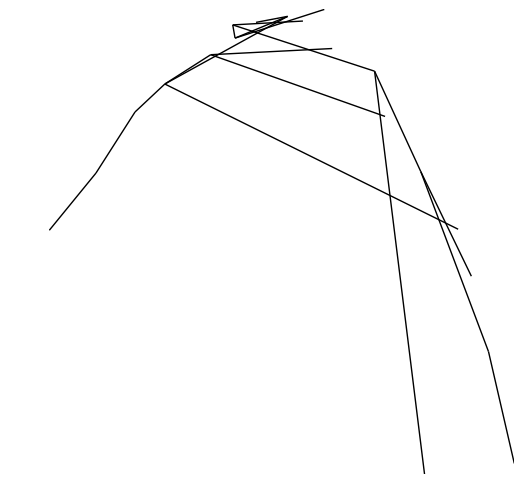

    After 20 iterations
        Discriminator Loss                         = -0.211841702461

    Generator_Loss: -1.92862272263
476
    After 20 iterations
        Discriminator Loss                         = -0.301115572453

    Generator_Loss: -1.86735630035
477
    After 20 iterations
        Discriminator Loss                         = -0.381397068501

    Generator_Loss: -1.96087300777
478
    After 20 iterations
        Discriminator Loss                         = -0.414633989334

    Generator_Loss: -1.99041831493
479
    After 20 iterations
        Discriminator Loss                         = -0.487072616816

    Generator_Loss: -2.05099105835
480
    After 20 iterations
        Discriminator Loss                         = -0.249353513122

    Generator_Loss: -2.10328722
481
    After 20 iterations
        Discriminator Loss                         = -0.512156188488

    Generator_Loss: -2.08466291428
482
    After 20 iterations
        Discriminator Loss                      

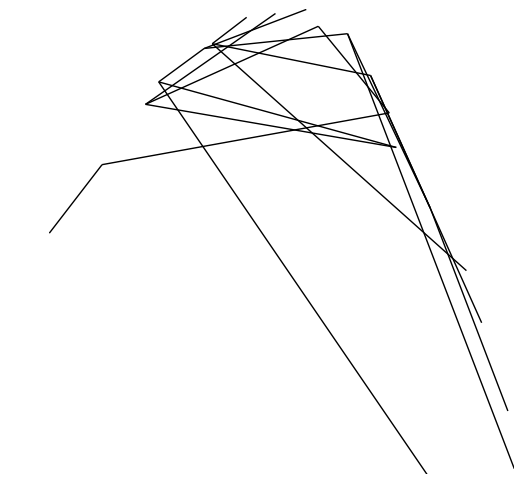

    After 20 iterations
        Discriminator Loss                         = -0.34654840827

    Generator_Loss: -1.33184850216
501
    After 20 iterations
        Discriminator Loss                         = -0.372322231531

    Generator_Loss: -1.24624431133
502
    After 20 iterations
        Discriminator Loss                         = -0.336616486311

    Generator_Loss: -1.14573180676
503
    After 20 iterations
        Discriminator Loss                         = -0.357513725758

    Generator_Loss: -0.96888923645
504
    After 20 iterations
        Discriminator Loss                         = -0.424325019121

    Generator_Loss: -0.893886268139
505
    After 20 iterations
        Discriminator Loss                         = -0.273940950632

    Generator_Loss: -0.800024092197
506
    After 20 iterations
        Discriminator Loss                         = -0.32428368926

    Generator_Loss: -0.717247307301
507
    After 20 iterations
        Discriminator Loss                  

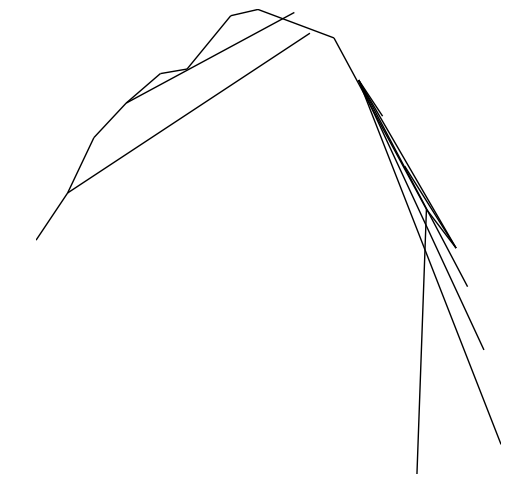

    After 20 iterations
        Discriminator Loss                         = -0.325282335281

    Generator_Loss: 0.10008943826
526
    After 20 iterations
        Discriminator Loss                         = -0.317221343517

    Generator_Loss: -0.0139863546938
527
    After 20 iterations
        Discriminator Loss                         = -0.425636738539

    Generator_Loss: 0.0120950331911
528
    After 20 iterations
        Discriminator Loss                         = -0.441338598728

    Generator_Loss: -0.0637021139264
529
    After 20 iterations
        Discriminator Loss                         = -0.461057990789

    Generator_Loss: 0.0545373335481
530
    After 20 iterations
        Discriminator Loss                         = -0.319417119026

    Generator_Loss: -0.0610222071409
531
    After 20 iterations
        Discriminator Loss                         = -0.443086415529

    Generator_Loss: -0.0906120240688
532
    After 20 iterations
        Discriminator Loss          

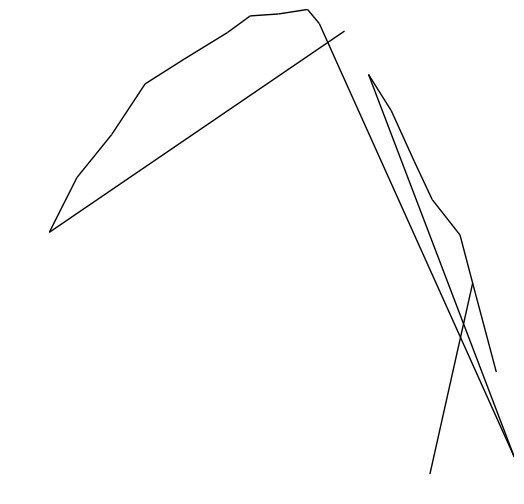

    After 20 iterations
        Discriminator Loss                         = -0.20229446888

    Generator_Loss: -0.809615373611
551
    After 20 iterations
        Discriminator Loss                         = -0.496390104294

    Generator_Loss: -0.702816545963
552
    After 20 iterations
        Discriminator Loss                         = -0.359106332064

    Generator_Loss: -0.450919896364
553
    After 20 iterations
        Discriminator Loss                         = -0.305577278137

    Generator_Loss: -0.363880187273
554
    After 20 iterations
        Discriminator Loss                         = -0.50595843792

    Generator_Loss: -0.210081905127
555
    After 20 iterations
        Discriminator Loss                         = -0.115530669689

    Generator_Loss: -0.322108179331
556
    After 20 iterations
        Discriminator Loss                         = -0.330775558949

    Generator_Loss: -0.255932688713
557
    After 20 iterations
        Discriminator Loss              

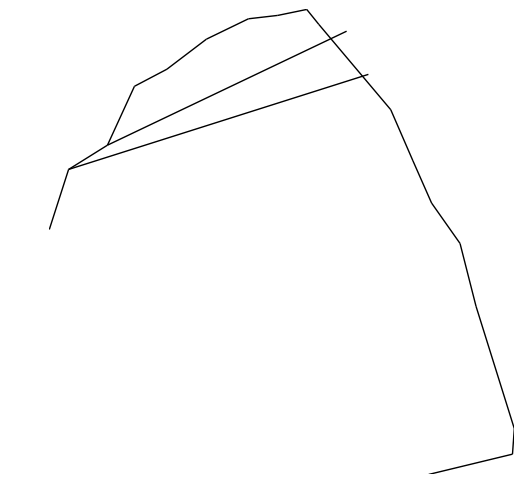

    After 20 iterations
        Discriminator Loss                         = -0.408682644367

    Generator_Loss: 0.0335674621165
576
    After 20 iterations
        Discriminator Loss                         = -0.481475621462

    Generator_Loss: 0.116033479571
577
    After 20 iterations
        Discriminator Loss                         = -0.533267199993

    Generator_Loss: 0.107152052224
578
    After 20 iterations
        Discriminator Loss                         = -0.310497552156

    Generator_Loss: 0.0857837572694
579
    After 20 iterations
        Discriminator Loss                         = -0.419487416744

    Generator_Loss: 0.0913364142179
580
    After 20 iterations
        Discriminator Loss                         = -0.366760551929

    Generator_Loss: 0.012767450884
581
    After 20 iterations
        Discriminator Loss                         = -0.357677727938

    Generator_Loss: 0.021060494706
582
    After 20 iterations
        Discriminator Loss                

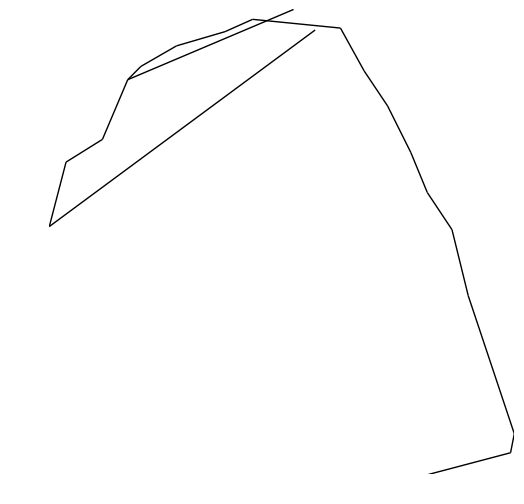

    After 20 iterations
        Discriminator Loss                         = -0.309216111898

    Generator_Loss: 0.130663216114
601
    After 20 iterations
        Discriminator Loss                         = -0.333383530378

    Generator_Loss: 0.0888008549809
602
    After 20 iterations
        Discriminator Loss                         = -0.308024078608

    Generator_Loss: 0.00955583062023
603
    After 20 iterations
        Discriminator Loss                         = -0.294888198376

    Generator_Loss: -0.0105606615543
604
    After 20 iterations
        Discriminator Loss                         = -0.370905250311

    Generator_Loss: -0.0402552634478
605
    After 20 iterations
        Discriminator Loss                         = -0.469977200031

    Generator_Loss: 0.000547336705495
606
    After 20 iterations
        Discriminator Loss                         = -0.523087024689

    Generator_Loss: 0.137054547668
607
    After 20 iterations
        Discriminator Loss         

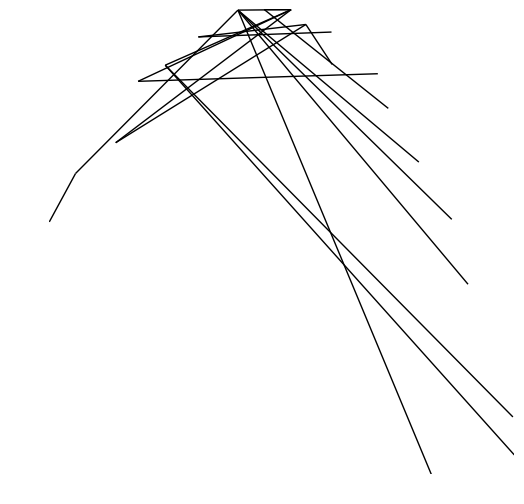

    After 20 iterations
        Discriminator Loss                         = -0.2170201689

    Generator_Loss: 0.47021061182
626
    After 20 iterations
        Discriminator Loss                         = -0.372242450714

    Generator_Loss: 0.415297836065
627
    After 20 iterations
        Discriminator Loss                         = -0.184967532754

    Generator_Loss: 0.305749237537
628
    After 20 iterations
        Discriminator Loss                         = -0.283362269402

    Generator_Loss: 0.153505727649
629
    After 20 iterations
        Discriminator Loss                         = -0.315794289112

    Generator_Loss: 0.123343929648
630
    After 20 iterations
        Discriminator Loss                         = -0.27940928936

    Generator_Loss: -0.0866025611758
631
    After 20 iterations
        Discriminator Loss                         = -0.320421397686

    Generator_Loss: -0.081749252975
632
    After 20 iterations
        Discriminator Loss                    

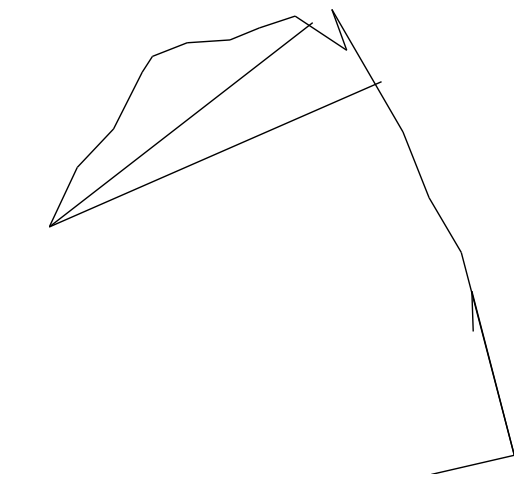

    After 20 iterations
        Discriminator Loss                         = -0.273572415113

    Generator_Loss: -0.77458178997
651
    After 20 iterations
        Discriminator Loss                         = -0.221602827311

    Generator_Loss: -0.815461397171
652
    After 20 iterations
        Discriminator Loss                         = -0.336739838123

    Generator_Loss: -0.773958384991
653
    After 20 iterations
        Discriminator Loss                         = -0.312903165817

    Generator_Loss: -0.846571028233
654
    After 20 iterations
        Discriminator Loss                         = -0.288682579994

    Generator_Loss: -0.719138205051
655
    After 20 iterations
        Discriminator Loss                         = -0.365574747324

    Generator_Loss: -0.767238736153
656
    After 20 iterations
        Discriminator Loss                         = -0.35227778554

    Generator_Loss: -0.798121869564
657
    After 20 iterations
        Discriminator Loss              

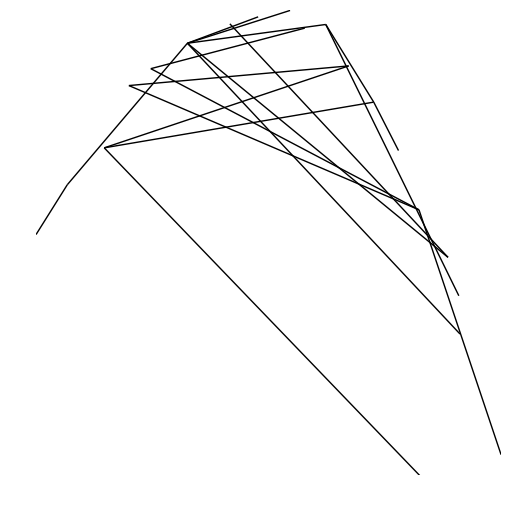

    After 20 iterations
        Discriminator Loss                         = -0.220303922892

    Generator_Loss: -0.901800394058
676
    After 20 iterations
        Discriminator Loss                         = -0.30944788456

    Generator_Loss: -0.856076419353
677
    After 20 iterations
        Discriminator Loss                         = -0.3557087183

    Generator_Loss: -0.780036509037
678
    After 20 iterations
        Discriminator Loss                         = -0.32282781601

    Generator_Loss: -0.601890861988
679
    After 20 iterations
        Discriminator Loss                         = -0.305295556784

    Generator_Loss: -0.631252288818
680
    After 20 iterations
        Discriminator Loss                         = -0.0480486564338

    Generator_Loss: -0.710511744022
681
    After 20 iterations
        Discriminator Loss                         = -0.325543016195

    Generator_Loss: -0.688115477562
682
    After 20 iterations
        Discriminator Loss               

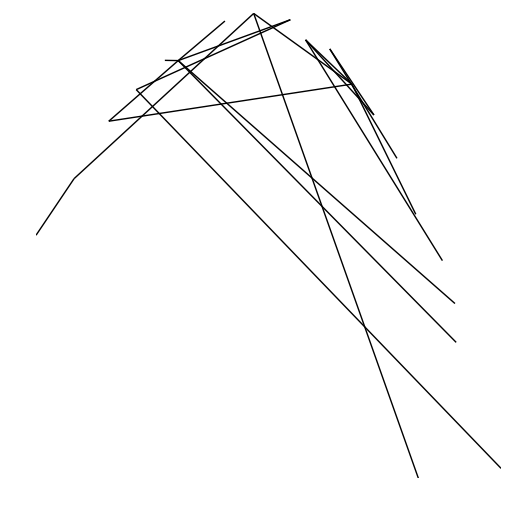

    After 20 iterations
        Discriminator Loss                         = -0.423585563898

    Generator_Loss: -0.200130477548
701
    After 20 iterations
        Discriminator Loss                         = -0.399111390114

    Generator_Loss: -0.144156500697
702
    After 20 iterations
        Discriminator Loss                         = -0.295853257179

    Generator_Loss: -0.0860324501991
703
    After 20 iterations
        Discriminator Loss                         = -0.218449637294

    Generator_Loss: -0.0736260488629
704
    After 20 iterations
        Discriminator Loss                         = -0.526932179928

    Generator_Loss: -0.00810951553285
705
    After 20 iterations
        Discriminator Loss                         = -0.275208353996

    Generator_Loss: 0.0343524515629
706
    After 20 iterations
        Discriminator Loss                         = -0.0642936900258

    Generator_Loss: -0.0688606575131
707
    After 20 iterations
        Discriminator Loss      

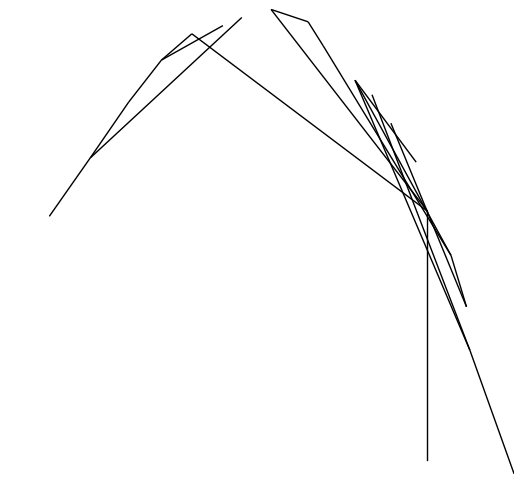

    After 20 iterations
        Discriminator Loss                         = -0.257568836212

    Generator_Loss: 0.140754655004
726
    After 20 iterations
        Discriminator Loss                         = -0.552641808987

    Generator_Loss: 0.12332161516
727
    After 20 iterations
        Discriminator Loss                         = -0.278213620186

    Generator_Loss: 0.142624124885
728
    After 20 iterations
        Discriminator Loss                         = -0.352777510881

    Generator_Loss: 0.0699509456754
729
    After 20 iterations
        Discriminator Loss                         = -0.235681831837

    Generator_Loss: 0.0883724242449
730
    After 20 iterations
        Discriminator Loss                         = -0.287836641073

    Generator_Loss: -0.02824604325
731
    After 20 iterations
        Discriminator Loss                         = -0.131012693048

    Generator_Loss: -0.117496706545
732
    After 20 iterations
        Discriminator Loss                 

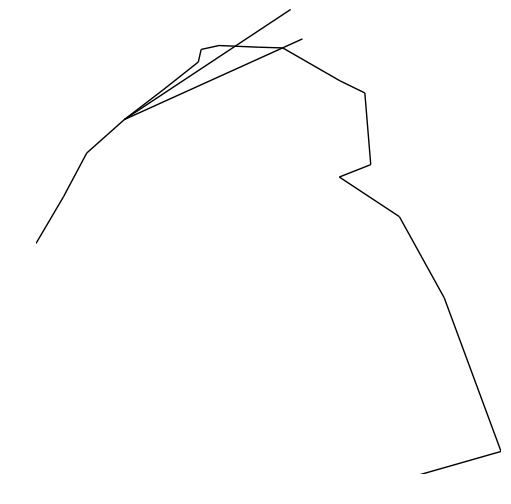

    After 20 iterations
        Discriminator Loss                         = -0.329960882664

    Generator_Loss: -1.9909632206
751
    After 20 iterations
        Discriminator Loss                         = -0.409660279751

    Generator_Loss: -2.07095980644
752
    After 20 iterations
        Discriminator Loss                         = -0.261819541454

    Generator_Loss: -2.19504976273
753
    After 20 iterations
        Discriminator Loss                         = -0.283996582031

    Generator_Loss: -2.33132576942
754
    After 20 iterations
        Discriminator Loss                         = -0.321078538895

    Generator_Loss: -2.31153535843
755
    After 20 iterations
        Discriminator Loss                         = -0.416619032621

    Generator_Loss: -2.38830065727
756
    After 20 iterations
        Discriminator Loss                         = -0.570936918259

    Generator_Loss: -2.46089959145
757
    After 20 iterations
        Discriminator Loss                    

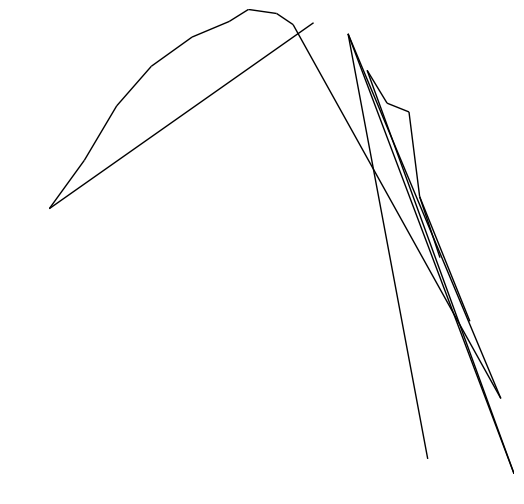

    After 20 iterations
        Discriminator Loss                         = -0.23605465889

    Generator_Loss: -1.96481883526
776
    After 20 iterations
        Discriminator Loss                         = -0.0904230028391

    Generator_Loss: -1.9513297081
777
    After 20 iterations
        Discriminator Loss                         = -0.156654328108

    Generator_Loss: -1.93800878525
778
    After 20 iterations
        Discriminator Loss                         = -0.0627273991704

    Generator_Loss: -2.04074645042
779
    After 20 iterations
        Discriminator Loss                         = -0.317514508963

    Generator_Loss: -2.02417898178
780
    After 20 iterations
        Discriminator Loss                         = -0.375194966793

    Generator_Loss: -2.05839514732
781

    Epoch #4

    After 20 iterations
        Discriminator Loss                         = -0.146508991718

    Generator_Loss: -1.90057778358
2
    After 20 iterations
        Discriminator Loss      

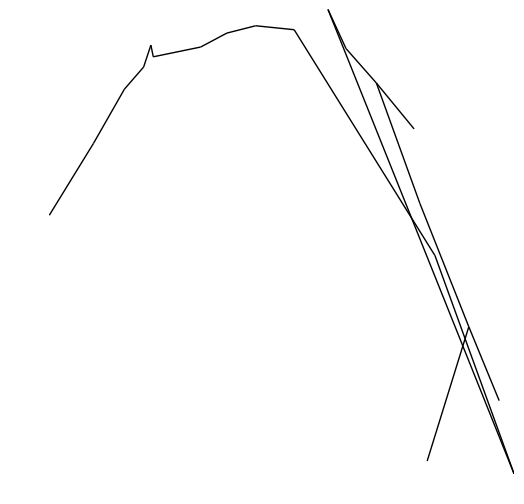

    After 20 iterations
        Discriminator Loss                         = -0.231622457504

    Generator_Loss: -1.95641970634
26
    After 20 iterations
        Discriminator Loss                         = -0.477058023214

    Generator_Loss: -2.1460416317
27
    After 20 iterations
        Discriminator Loss                         = -0.178371563554

    Generator_Loss: -2.05122375488
28
    After 20 iterations
        Discriminator Loss                         = -0.223887369037

    Generator_Loss: -2.09423851967
29
    After 20 iterations
        Discriminator Loss                         = -0.27569308877

    Generator_Loss: -2.08791065216
30
    After 20 iterations
        Discriminator Loss                         = -0.310969978571

    Generator_Loss: -1.95787978172
31
    After 20 iterations
        Discriminator Loss                         = -0.246815875173

    Generator_Loss: -2.01321434975
32
    After 20 iterations
        Discriminator Loss                         = -

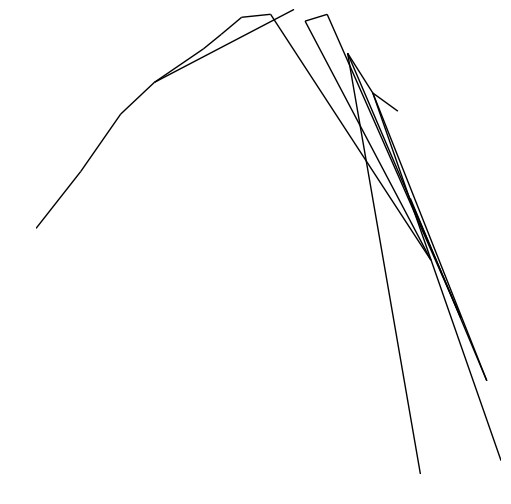

    After 20 iterations
        Discriminator Loss                         = -0.370854079723

    Generator_Loss: -1.1363888979
51
    After 20 iterations
        Discriminator Loss                         = -0.291903138161

    Generator_Loss: -0.995893478394
52
    After 20 iterations
        Discriminator Loss                         = -0.295656144619

    Generator_Loss: -0.745678186417
53
    After 20 iterations
        Discriminator Loss                         = -0.269129484892

    Generator_Loss: -0.69245582819
54
    After 20 iterations
        Discriminator Loss                         = -0.438693851233

    Generator_Loss: -0.582141280174
55
    After 20 iterations
        Discriminator Loss                         = -0.326958537102

    Generator_Loss: -0.464980721474
56
    After 20 iterations
        Discriminator Loss                         = -0.223080143332

    Generator_Loss: -0.519010305405
57
    After 20 iterations
        Discriminator Loss                      

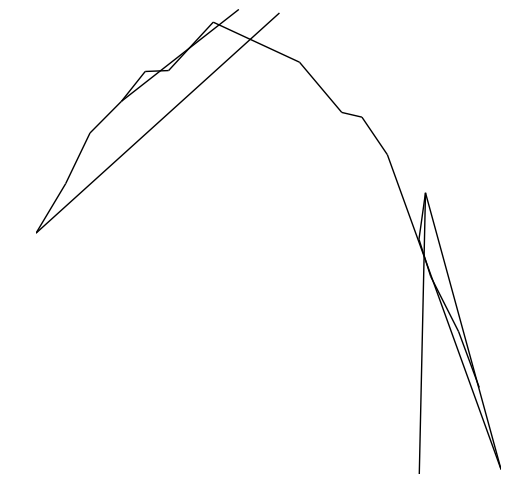

    After 20 iterations
        Discriminator Loss                         = -0.361825466156

    Generator_Loss: 0.363135010004
76
    After 20 iterations
        Discriminator Loss                         = -0.382265210152

    Generator_Loss: 0.181758254766
77
    After 20 iterations
        Discriminator Loss                         = -0.300948619843

    Generator_Loss: 0.193675354123
78
    After 20 iterations
        Discriminator Loss                         = -0.202196151018

    Generator_Loss: 0.217250004411
79
    After 20 iterations
        Discriminator Loss                         = -0.373729497194

    Generator_Loss: 0.298091977835
80
    After 20 iterations
        Discriminator Loss                         = -0.35917237401

    Generator_Loss: 0.212001532316
81
    After 20 iterations
        Discriminator Loss                         = -0.445023715496

    Generator_Loss: 0.0810856819153
82
    After 20 iterations
        Discriminator Loss                         =

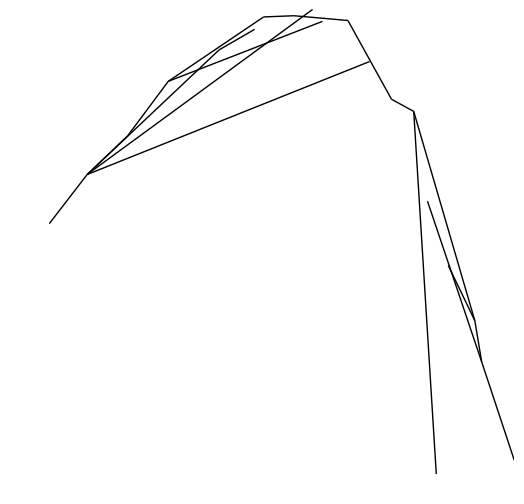

    After 20 iterations
        Discriminator Loss                         = -0.256545335054

    Generator_Loss: -0.551379680634
101
    After 20 iterations
        Discriminator Loss                         = -0.372449964285

    Generator_Loss: -0.252956151962
102
    After 20 iterations
        Discriminator Loss                         = -0.289061903954

    Generator_Loss: -0.208755403757
103
    After 20 iterations
        Discriminator Loss                         = -0.21863001585

    Generator_Loss: -0.114690370858
104
    After 20 iterations
        Discriminator Loss                         = -0.301954716444

    Generator_Loss: 0.0888742208481
105
    After 20 iterations
        Discriminator Loss                         = -0.278627246618

    Generator_Loss: 0.256553262472
106
    After 20 iterations
        Discriminator Loss                         = -0.316427439451

    Generator_Loss: 0.387766838074
107
    After 20 iterations
        Discriminator Loss               

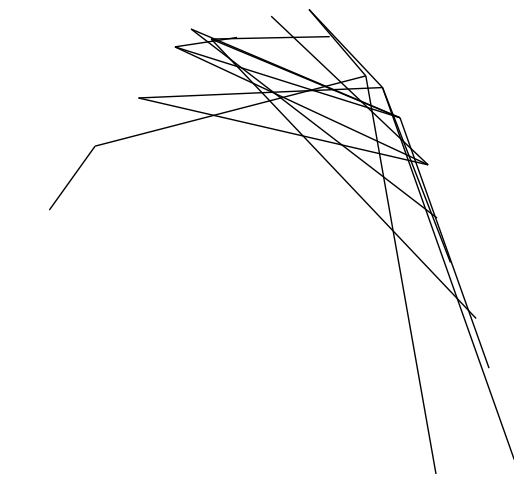

    After 20 iterations
        Discriminator Loss                         = -0.202188417315

    Generator_Loss: -0.393265932798
126
    After 20 iterations
        Discriminator Loss                         = -0.297460615635

    Generator_Loss: -0.365721911192
127
    After 20 iterations
        Discriminator Loss                         = -0.264459550381

    Generator_Loss: -0.424773722887
128
    After 20 iterations
        Discriminator Loss                         = -0.322318762541

    Generator_Loss: -0.43894380331
129
    After 20 iterations
        Discriminator Loss                         = -0.180618643761

    Generator_Loss: -0.516356706619
130
    After 20 iterations
        Discriminator Loss                         = -0.308908879757

    Generator_Loss: -0.747031331062
131
    After 20 iterations
        Discriminator Loss                         = -0.381803780794

    Generator_Loss: -0.888988494873
132
    After 20 iterations
        Discriminator Loss             

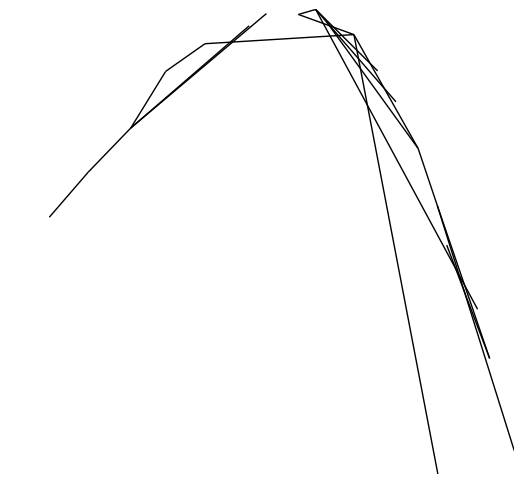

    After 20 iterations
        Discriminator Loss                         = -0.256575852633

    Generator_Loss: -1.49355959892
151
    After 20 iterations
        Discriminator Loss                         = -0.235446363688

    Generator_Loss: -1.49545097351
152
    After 20 iterations
        Discriminator Loss                         = -0.296266198158

    Generator_Loss: -1.48100209236
153
    After 20 iterations
        Discriminator Loss                         = -0.341611653566

    Generator_Loss: -1.48993492126
154
    After 20 iterations
        Discriminator Loss                         = -0.161820098758

    Generator_Loss: -1.38261532784
155
    After 20 iterations
        Discriminator Loss                         = -0.183577939868

    Generator_Loss: -1.35339927673
156
    After 20 iterations
        Discriminator Loss                         = -0.29531249404

    Generator_Loss: -1.37284314632
157
    After 20 iterations
        Discriminator Loss                    

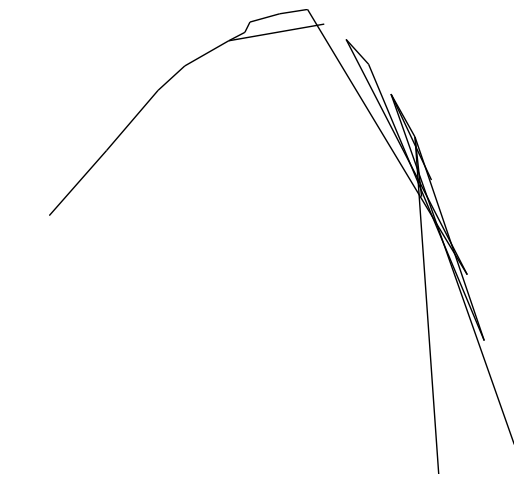

    After 20 iterations
        Discriminator Loss                         = -0.310863018036

    Generator_Loss: -1.73483467102
176
    After 20 iterations
        Discriminator Loss                         = -0.313204735518

    Generator_Loss: -1.77584278584
177
    After 20 iterations
        Discriminator Loss                         = -0.256618231535

    Generator_Loss: -1.70488595963
178
    After 20 iterations
        Discriminator Loss                         = -0.250985950232

    Generator_Loss: -1.71469461918
179
    After 20 iterations
        Discriminator Loss                         = -0.423020422459

    Generator_Loss: -1.85999238491
180
    After 20 iterations
        Discriminator Loss                         = -0.375432997942

    Generator_Loss: -1.92174577713
181
    After 20 iterations
        Discriminator Loss                         = -0.317356795073

    Generator_Loss: -1.97273755074
182
    After 20 iterations
        Discriminator Loss                   

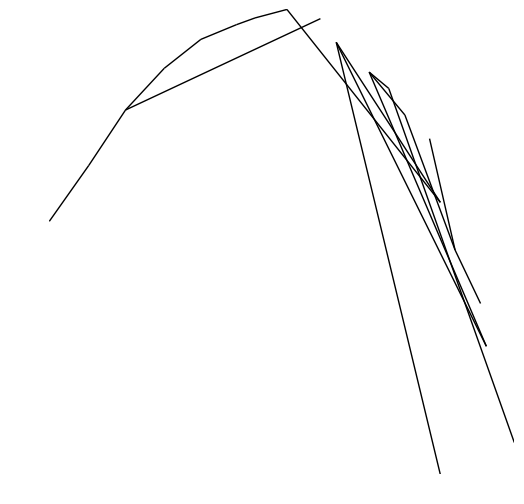

    After 20 iterations
        Discriminator Loss                         = -0.172215312719

    Generator_Loss: -1.88946163654
201
    After 20 iterations
        Discriminator Loss                         = -0.398133844137

    Generator_Loss: -2.00411820412
202
    After 20 iterations
        Discriminator Loss                         = -0.211303129792

    Generator_Loss: -1.91151022911
203
    After 20 iterations
        Discriminator Loss                         = -0.406565308571

    Generator_Loss: -1.96392250061
204
    After 20 iterations
        Discriminator Loss                         = -0.359537869692

    Generator_Loss: -2.14936900139
205
    After 20 iterations
        Discriminator Loss                         = -0.265003353357

    Generator_Loss: -2.12756824493
206
    After 20 iterations
        Discriminator Loss                         = -0.238991305232

    Generator_Loss: -2.18457245827
207
    After 20 iterations
        Discriminator Loss                   

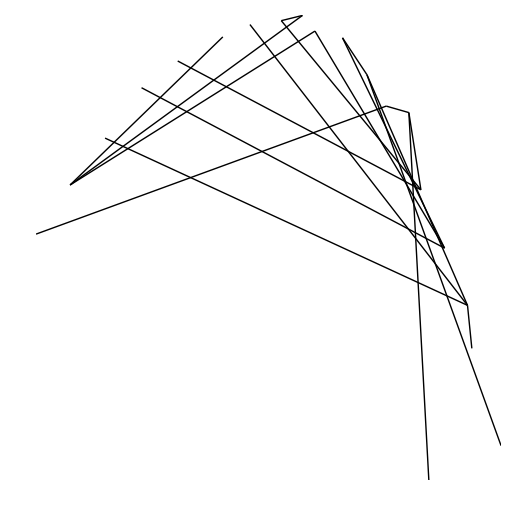

    After 20 iterations
        Discriminator Loss                         = -0.0877673700452

    Generator_Loss: -2.1837220192
226
    After 20 iterations
        Discriminator Loss                         = -0.279884666204

    Generator_Loss: -2.18173742294
227
    After 20 iterations
        Discriminator Loss                         = -0.242578566074

    Generator_Loss: -2.09970617294
228
    After 20 iterations
        Discriminator Loss                         = -0.307901829481

    Generator_Loss: -2.19181752205
229
    After 20 iterations
        Discriminator Loss                         = -0.23439002037

    Generator_Loss: -2.14581155777
230
    After 20 iterations
        Discriminator Loss                         = -0.187179267406

    Generator_Loss: -2.04571151733
231
    After 20 iterations
        Discriminator Loss                         = -0.343780755997

    Generator_Loss: -2.10886740685
232
    After 20 iterations
        Discriminator Loss                    

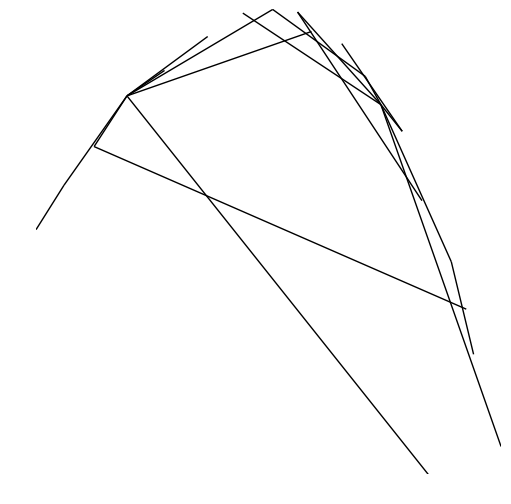

    After 20 iterations
        Discriminator Loss                         = -0.196609154344

    Generator_Loss: -1.9528657198
251
    After 20 iterations
        Discriminator Loss                         = -0.234400004148

    Generator_Loss: -1.83611774445
252
    After 20 iterations
        Discriminator Loss                         = -0.309526503086

    Generator_Loss: -1.53079175949
253
    After 20 iterations
        Discriminator Loss                         = -0.276048988104

    Generator_Loss: -1.37412059307
254
    After 20 iterations
        Discriminator Loss                         = -0.170530468225

    Generator_Loss: -1.27281498909
255
    After 20 iterations
        Discriminator Loss                         = -0.383129149675

    Generator_Loss: -1.05901479721
256
    After 20 iterations
        Discriminator Loss                         = -0.26194229722

    Generator_Loss: -0.947629213333
257
    After 20 iterations
        Discriminator Loss                    

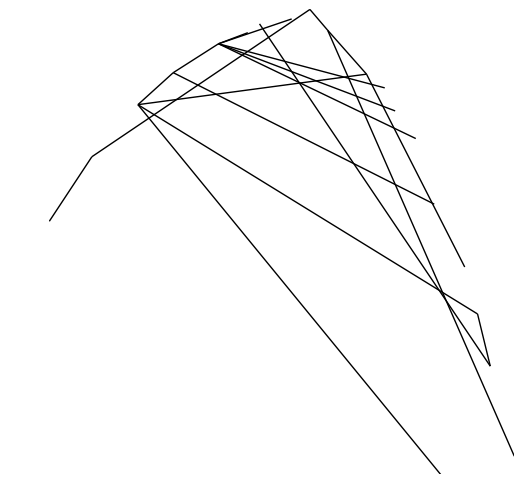

    After 20 iterations
        Discriminator Loss                         = -0.261280506849

    Generator_Loss: -2.19256734848
276
    After 20 iterations
        Discriminator Loss                         = -0.143743366003

    Generator_Loss: -1.98034131527
277
    After 20 iterations
        Discriminator Loss                         = -0.156075164676

    Generator_Loss: -1.85004329681
278
    After 20 iterations
        Discriminator Loss                         = -0.308974832296

    Generator_Loss: -1.58455359936
279
    After 20 iterations
        Discriminator Loss                         = -0.142024636269

    Generator_Loss: -1.3345168829
280
    After 20 iterations
        Discriminator Loss                         = -0.246084302664

    Generator_Loss: -1.1731543541
281
    After 20 iterations
        Discriminator Loss                         = -0.297489851713

    Generator_Loss: -0.981222629547
282
    After 20 iterations
        Discriminator Loss                    

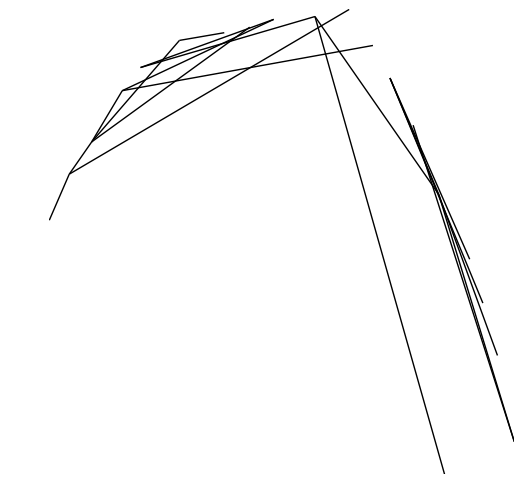

    After 20 iterations
        Discriminator Loss                         = -0.193977564573

    Generator_Loss: -1.77902579308
301
    After 20 iterations
        Discriminator Loss                         = -0.332008361816

    Generator_Loss: -1.78191280365
302
    After 20 iterations
        Discriminator Loss                         = -0.322040498257

    Generator_Loss: -1.9406696558
303
    After 20 iterations
        Discriminator Loss                         = -0.30678164959

    Generator_Loss: -2.11582899094
304
    After 20 iterations
        Discriminator Loss                         = -0.288382560015

    Generator_Loss: -2.22139430046
305
    After 20 iterations
        Discriminator Loss                         = -0.248834609985

    Generator_Loss: -2.19392228127
306
    After 20 iterations
        Discriminator Loss                         = -0.313048779964

    Generator_Loss: -2.39304423332
307
    After 20 iterations
        Discriminator Loss                     

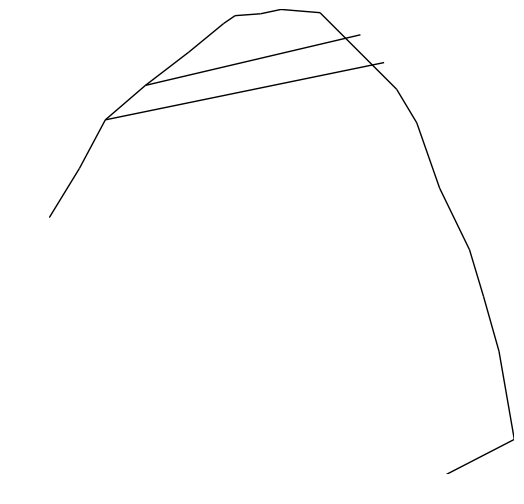

    After 20 iterations
        Discriminator Loss                         = -0.172400996089

    Generator_Loss: -0.171427488327
326
    After 20 iterations
        Discriminator Loss                         = -0.190820634365

    Generator_Loss: -0.272186458111
327
    After 20 iterations
        Discriminator Loss                         = -0.187884375453

    Generator_Loss: -0.418060392141
328
    After 20 iterations
        Discriminator Loss                         = -0.0188694037497

    Generator_Loss: -0.746069788933
329
    After 20 iterations
        Discriminator Loss                         = -0.143066257238

    Generator_Loss: -0.832861542702
330
    After 20 iterations
        Discriminator Loss                         = -0.149481892586

    Generator_Loss: -0.983904182911
331
    After 20 iterations
        Discriminator Loss                         = -0.343860566616

    Generator_Loss: -1.23371553421
332
    After 20 iterations
        Discriminator Loss            

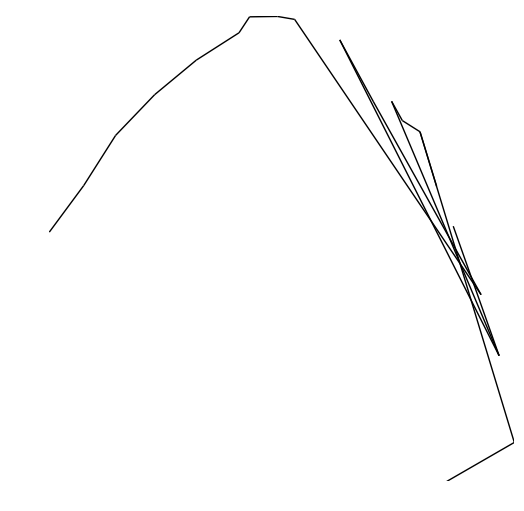

    After 20 iterations
        Discriminator Loss                         = -0.283428549767

    Generator_Loss: -0.979327261448
351
    After 20 iterations
        Discriminator Loss                         = -0.342983514071

    Generator_Loss: -0.998839437962
352
    After 20 iterations
        Discriminator Loss                         = -0.334609419107

    Generator_Loss: -1.0291697979
353
    After 20 iterations
        Discriminator Loss                         = -0.238948568702

    Generator_Loss: -0.941128730774
354
    After 20 iterations
        Discriminator Loss                         = -0.269748330116

    Generator_Loss: -1.00790524483
355
    After 20 iterations
        Discriminator Loss                         = -0.3427760005

    Generator_Loss: -0.99022269249
356
    After 20 iterations
        Discriminator Loss                         = -0.303259372711

    Generator_Loss: -1.06114089489
357
    After 20 iterations
        Discriminator Loss                   

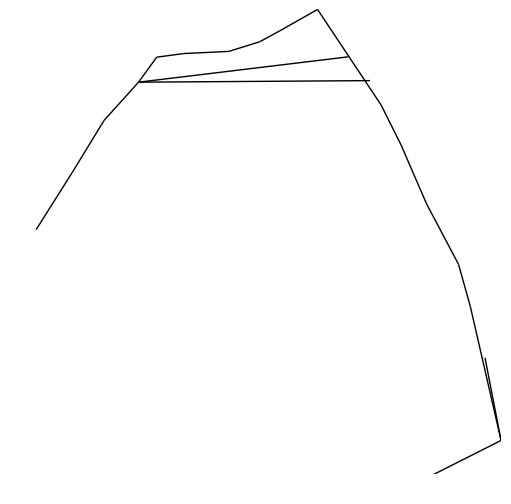

    After 20 iterations
        Discriminator Loss                         = -0.280754327774

    Generator_Loss: -0.376736611128
376
    After 20 iterations
        Discriminator Loss                         = -0.338319599628

    Generator_Loss: -0.247248709202
377
    After 20 iterations
        Discriminator Loss                         = -0.478170603514

    Generator_Loss: -0.106367498636
378
    After 20 iterations
        Discriminator Loss                         = -0.174516201019

    Generator_Loss: -0.10386557132
379
    After 20 iterations
        Discriminator Loss                         = -0.315759897232

    Generator_Loss: 0.08125898242
380
    After 20 iterations
        Discriminator Loss                         = -0.266179740429

    Generator_Loss: 0.180488035083
381
    After 20 iterations
        Discriminator Loss                         = -0.144186913967

    Generator_Loss: 0.139509767294
382
    After 20 iterations
        Discriminator Loss                 

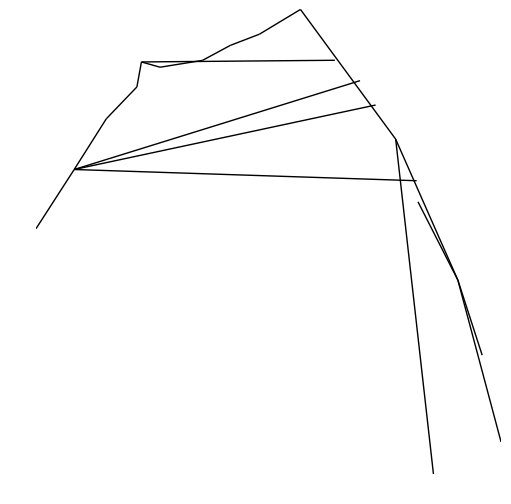

    After 20 iterations
        Discriminator Loss                         = -0.47803914547

    Generator_Loss: 0.186616644263
401
    After 20 iterations
        Discriminator Loss                         = -0.272419244051

    Generator_Loss: 0.0930026099086
402
    After 20 iterations
        Discriminator Loss                         = -0.43050122261

    Generator_Loss: 0.177461579442
403
    After 20 iterations
        Discriminator Loss                         = -0.0783311501145

    Generator_Loss: 0.078691534698
404
    After 20 iterations
        Discriminator Loss                         = -0.277265667915

    Generator_Loss: 0.127665370703
405
    After 20 iterations
        Discriminator Loss                         = -0.252383410931

    Generator_Loss: 0.143449023366
406
    After 20 iterations
        Discriminator Loss                         = -0.28002306819

    Generator_Loss: 0.0986803248525
407
    After 20 iterations
        Discriminator Loss                   

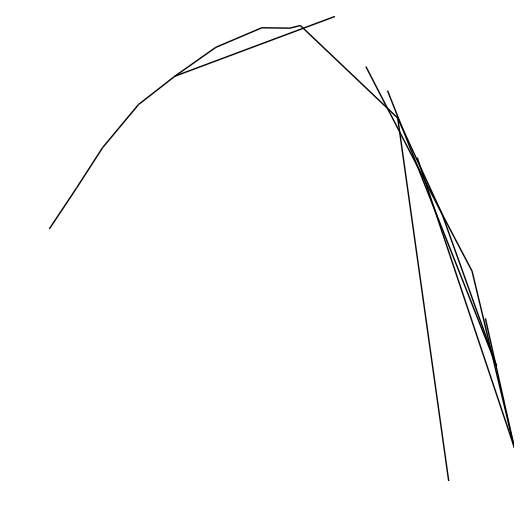

    After 20 iterations
        Discriminator Loss                         = -0.647749722004

    Generator_Loss: 1.70254695415
426
    After 20 iterations
        Discriminator Loss                         = -0.202587902546

    Generator_Loss: 1.7516784668
427
    After 20 iterations
        Discriminator Loss                         = 0.205640912056

    Generator_Loss: 1.70458865166
428
    After 20 iterations
        Discriminator Loss                         = -0.0395745784044

    Generator_Loss: 1.69741427898
429
    After 20 iterations
        Discriminator Loss                         = -0.399888902903

    Generator_Loss: 1.73943674564
430
    After 20 iterations
        Discriminator Loss                         = -0.142812803388

    Generator_Loss: 1.72019255161
431
    After 20 iterations
        Discriminator Loss                         = -0.20478245616

    Generator_Loss: 1.6850720644
432
    After 20 iterations
        Discriminator Loss                         = -0

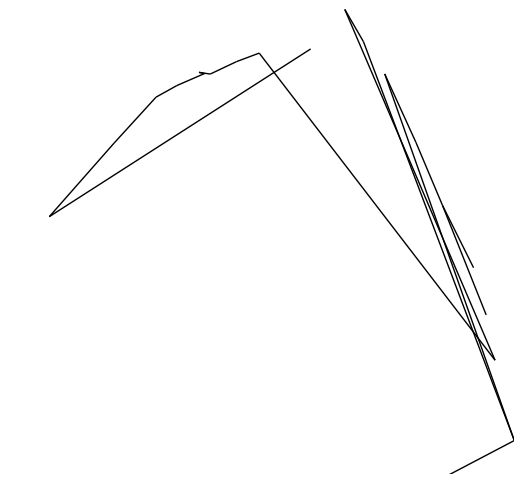

    After 20 iterations
        Discriminator Loss                         = -0.382815718651

    Generator_Loss: -0.599713027477
451
    After 20 iterations
        Discriminator Loss                         = -0.308957755566

    Generator_Loss: -0.679879665375
452
    After 20 iterations
        Discriminator Loss                         = -0.237729549408

    Generator_Loss: -0.725855827332
453
    After 20 iterations
        Discriminator Loss                         = -0.286485612392

    Generator_Loss: -0.695960462093
454
    After 20 iterations
        Discriminator Loss                         = -0.129175111651

    Generator_Loss: -0.762271642685
455
    After 20 iterations
        Discriminator Loss                         = -0.0172526761889

    Generator_Loss: -0.669797003269
456
    After 20 iterations
        Discriminator Loss                         = -0.263810425997

    Generator_Loss: -0.781780958176
457
    After 20 iterations
        Discriminator Loss           

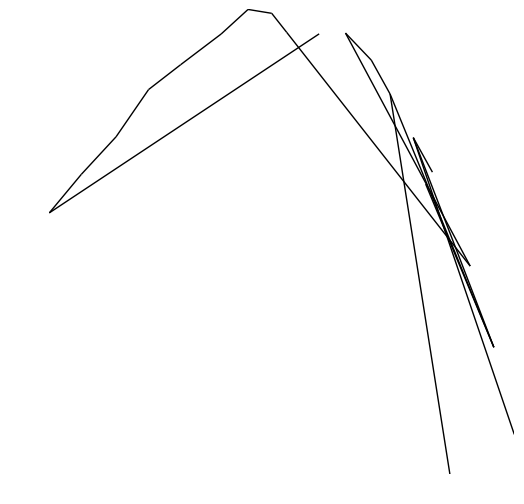

    After 20 iterations
        Discriminator Loss                         = -0.149747759104

    Generator_Loss: -1.95964682102
476
    After 20 iterations
        Discriminator Loss                         = -0.216281652451

    Generator_Loss: -1.92360401154
477
    After 20 iterations
        Discriminator Loss                         = -0.356563150883

    Generator_Loss: -1.94378364086
478
    After 20 iterations
        Discriminator Loss                         = -0.340163975954

    Generator_Loss: -1.95138978958
479
    After 20 iterations
        Discriminator Loss                         = -0.352510154247

    Generator_Loss: -2.00918221474
480
    After 20 iterations
        Discriminator Loss                         = -0.264369517565

    Generator_Loss: -1.97932338715
481
    After 20 iterations
        Discriminator Loss                         = -0.412769436836

    Generator_Loss: -1.91860258579
482
    After 20 iterations
        Discriminator Loss                   

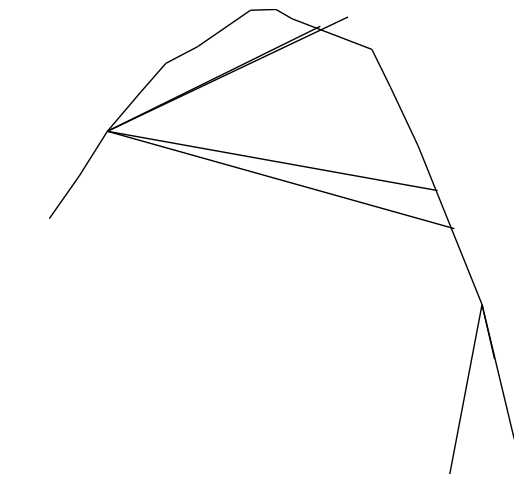

    After 20 iterations
        Discriminator Loss                         = -0.227672725916

    Generator_Loss: -1.70186567307
501
    After 20 iterations
        Discriminator Loss                         = -0.30354642868

    Generator_Loss: -1.67361569405
502
    After 20 iterations
        Discriminator Loss                         = -0.190351679921

    Generator_Loss: -1.67573666573
503
    After 20 iterations
        Discriminator Loss                         = -0.154551759362

    Generator_Loss: -1.68218624592
504
    After 20 iterations
        Discriminator Loss                         = -0.29704734683

    Generator_Loss: -1.63405883312
505
    After 20 iterations
        Discriminator Loss                         = -0.12037473917

    Generator_Loss: -1.62140750885
506
    After 20 iterations
        Discriminator Loss                         = -0.175695613027

    Generator_Loss: -1.69794559479
507
    After 20 iterations
        Discriminator Loss                      

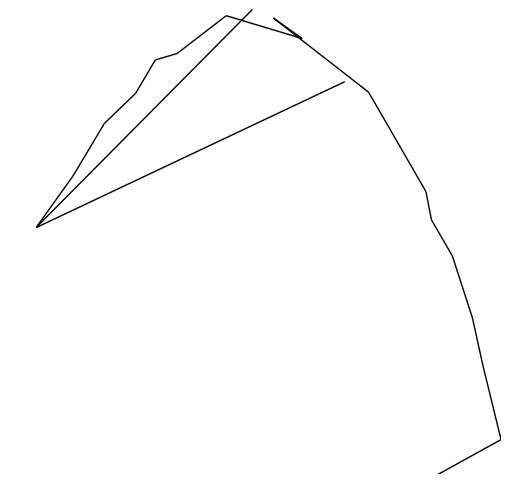

    After 20 iterations
        Discriminator Loss                         = -0.171246781945

    Generator_Loss: -1.09895217419
526
    After 20 iterations
        Discriminator Loss                         = -0.150126934052

    Generator_Loss: -1.13992702961
527
    After 20 iterations
        Discriminator Loss                         = -0.268575578928

    Generator_Loss: -1.10108244419
528
    After 20 iterations
        Discriminator Loss                         = -0.232197269797

    Generator_Loss: -1.15367269516
529
    After 20 iterations
        Discriminator Loss                         = -0.30844694376

    Generator_Loss: -1.07000529766
530
    After 20 iterations
        Discriminator Loss                         = -0.232130363584

    Generator_Loss: -1.11300551891
531
    After 20 iterations
        Discriminator Loss                         = -0.326808333397

    Generator_Loss: -1.0837187767
532
    After 20 iterations
        Discriminator Loss                     

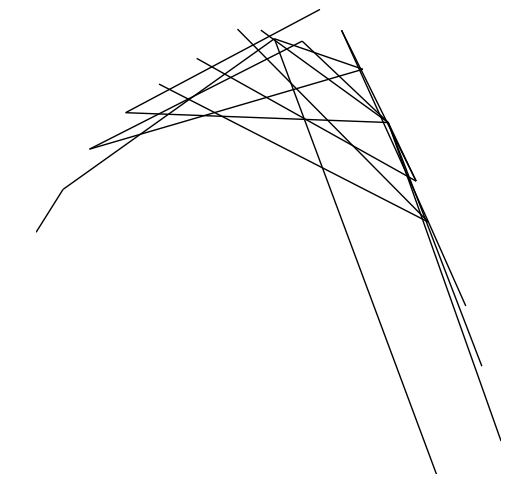

    After 20 iterations
        Discriminator Loss                         = -0.231787517667

    Generator_Loss: -0.520847558975
551
    After 20 iterations
        Discriminator Loss                         = -0.38186866045

    Generator_Loss: -0.367829322815
552
    After 20 iterations
        Discriminator Loss                         = -0.334413647652

    Generator_Loss: -0.125381827354
553
    After 20 iterations
        Discriminator Loss                         = -0.298636853695

    Generator_Loss: -0.0465923286974
554
    After 20 iterations
        Discriminator Loss                         = -0.499305486679

    Generator_Loss: 0.139846548438
555
    After 20 iterations
        Discriminator Loss                         = -0.134823158383

    Generator_Loss: 0.0277221482247
556
    After 20 iterations
        Discriminator Loss                         = -0.333415031433

    Generator_Loss: 0.0674643144011
557
    After 20 iterations
        Discriminator Loss             

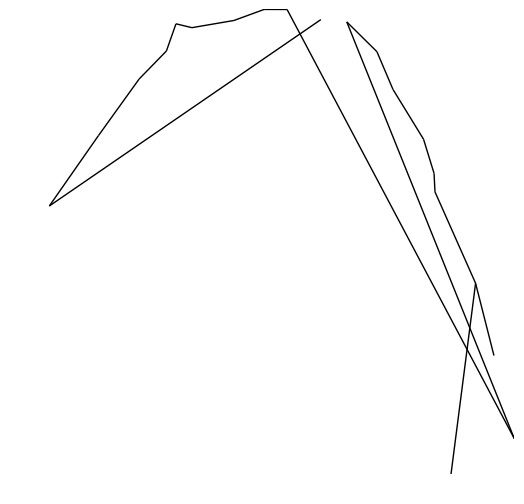

    After 20 iterations
        Discriminator Loss                         = -0.262649863958

    Generator_Loss: -0.128948330879
576
    After 20 iterations
        Discriminator Loss                         = -0.392106980085

    Generator_Loss: -0.0267238803208
577
    After 20 iterations
        Discriminator Loss                         = -0.419816672802

    Generator_Loss: 0.0178083740175
578
    After 20 iterations
        Discriminator Loss                         = -0.114390522242

    Generator_Loss: 0.0426912866533
579
    After 20 iterations
        Discriminator Loss                         = -0.331352293491

    Generator_Loss: 0.0850279927254
580
    After 20 iterations
        Discriminator Loss                         = -0.158133327961

    Generator_Loss: 0.0828082039952
581
    After 20 iterations
        Discriminator Loss                         = -0.295441806316

    Generator_Loss: 0.103713154793
582
    After 20 iterations
        Discriminator Loss            

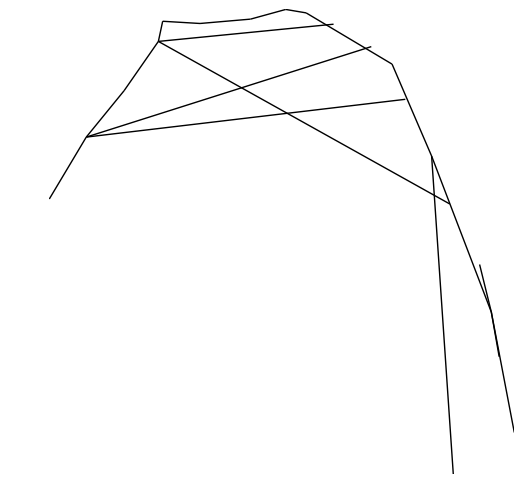

    After 20 iterations
        Discriminator Loss                         = -0.3220243752

    Generator_Loss: 0.498559325933
601
    After 20 iterations
        Discriminator Loss                         = -0.287943959236

    Generator_Loss: 0.439239442348
602
    After 20 iterations
        Discriminator Loss                         = -0.279008805752

    Generator_Loss: 0.272429347038
603
    After 20 iterations
        Discriminator Loss                         = -0.197255820036

    Generator_Loss: 0.136867046356
604
    After 20 iterations
        Discriminator Loss                         = -0.283467799425

    Generator_Loss: -0.0128004103899
605
    After 20 iterations
        Discriminator Loss                         = -0.306515157223

    Generator_Loss: -0.0778778791428
606
    After 20 iterations
        Discriminator Loss                         = -0.357015788555

    Generator_Loss: -0.10241445154
607
    After 20 iterations
        Discriminator Loss                 

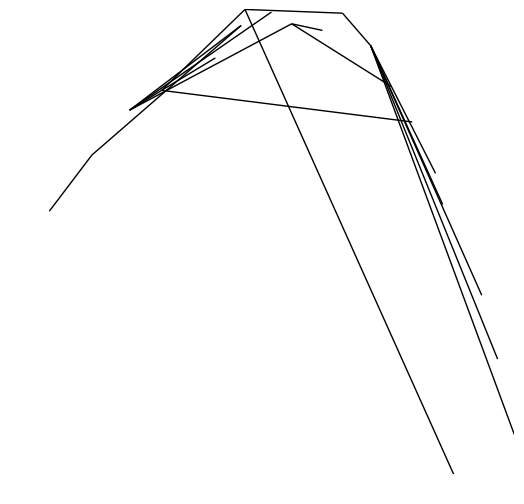

    After 20 iterations
        Discriminator Loss                         = -0.0850655063987

    Generator_Loss: 0.0840543136001
626
    After 20 iterations
        Discriminator Loss                         = -0.239270791411

    Generator_Loss: 0.0755727663636
627
    After 20 iterations
        Discriminator Loss                         = -0.138767376542

    Generator_Loss: -0.013058478944
628
    After 20 iterations
        Discriminator Loss                         = -0.111667200923

    Generator_Loss: -0.15299834311
629
    After 20 iterations
        Discriminator Loss                         = -0.0967908576131

    Generator_Loss: -0.194840118289
630
    After 20 iterations
        Discriminator Loss                         = -0.161809176207

    Generator_Loss: -0.405400812626
631
    After 20 iterations
        Discriminator Loss                         = -0.218318015337

    Generator_Loss: -0.431970179081
632
    After 20 iterations
        Discriminator Loss           

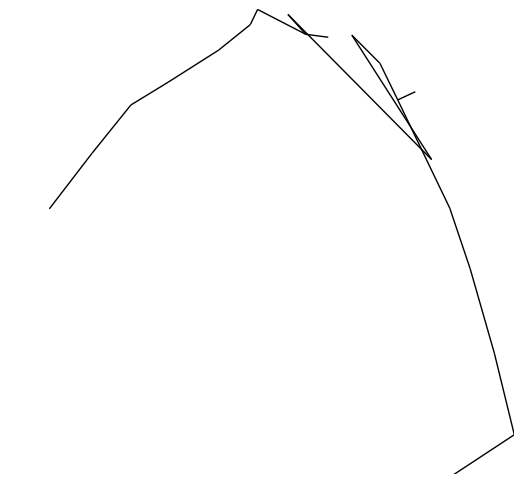

    After 20 iterations
        Discriminator Loss                         = -0.0768356323242

    Generator_Loss: -1.23338055611
651
    After 20 iterations
        Discriminator Loss                         = -0.119167022407

    Generator_Loss: -1.21682453156
652
    After 20 iterations
        Discriminator Loss                         = -0.204467400908

    Generator_Loss: -1.13122355938
653
    After 20 iterations
        Discriminator Loss                         = -0.183816790581

    Generator_Loss: -1.1569672823
654
    After 20 iterations
        Discriminator Loss                         = -0.326884508133

    Generator_Loss: -1.04063045979
655
    After 20 iterations
        Discriminator Loss                         = -0.270361453295

    Generator_Loss: -1.0585180521
656
    After 20 iterations
        Discriminator Loss                         = -0.163957595825

    Generator_Loss: -1.01282322407
657
    After 20 iterations
        Discriminator Loss                    

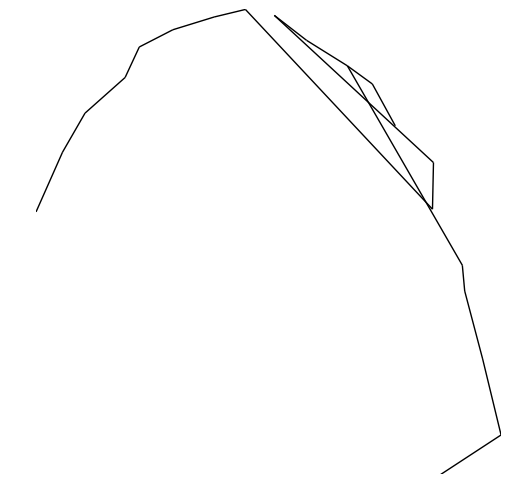

    After 20 iterations
        Discriminator Loss                         = -0.189371302724

    Generator_Loss: -1.5631955862
676
    After 20 iterations
        Discriminator Loss                         = -0.261114835739

    Generator_Loss: -1.54502987862
677
    After 20 iterations
        Discriminator Loss                         = -0.20025369525

    Generator_Loss: -1.48327600956
678
    After 20 iterations
        Discriminator Loss                         = -0.229379236698

    Generator_Loss: -1.30418181419
679
    After 20 iterations
        Discriminator Loss                         = -0.21985976398

    Generator_Loss: -1.28015732765
680
    After 20 iterations
        Discriminator Loss                         = -0.131506487727

    Generator_Loss: -1.31397938728
681
    After 20 iterations
        Discriminator Loss                         = -0.217168793082

    Generator_Loss: -1.32552587986
682
    After 20 iterations
        Discriminator Loss                      

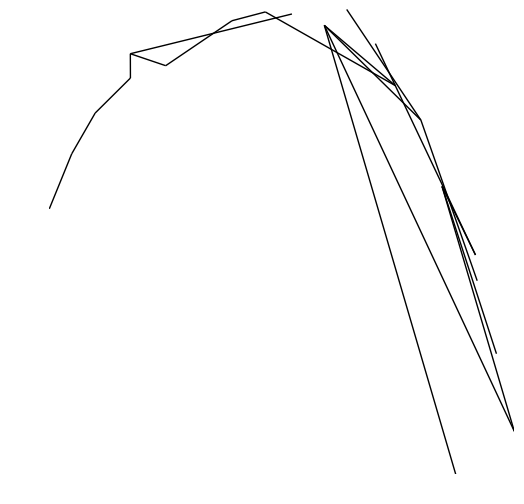

    After 20 iterations
        Discriminator Loss                         = -0.280593544245

    Generator_Loss: -1.2438750267
701
    After 20 iterations
        Discriminator Loss                         = -0.259206026793

    Generator_Loss: -1.22702300549
702
    After 20 iterations
        Discriminator Loss                         = -0.180185198784

    Generator_Loss: -1.21962463856
703
    After 20 iterations
        Discriminator Loss                         = -0.190640896559

    Generator_Loss: -1.20288646221
704
    After 20 iterations
        Discriminator Loss                         = -0.304991334677

    Generator_Loss: -1.1337634325
705
    After 20 iterations
        Discriminator Loss                         = -0.183835908771

    Generator_Loss: -1.04435956478
706
    After 20 iterations
        Discriminator Loss                         = -0.137606546283

    Generator_Loss: -1.11623156071
707
    After 20 iterations
        Discriminator Loss                     

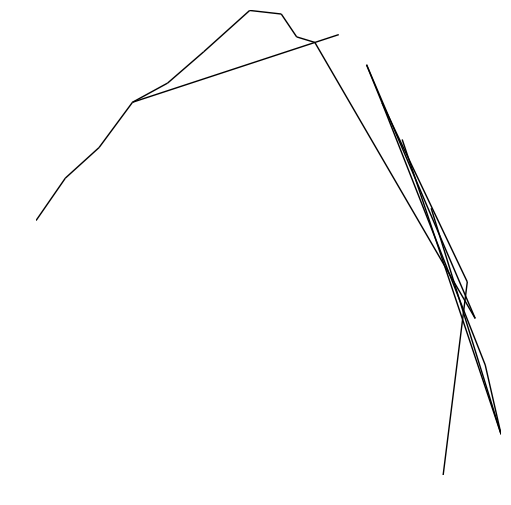

    After 20 iterations
        Discriminator Loss                         = -0.296412825584

    Generator_Loss: 0.138300538063
726
    After 20 iterations
        Discriminator Loss                         = -0.315333306789

    Generator_Loss: 0.162615865469
727
    After 20 iterations
        Discriminator Loss                         = -0.294042468071

    Generator_Loss: 0.178398787975
728
    After 20 iterations
        Discriminator Loss                         = -0.231254652143

    Generator_Loss: 0.147185996175
729
    After 20 iterations
        Discriminator Loss                         = -0.211324453354

    Generator_Loss: 0.180839896202
730
    After 20 iterations
        Discriminator Loss                         = -0.291675031185

    Generator_Loss: 0.0952534154058
731
    After 20 iterations
        Discriminator Loss                         = -0.183948159218

    Generator_Loss: 0.0336818322539
732
    After 20 iterations
        Discriminator Loss                 

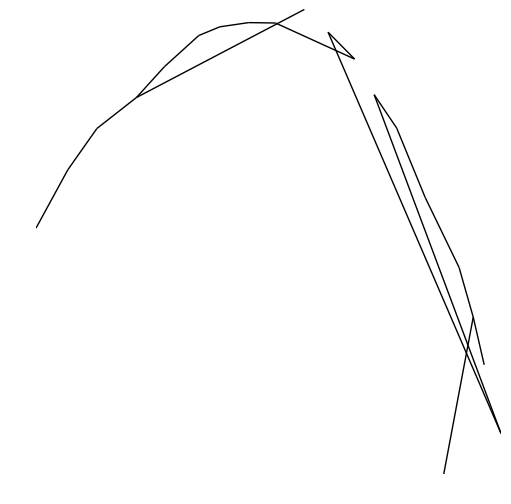

    After 20 iterations
        Discriminator Loss                         = -0.00667333835736

    Generator_Loss: -2.09874606133
751
    After 20 iterations
        Discriminator Loss                         = -0.0604965165257

    Generator_Loss: -2.15953397751
752
    After 20 iterations
        Discriminator Loss                         = -0.0586257576942

    Generator_Loss: -2.16525864601
753
    After 20 iterations
        Discriminator Loss                         = -0.0436065346003

    Generator_Loss: -2.21145653725
754
    After 20 iterations
        Discriminator Loss                         = 0.064113214612

    Generator_Loss: -2.12391424179
755
    After 20 iterations
        Discriminator Loss                         = -0.105238810182

    Generator_Loss: -2.03435587883
756
    After 20 iterations
        Discriminator Loss                         = -0.172228515148

    Generator_Loss: -2.02379584312
757
    After 20 iterations
        Discriminator Loss               

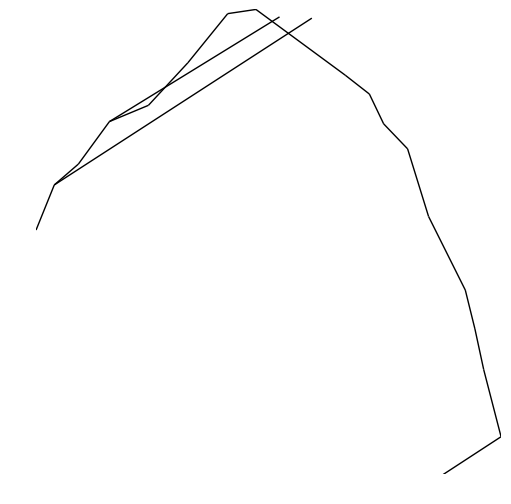

    After 20 iterations
        Discriminator Loss                         = -0.177663445473

    Generator_Loss: -1.12233376503
776
    After 20 iterations
        Discriminator Loss                         = -0.15196941793

    Generator_Loss: -1.15111517906
777
    After 20 iterations
        Discriminator Loss                         = -0.148736312985

    Generator_Loss: -1.16308522224
778
    After 20 iterations
        Discriminator Loss                         = 0.00198336923495

    Generator_Loss: -1.24736237526
779
    After 20 iterations
        Discriminator Loss                         = -0.175441890955

    Generator_Loss: -1.25315225124
780
    After 20 iterations
        Discriminator Loss                         = -0.195700258017

    Generator_Loss: -1.29868400097
781


In [6]:
geom_model, cond_geom_model, morph_model, cond_morph_model, disc_model, gan_model = \
    train.train_model(training_data=training_data,
                      n_levels=n_levels,
                      n_nodes=n_nodes,
                      input_dim=input_dim,
                      n_epochs=n_epochs,
                      batch_size=batch_size,
                      n_batch_per_epoch=n_batch_per_epoch,
                      d_iters=d_iters,
                      lr_discriminator=lr_discriminator,
                      lr_generator=lr_generator,
                      weight_constraint=weight_constraint,
                      verbose=True)

In [42]:
noise_code = np.random.randn(1,1,100)

if rule == 'gmd':
    locations_gen = geom_model[0].predict(noise_code)
    softmax_gen = np.squeeze(cond_morph_model[0].predict([noise_code, locations_gen]))
elif rule == 'mgd':
    softmax_gen = morph_model[0].predict(noise_code)
    locations_gen = cond_geom_model[0].predict([noise_code, softmax_gen])
    softmax_gen = np.squeeze(softmax_gen)

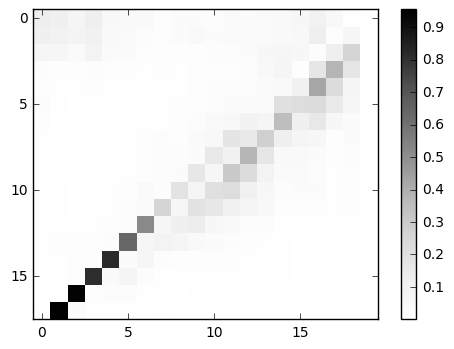

In [43]:
plt.imshow(softmax_gen, interpolation='none', cmap='Greys')
plt.colorbar()
plt.show()

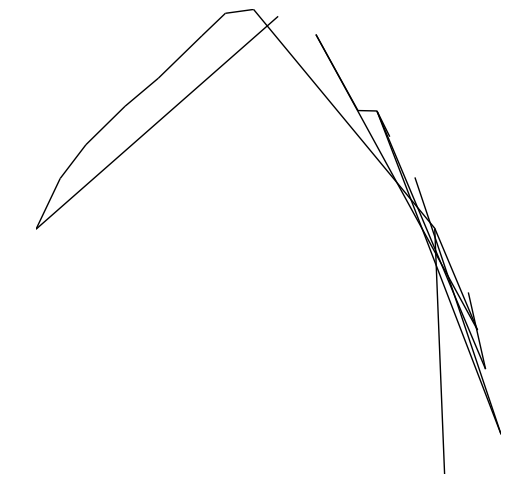

In [44]:
neuron_object = train.plot_example_neuron(locations_gen, softmax_gen)
neuron_object = McNeuron.Neuron(file_format='only list of nodes', input_file = neuron_object.nodes_list)

In [40]:
neuron_object.parent_index

array([ 0,  0,  1,  2,  3,  4,  5,  6,  0,  7,  9, 10, 11, 12, 13, 13, 15,
       13, 17,  9])

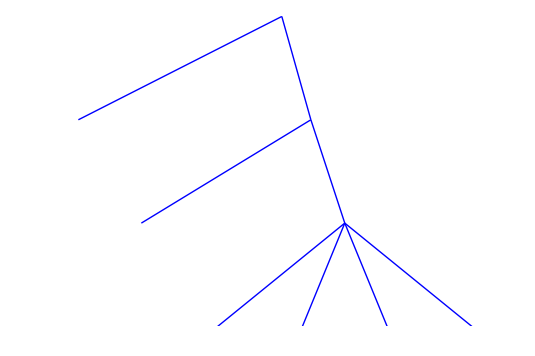

In [41]:
McNeuron.visualize.plot_dedrite_tree(neuron_object)

In [12]:
print np.max(training_data['geometry']['n20'][0, :, :]), np.min(training_data['geometry']['n20'][0, :, :])
print locations_gen.max(), locations_gen.min()

8.11007636228 -0.509370527919
6.41568 -2.51823


In [13]:
neuron_object = McNeuron.Neuron(file_format='only list of nodes', input_file = neuron_object.nodes_list)
neuron_object.fit()
features = neuron_object.features
features.keys()

['Nbranch',
 'discrepancy_space',
 'global_angle',
 'ratio_euclidian_neuronal',
 'initial_segments',
 'curvature',
 'distance_from_parent',
 'distance_from_root',
 'Nnodes',
 'neural_important',
 'local_angle',
 'euclidian_important',
 'branch_angle',
 'ratio_neural_euclidian_important',
 'branch_angle_segment']

In [14]:
import pprint as pp
pp.pprint(features['branch_angle_segment'])

array([ 1.73493006])


/Users/pavanramkumar/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


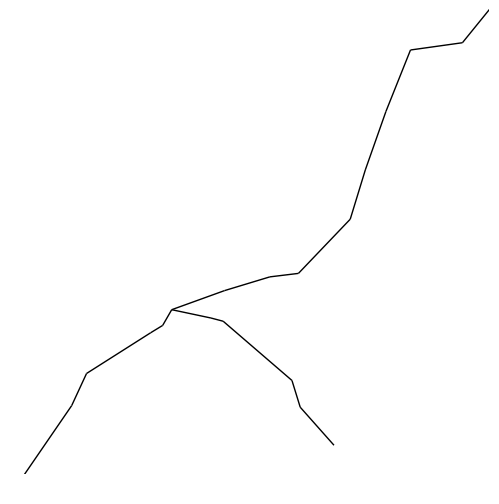

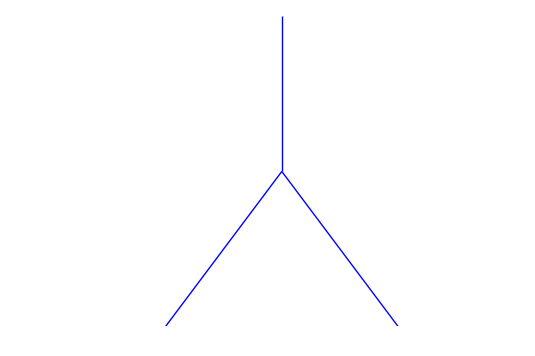

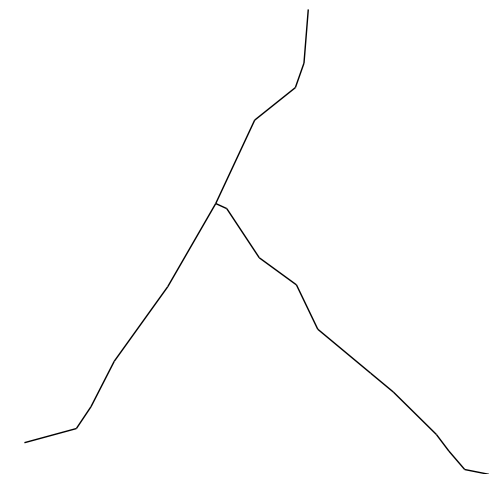

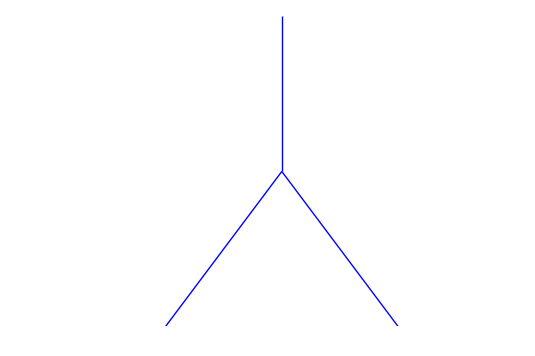

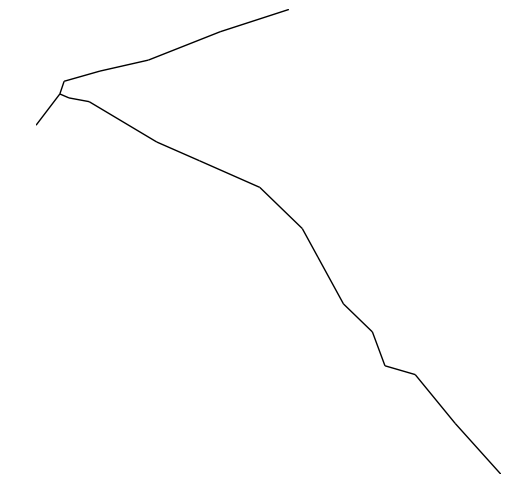

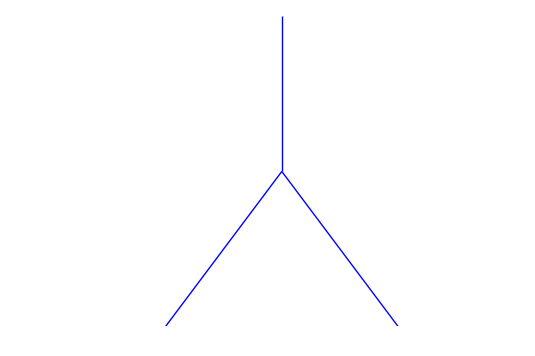

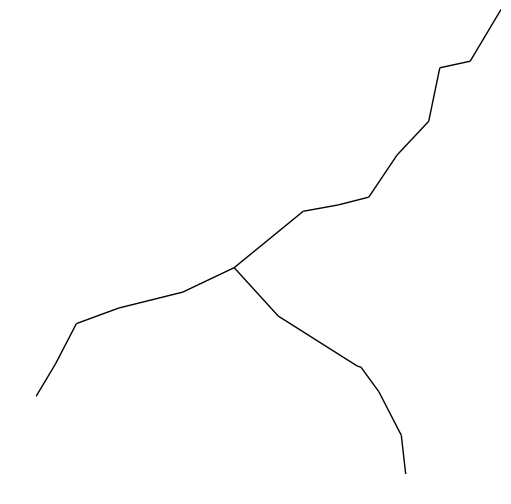

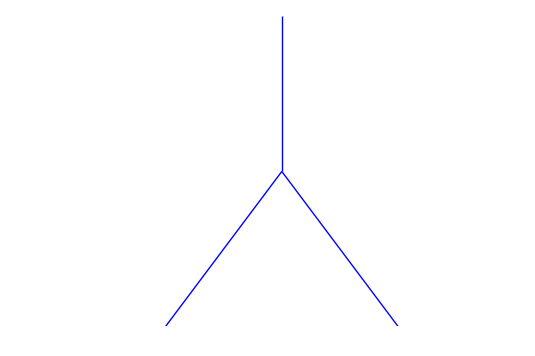

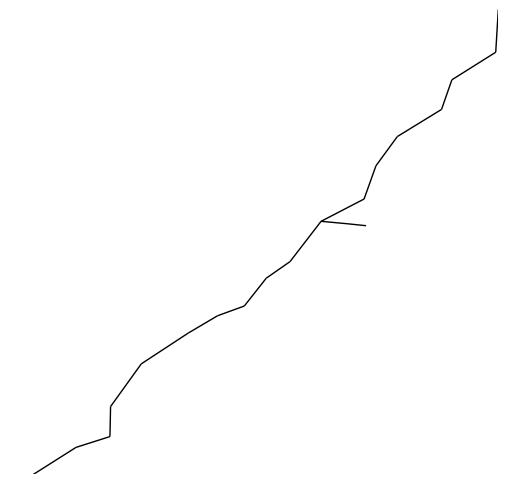

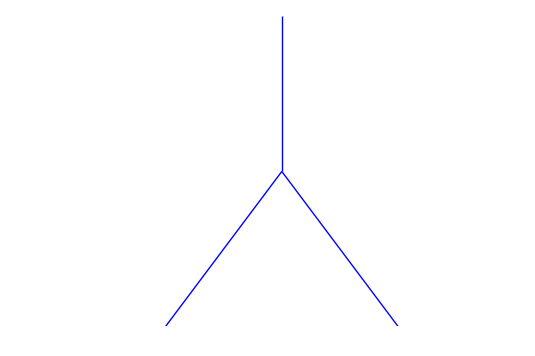

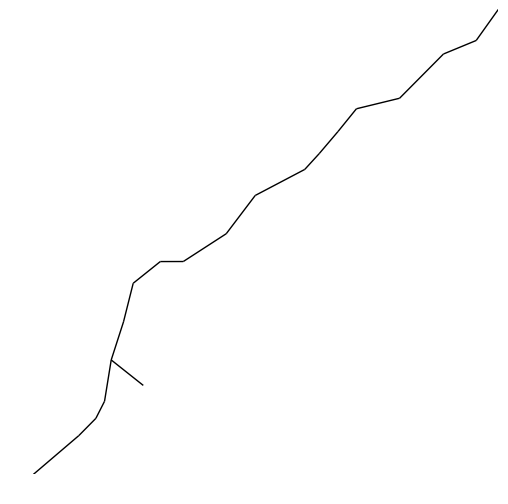

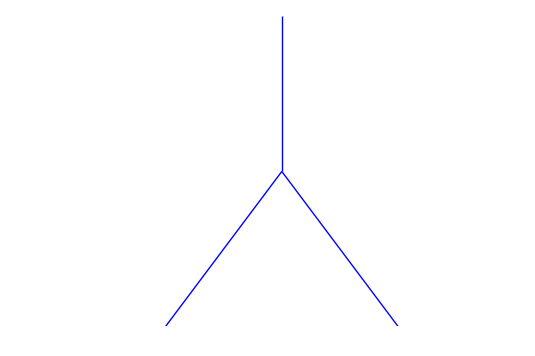

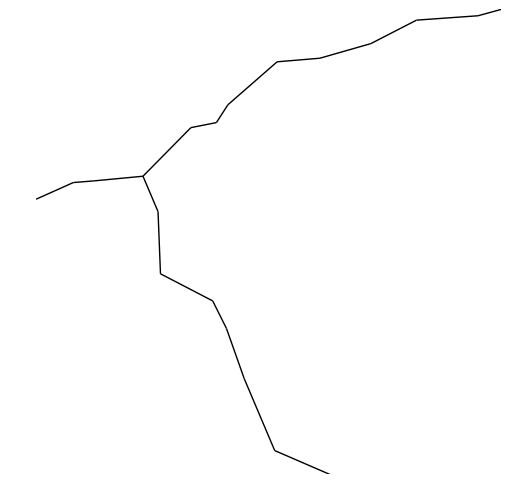

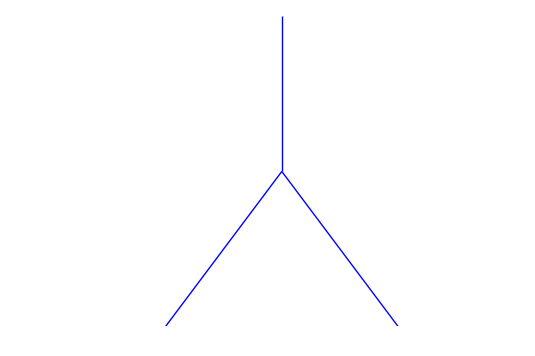

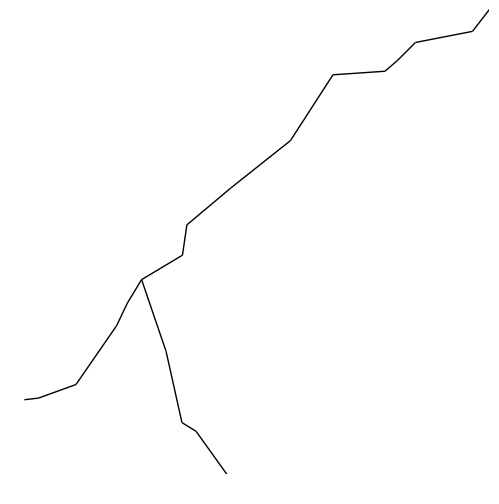

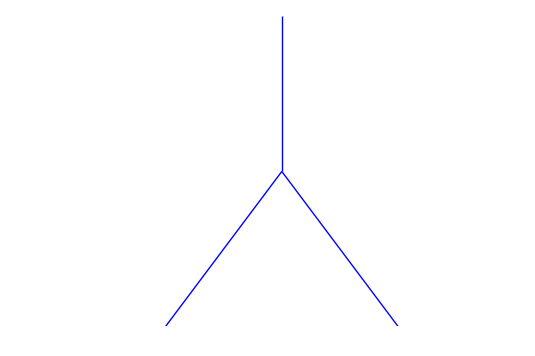

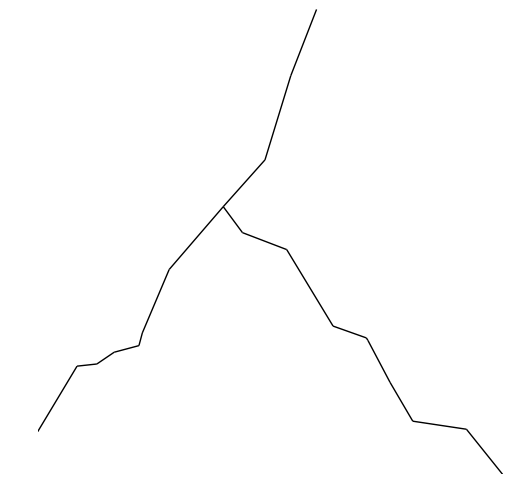

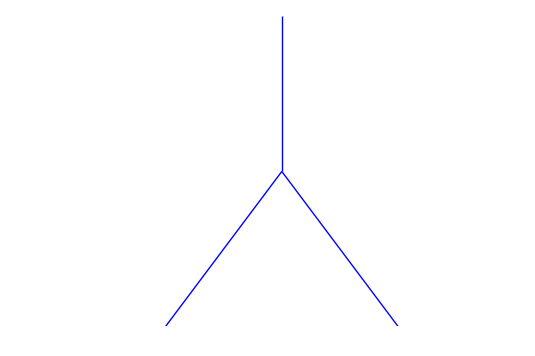

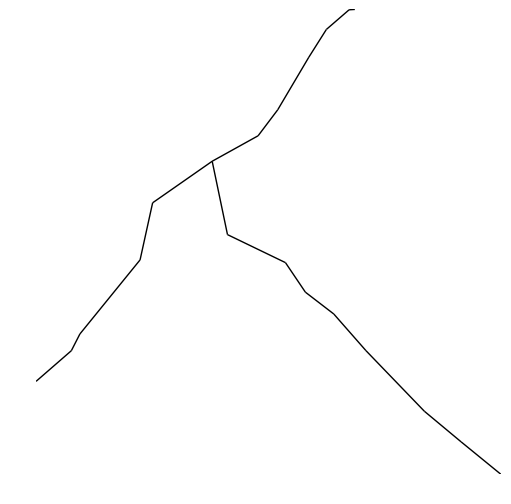

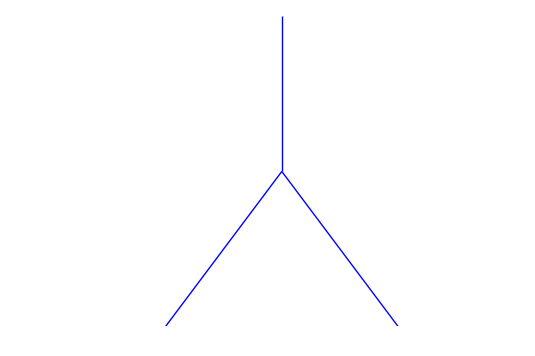

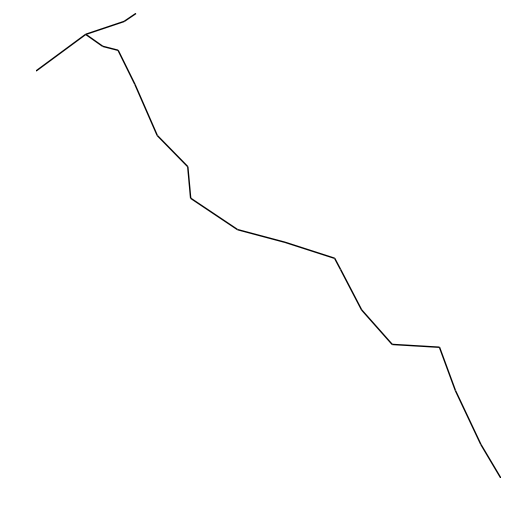

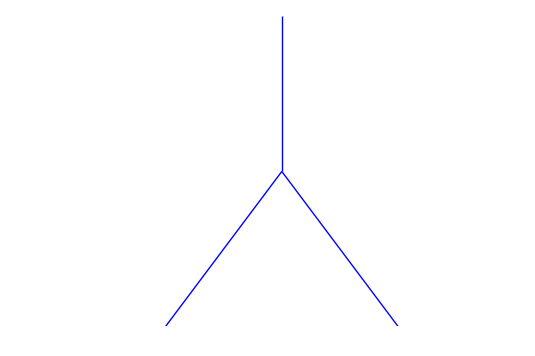

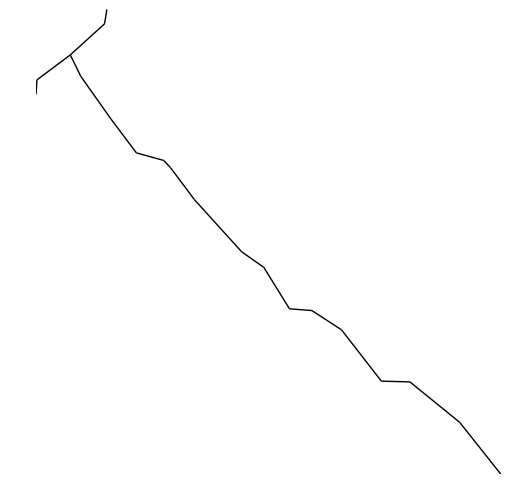

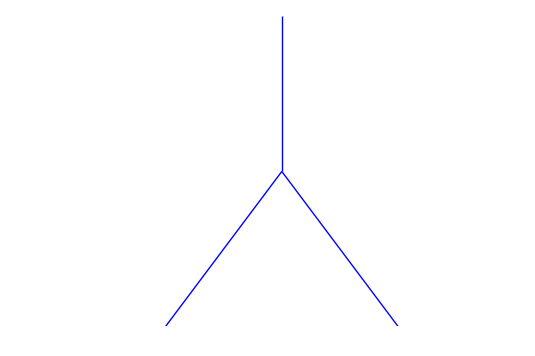

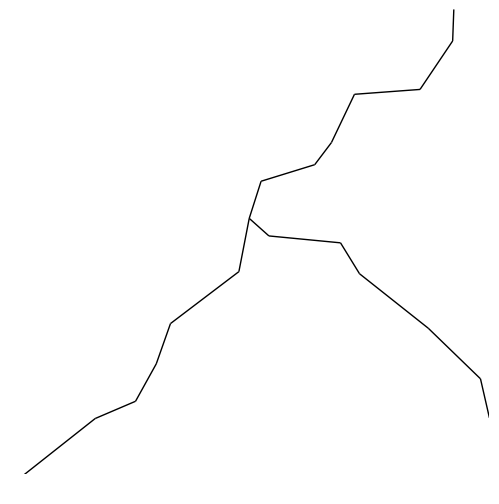

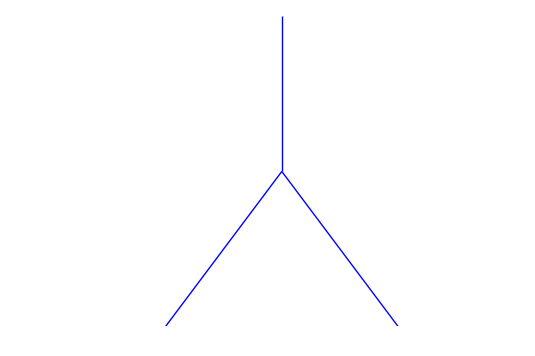

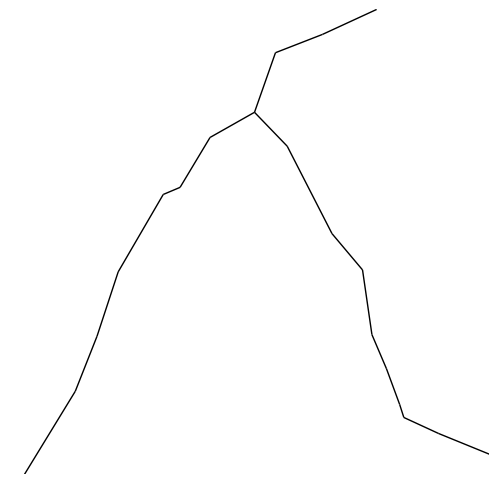

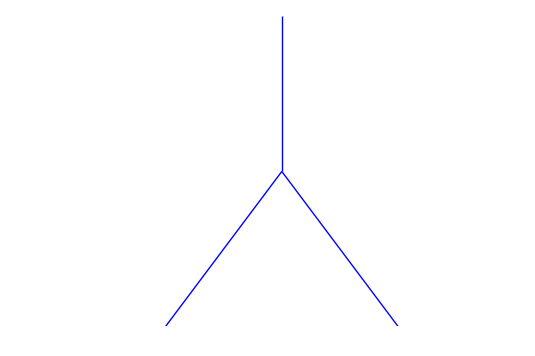

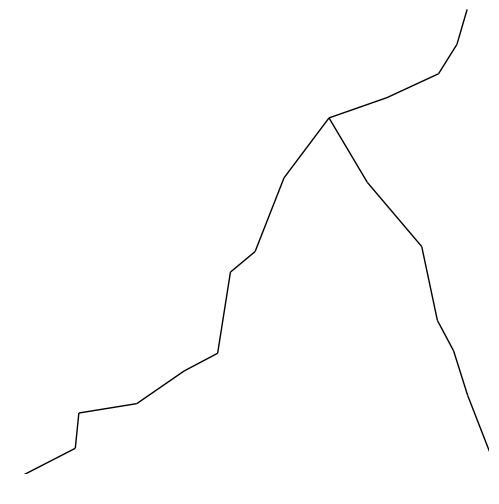

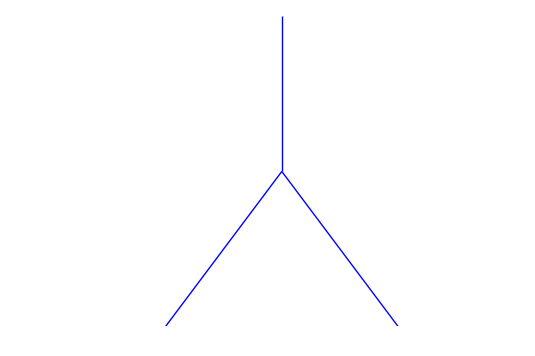

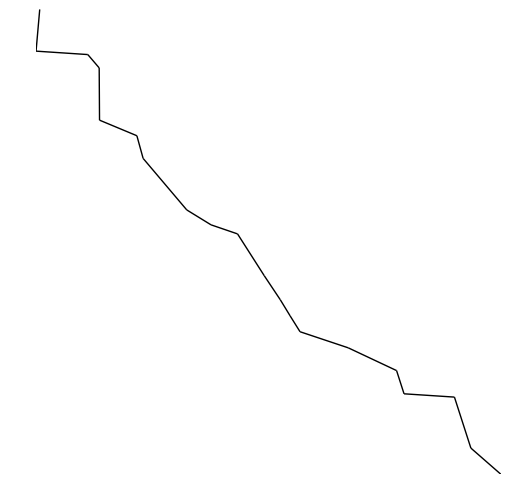

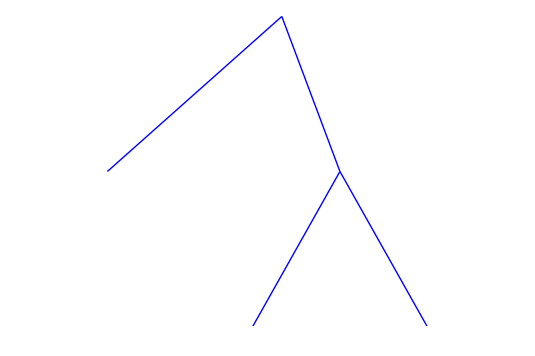

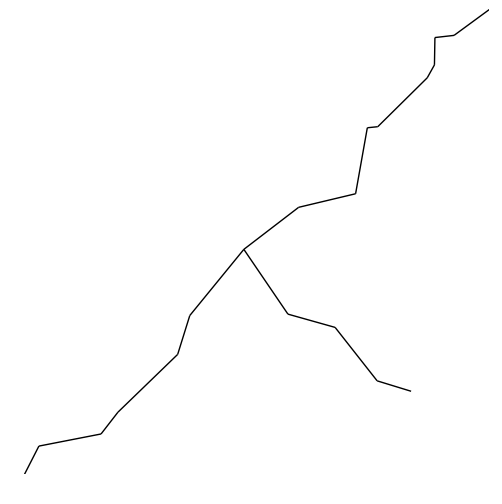

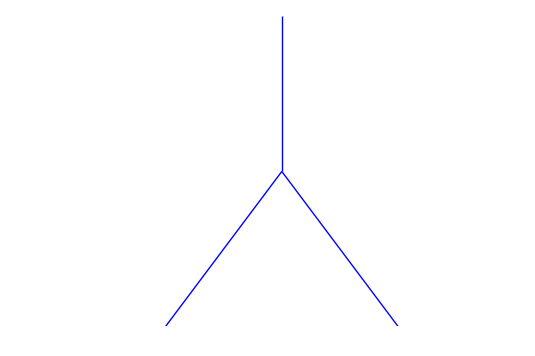

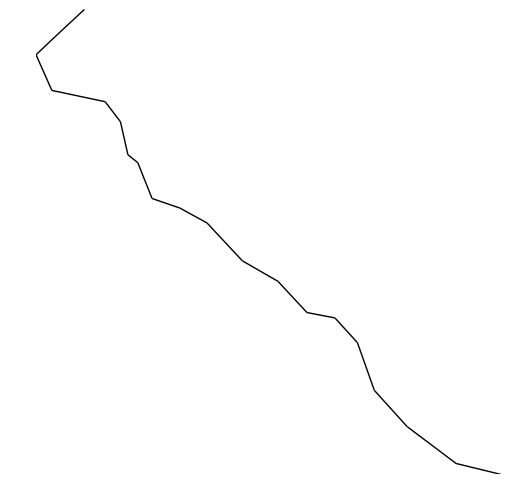

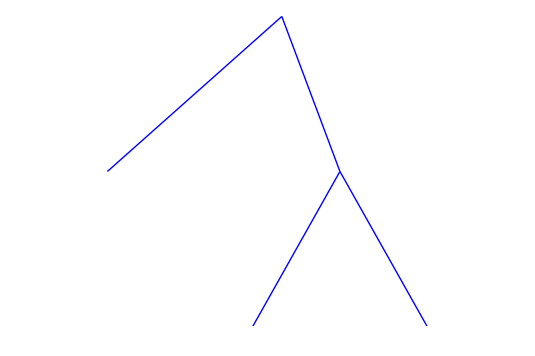

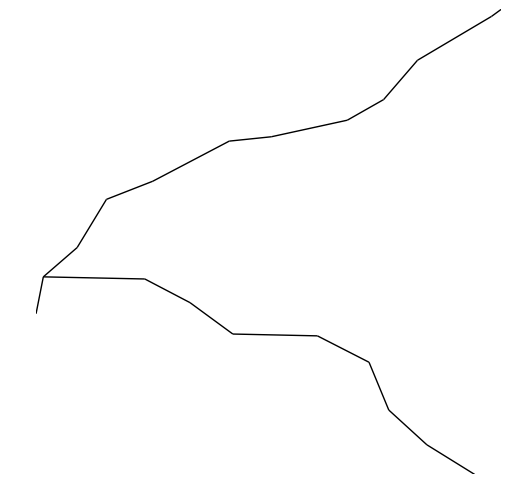

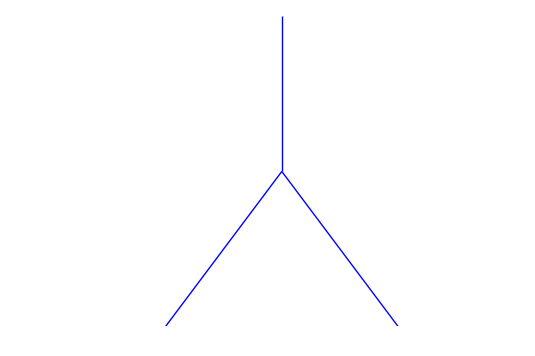

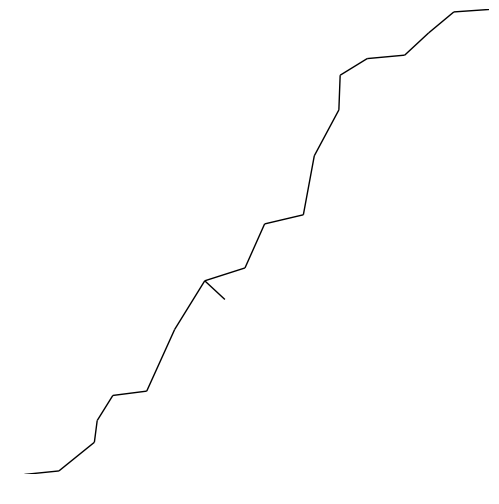

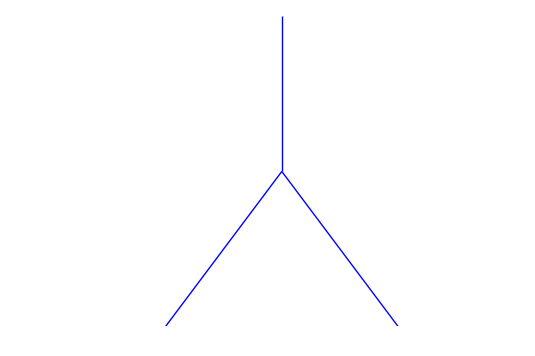

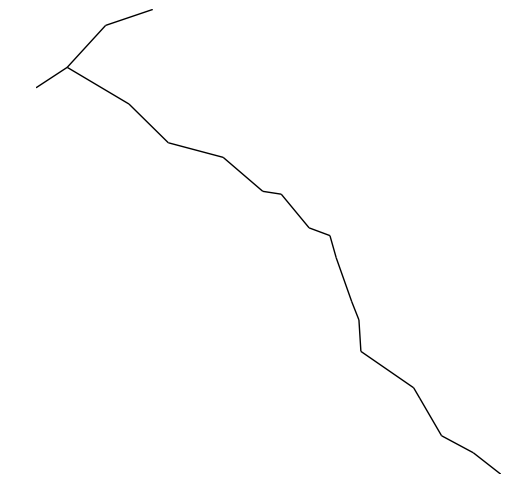

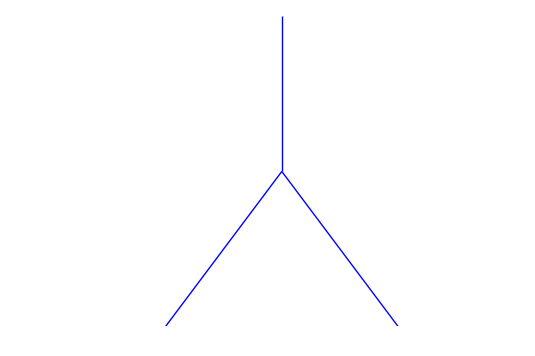

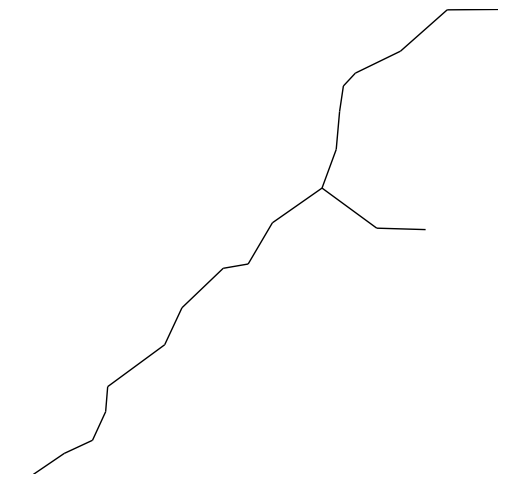

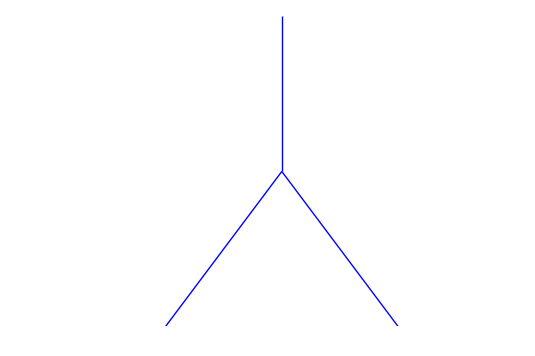

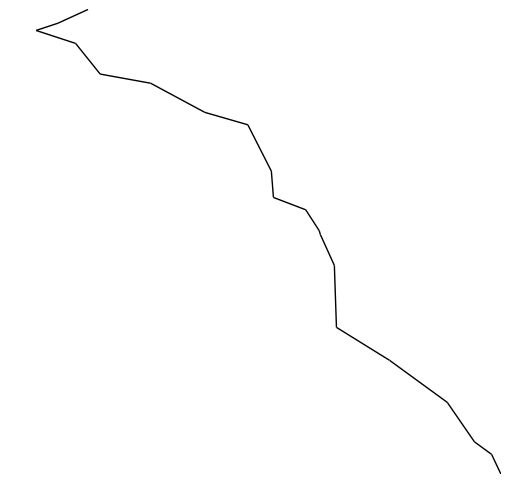

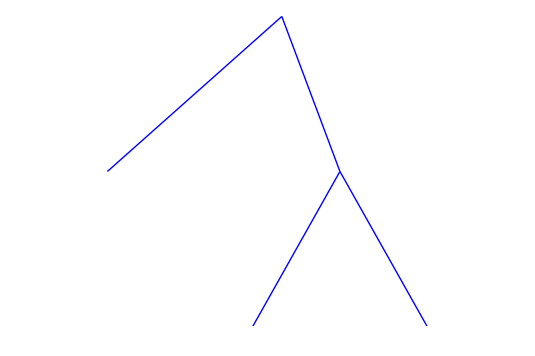

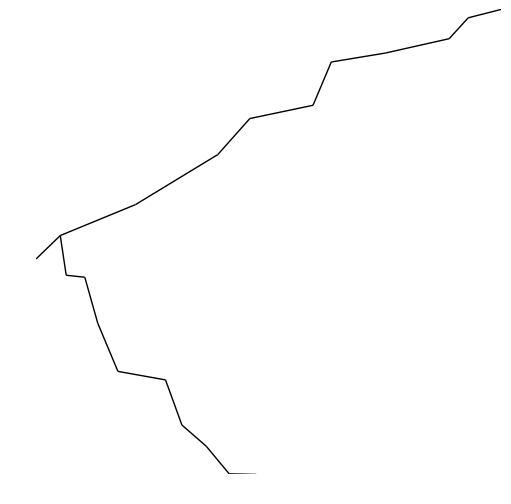

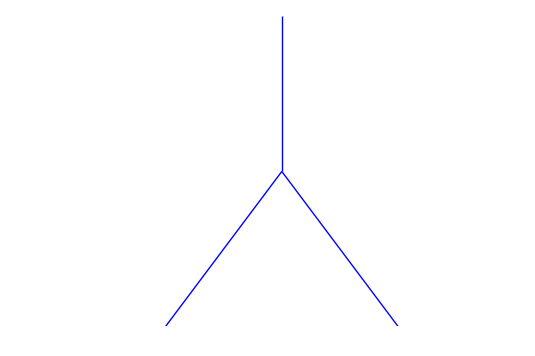

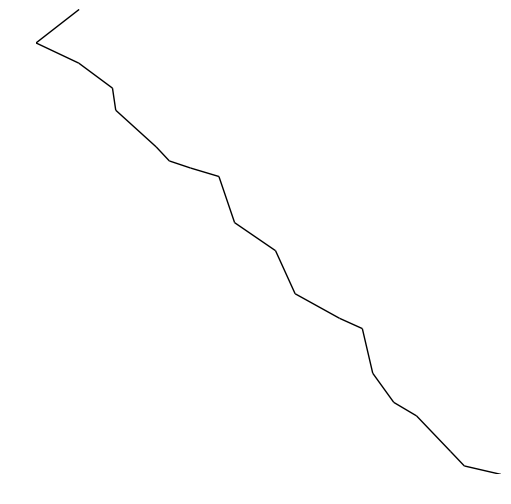

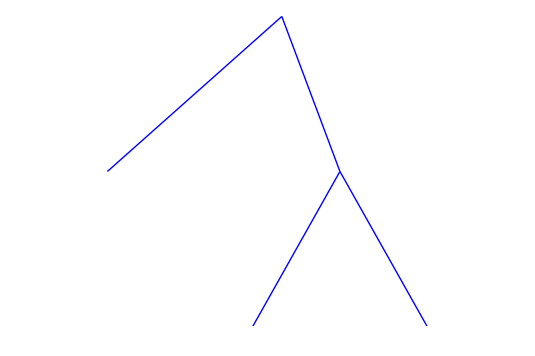

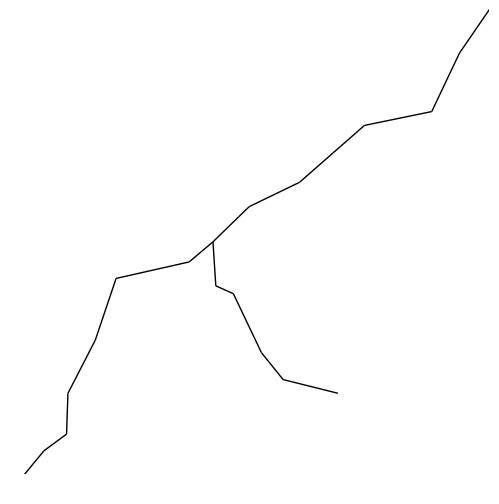

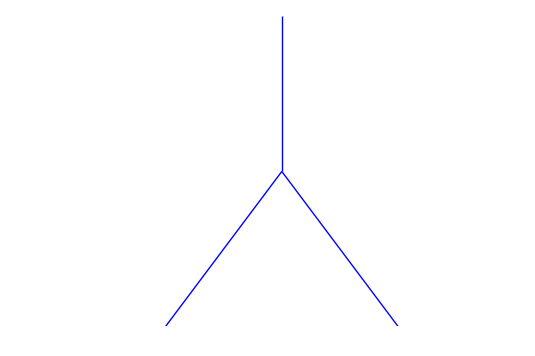

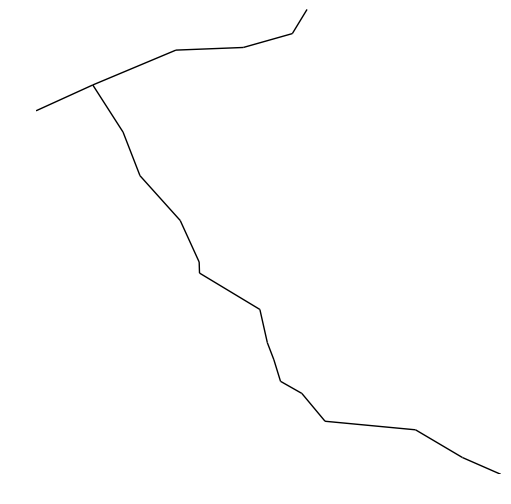

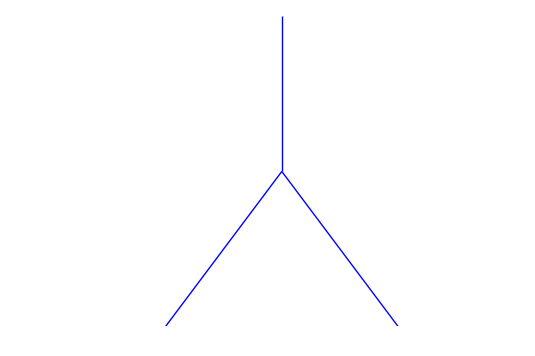

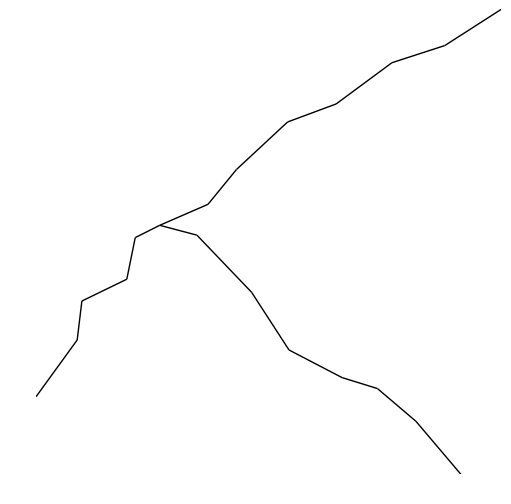

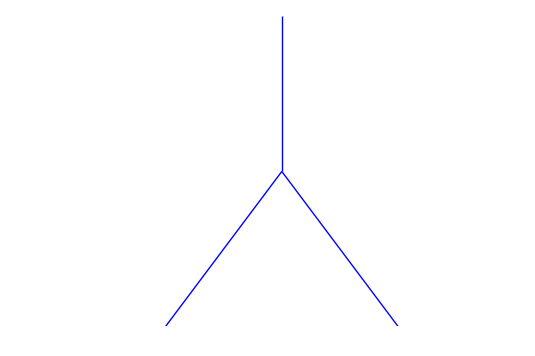

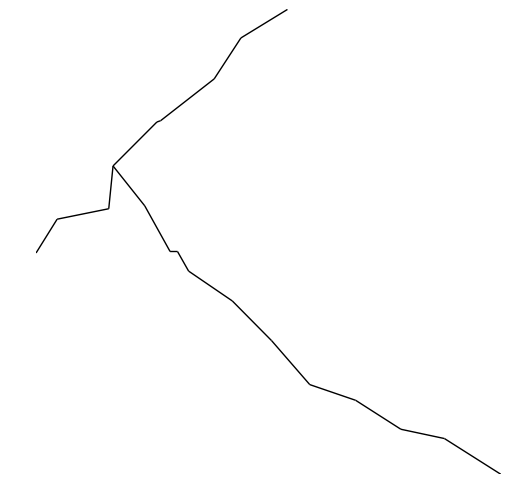

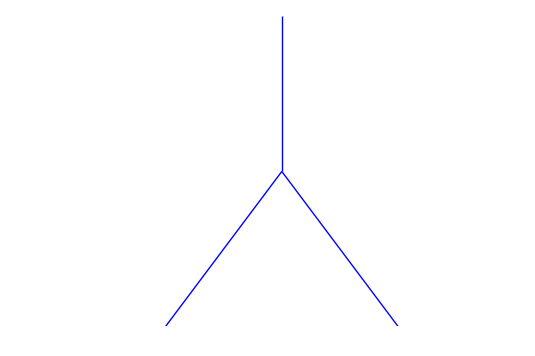

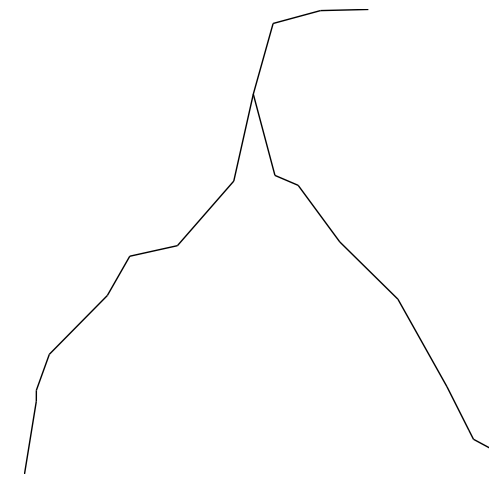

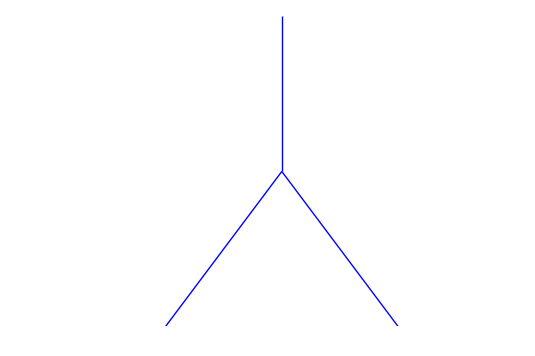

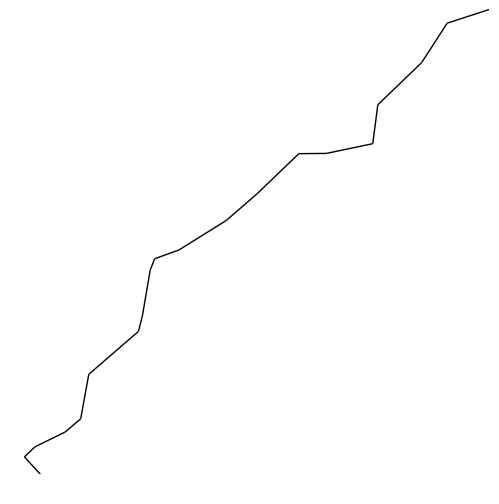

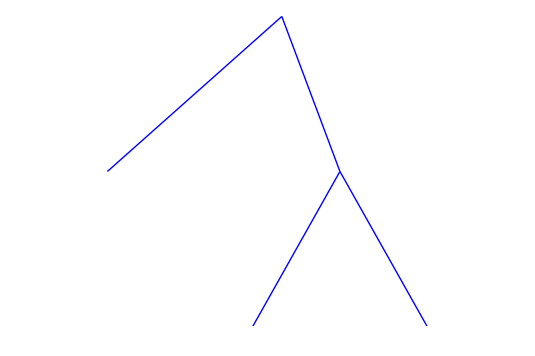

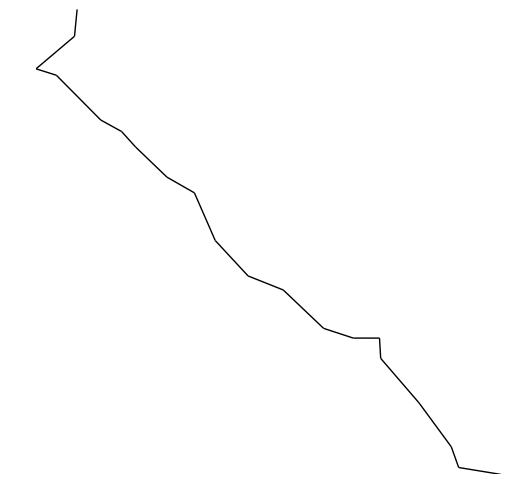

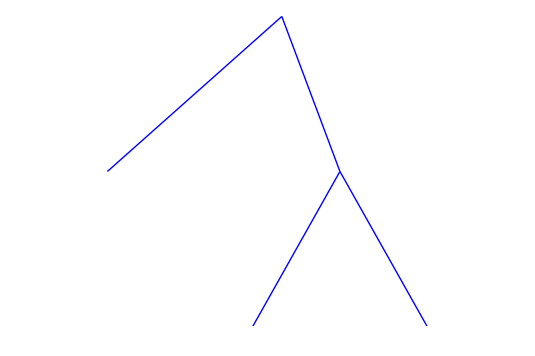

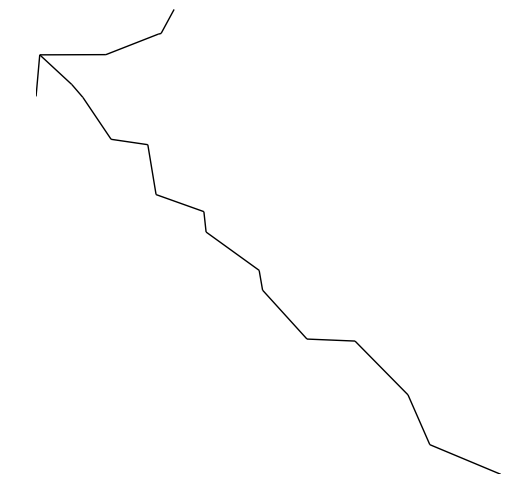

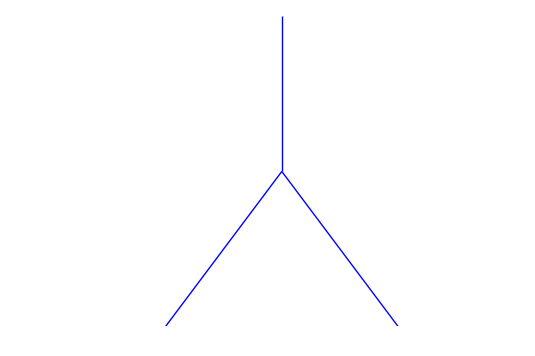

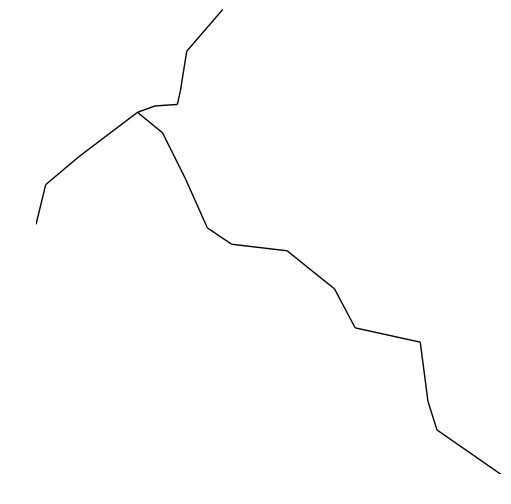

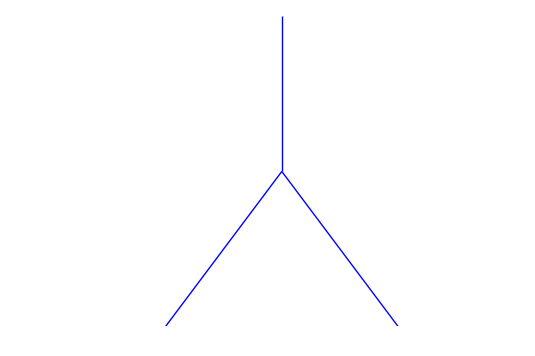

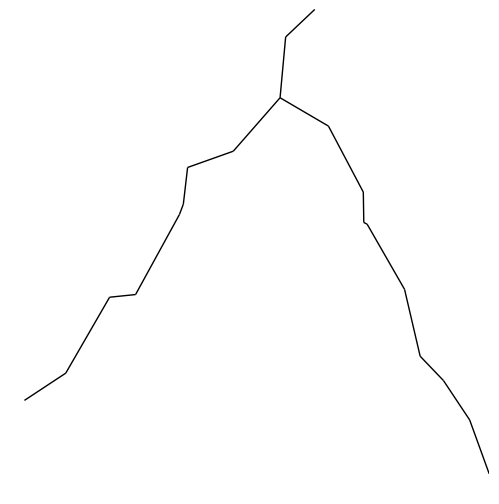

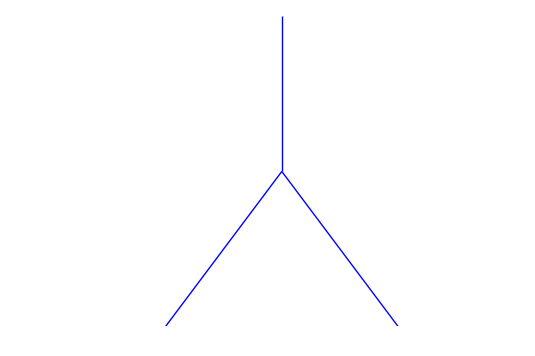

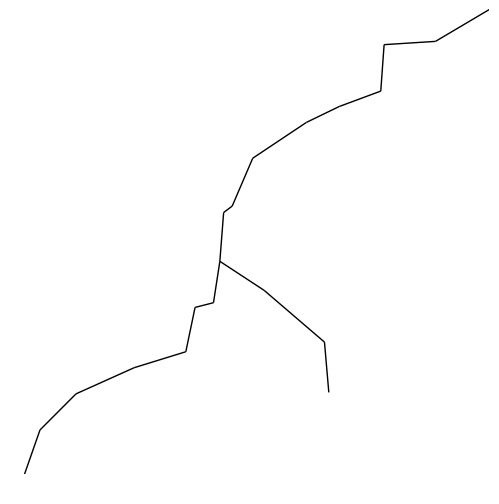

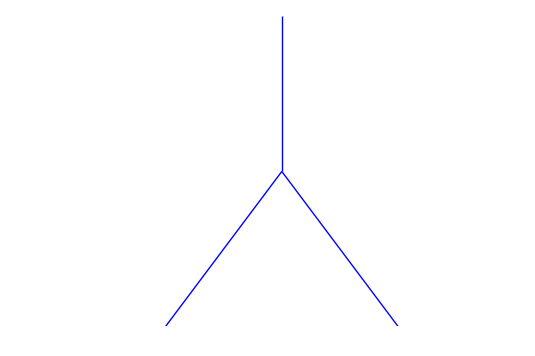

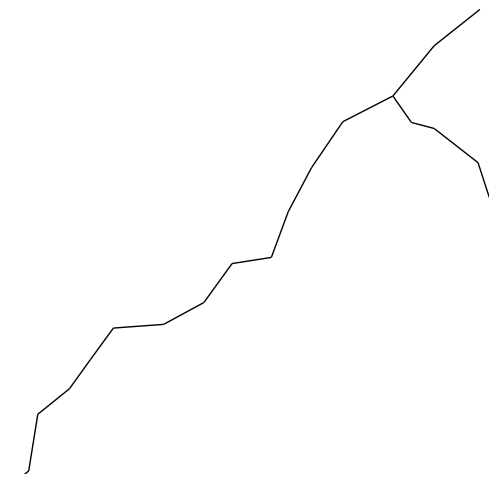

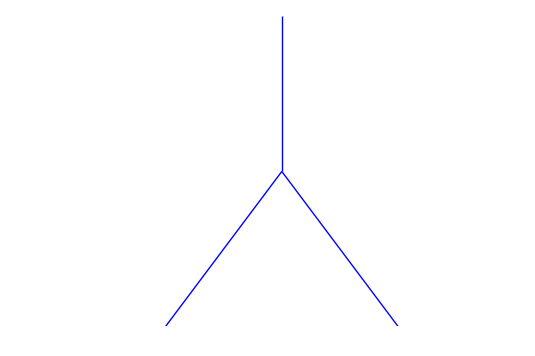

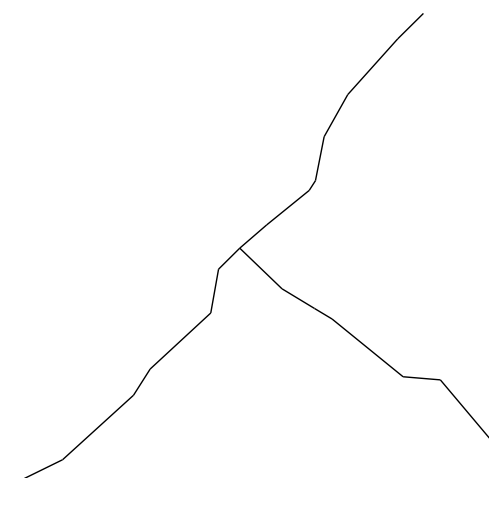

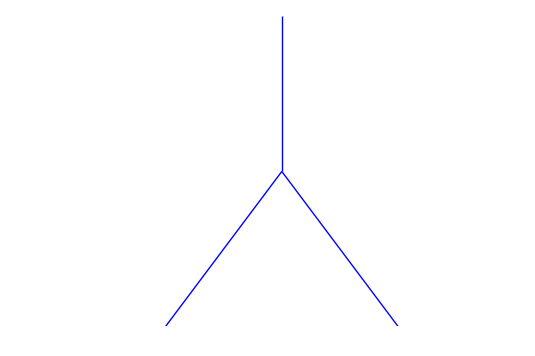

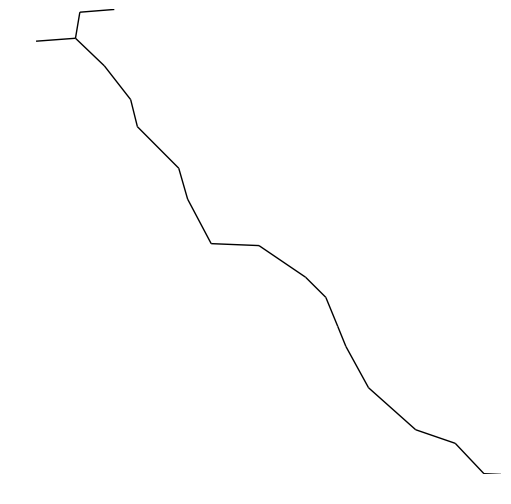

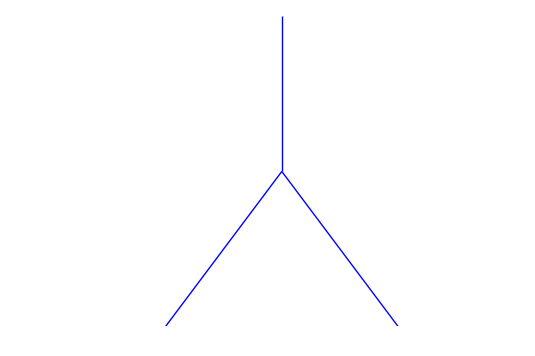

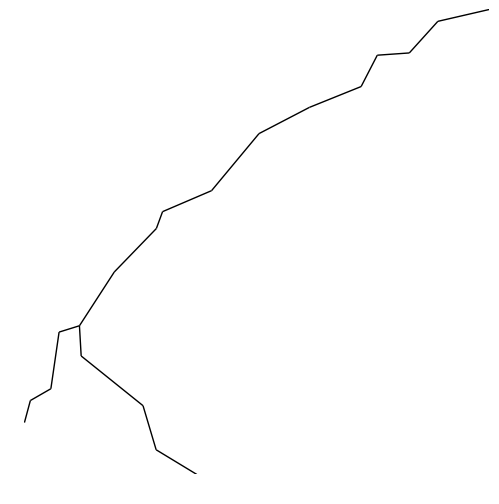

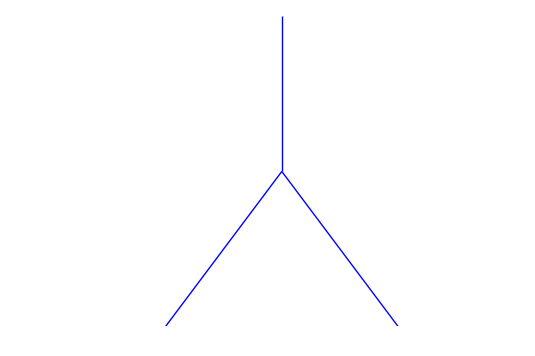

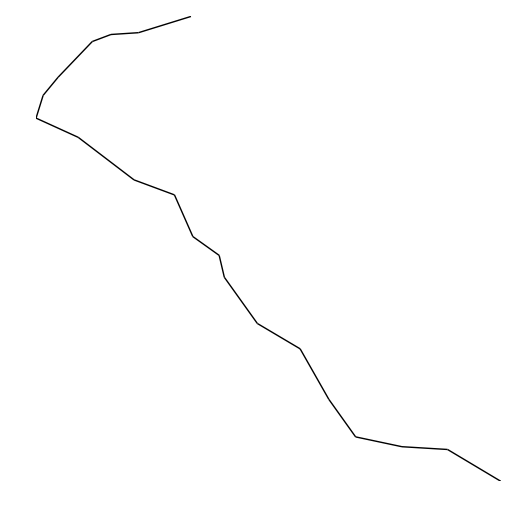

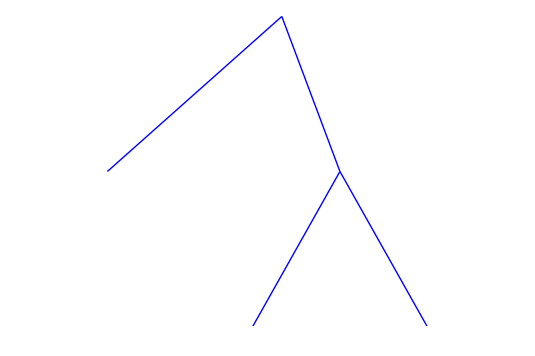

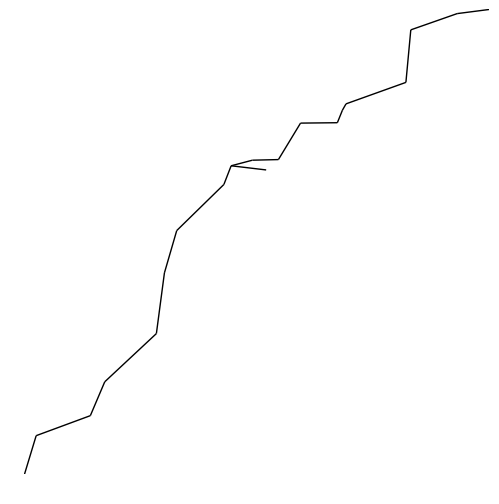

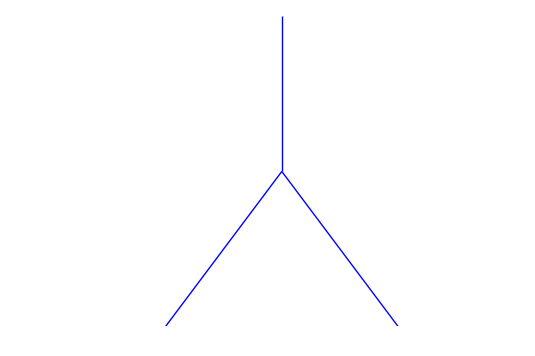

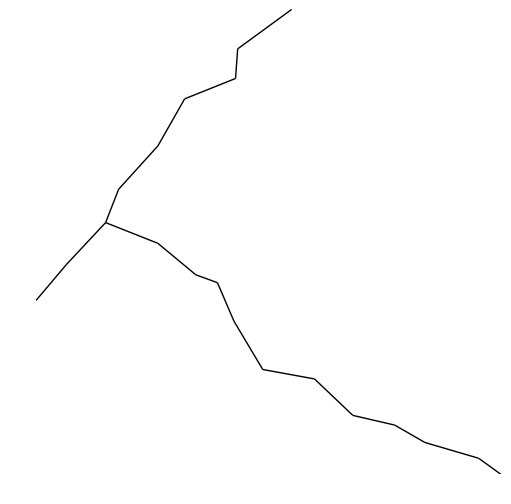

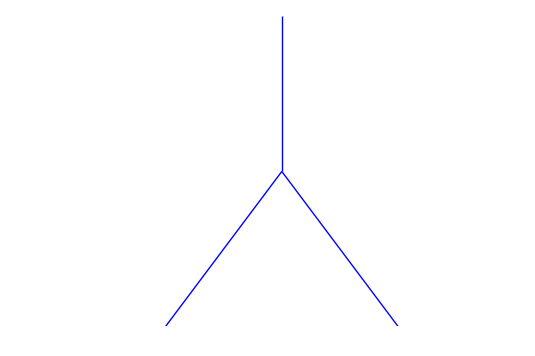

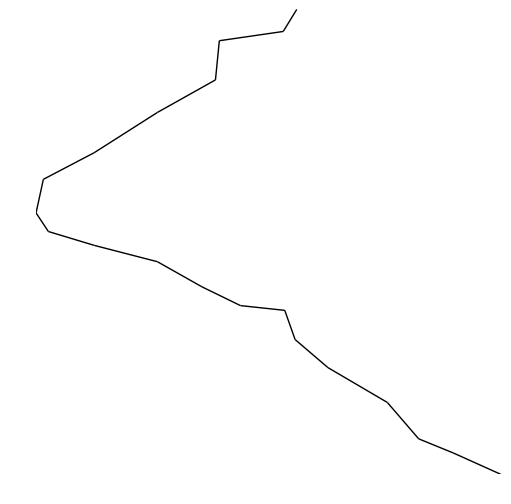

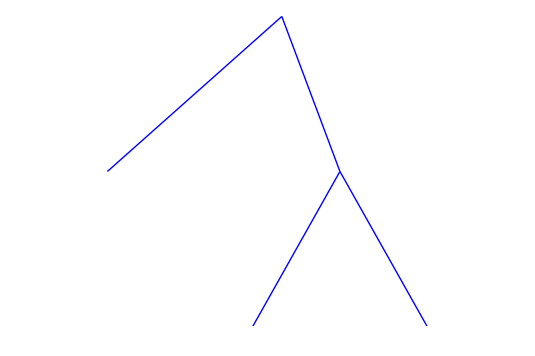

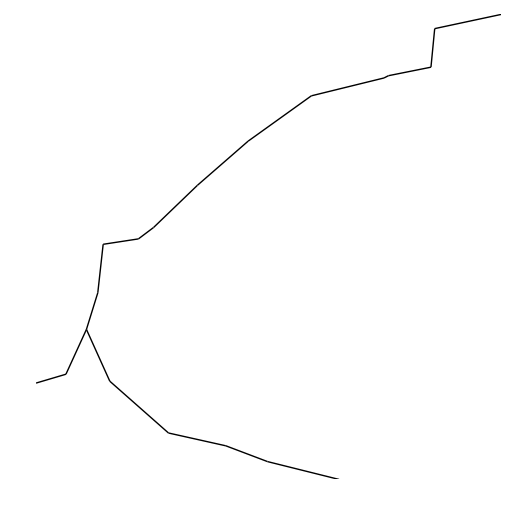

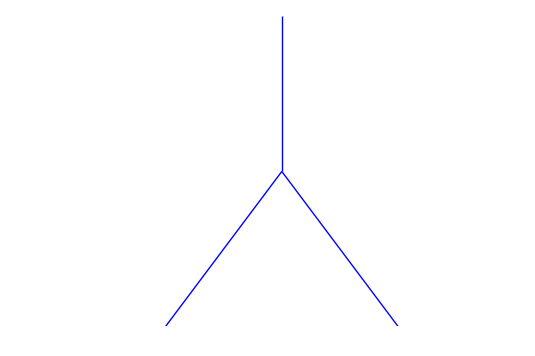

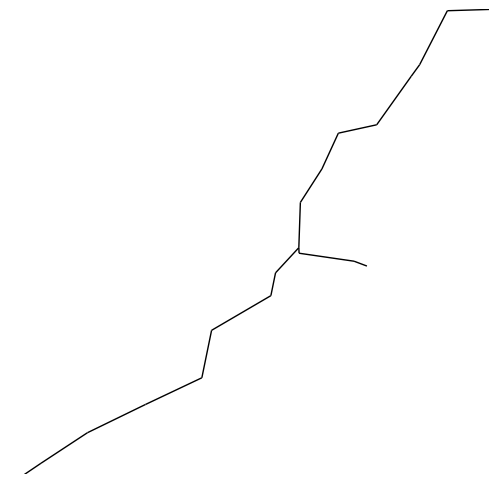

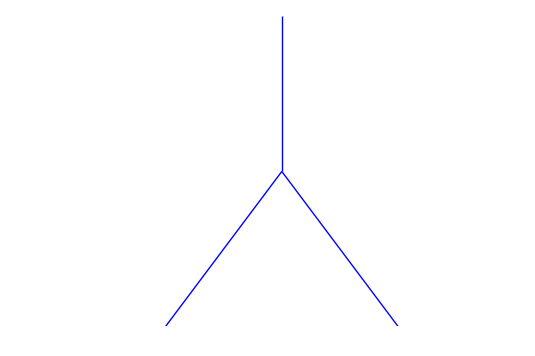

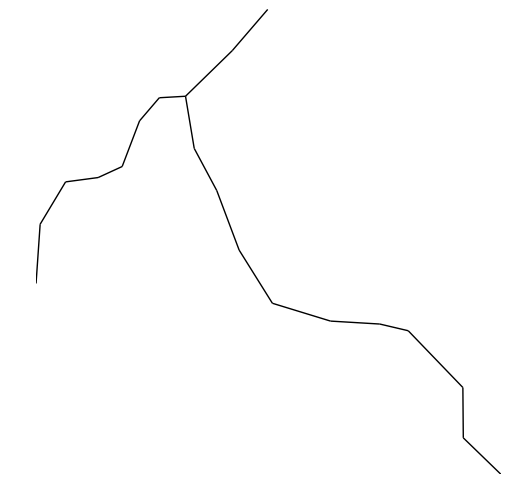

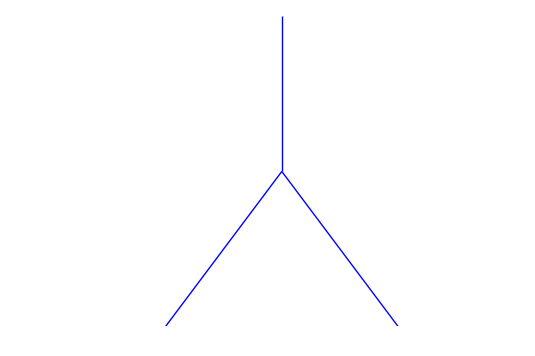

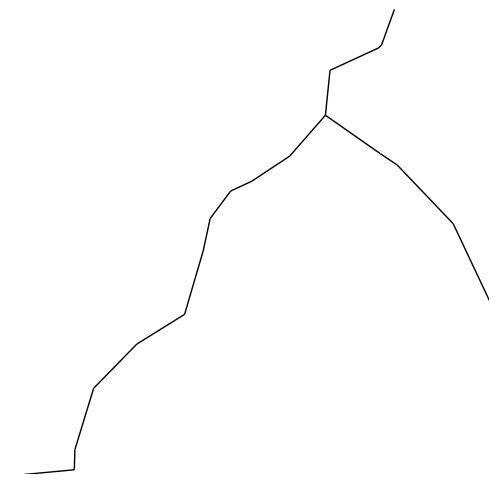

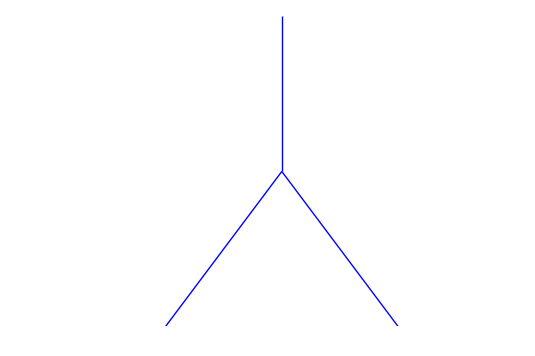

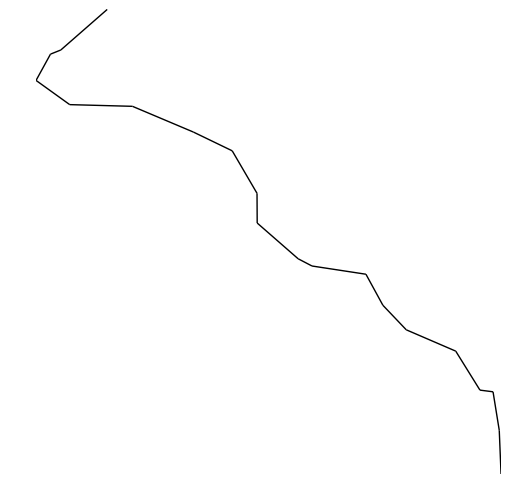

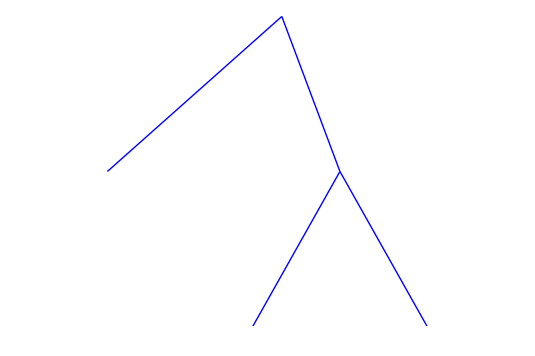

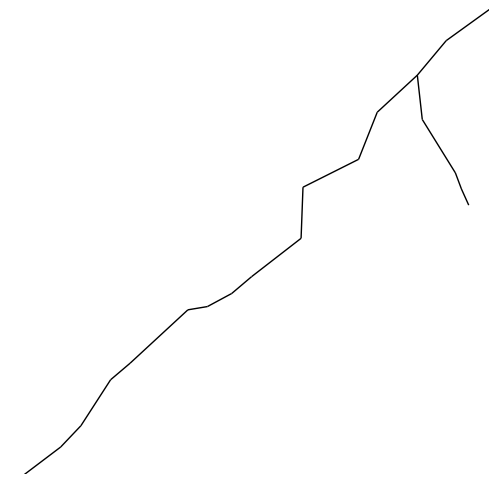

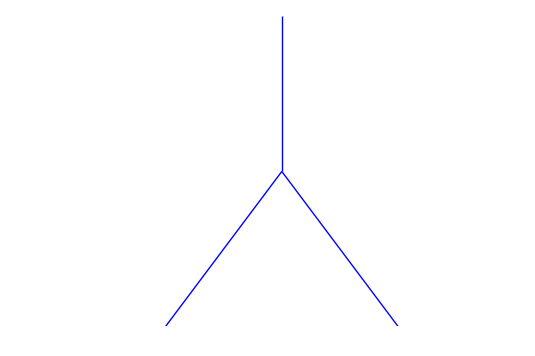

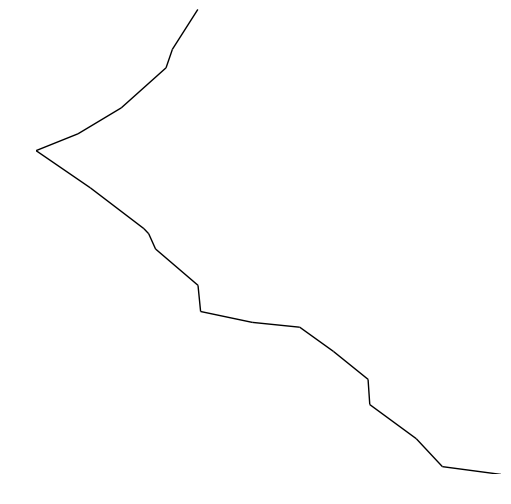

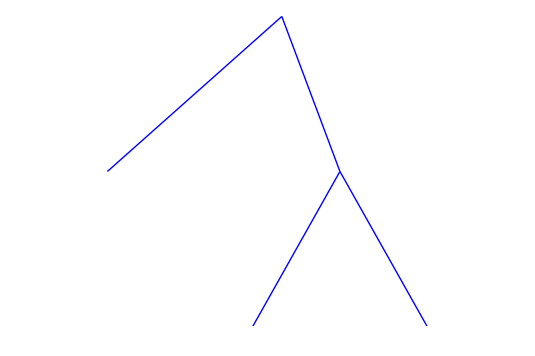

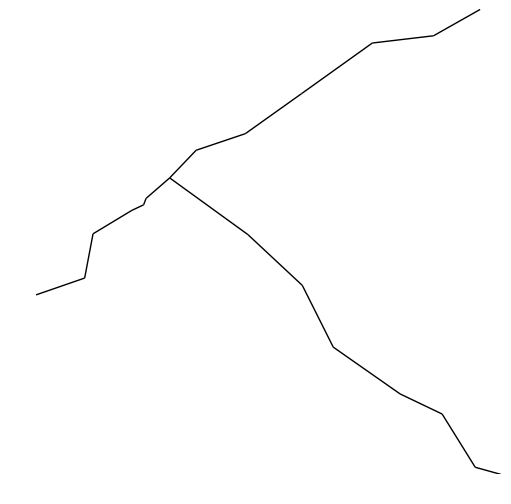

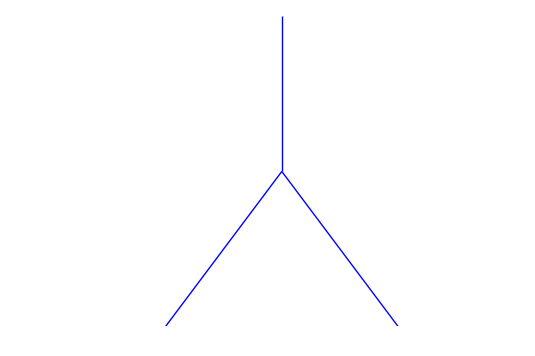

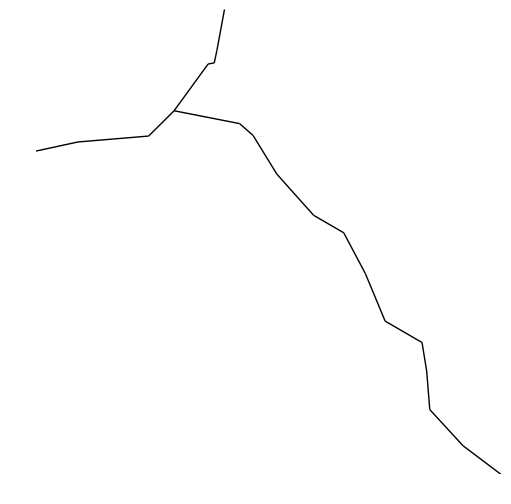

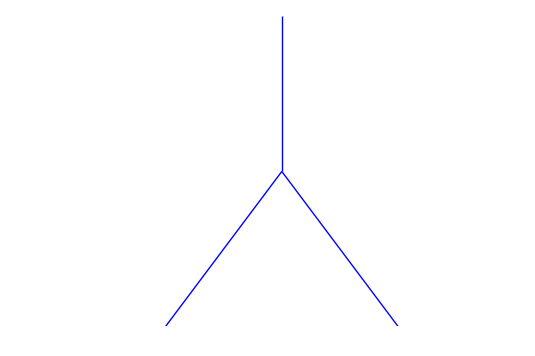

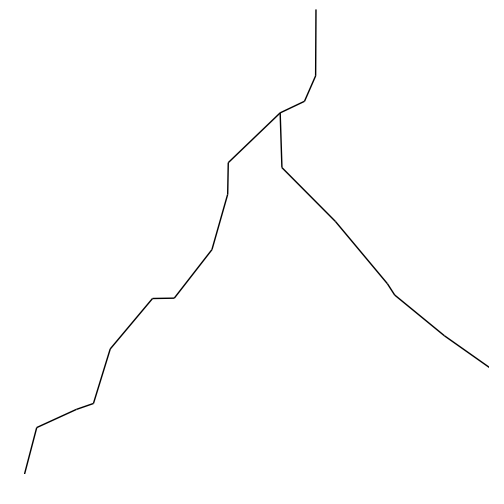

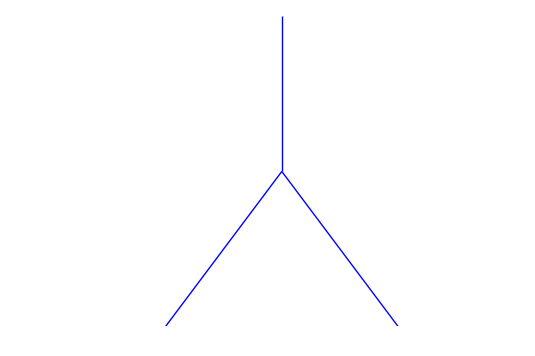

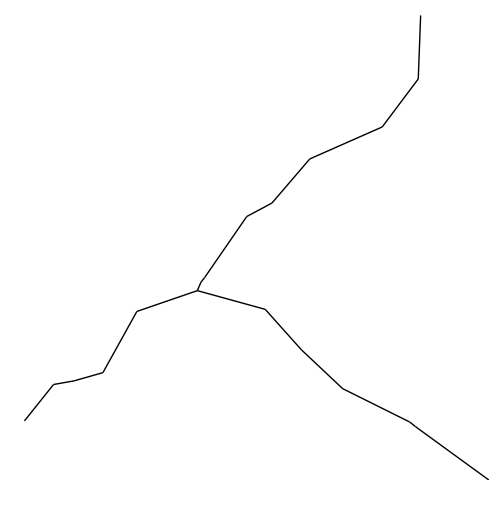

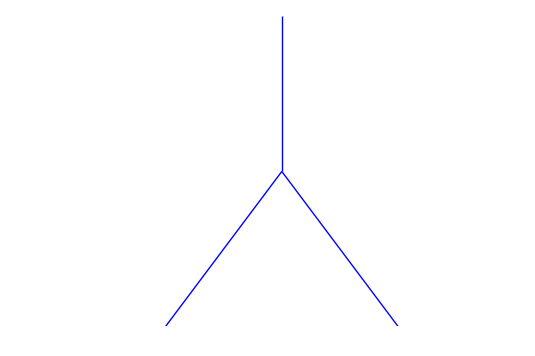

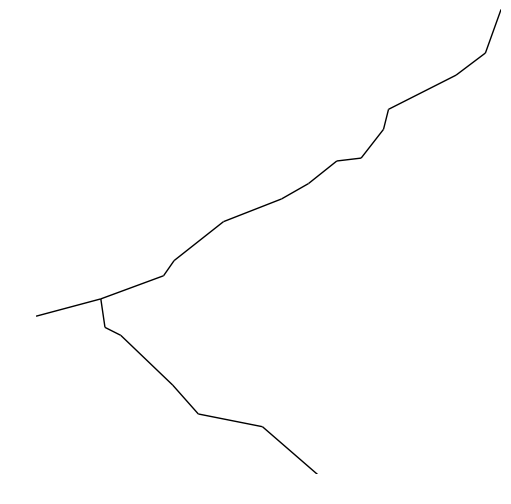

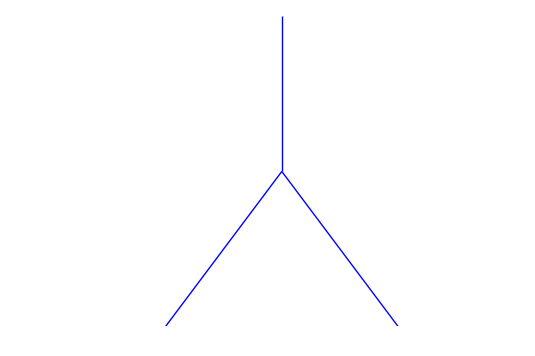

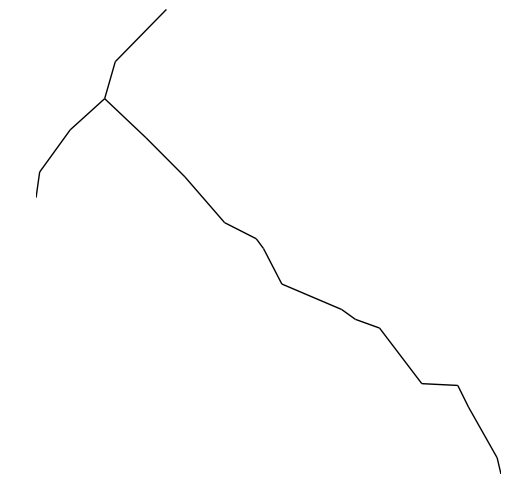

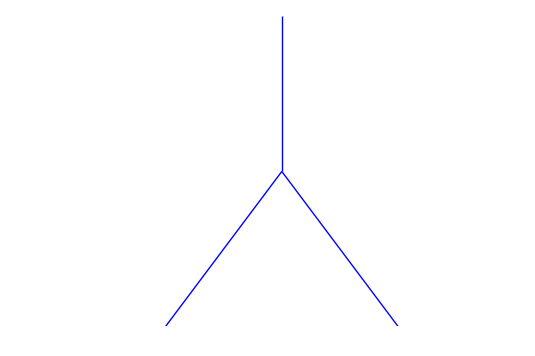

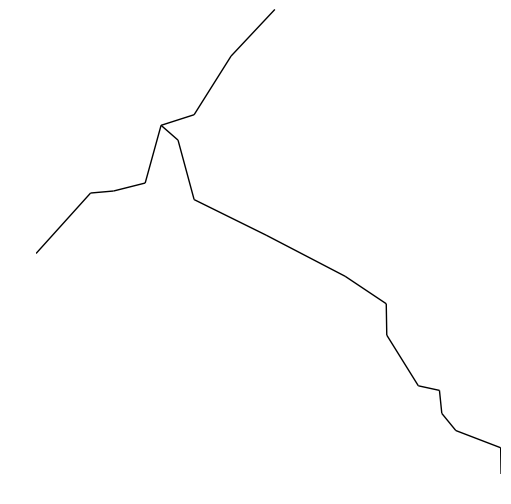

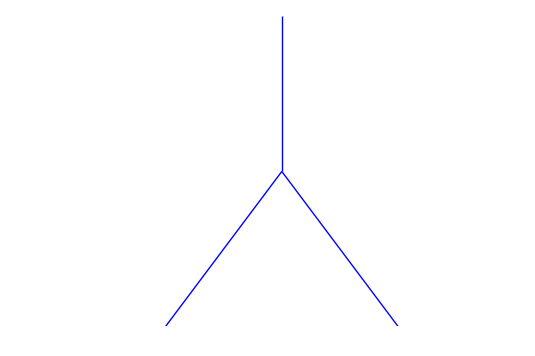

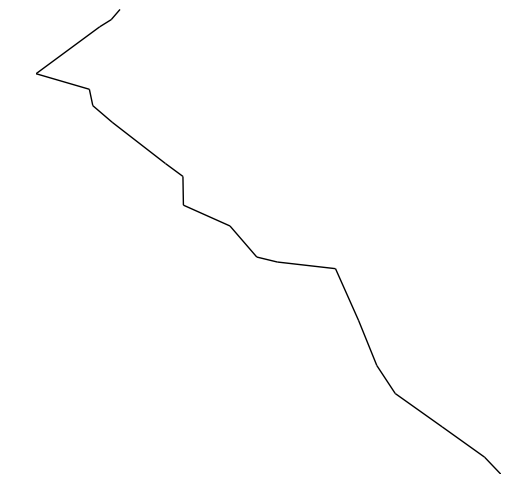

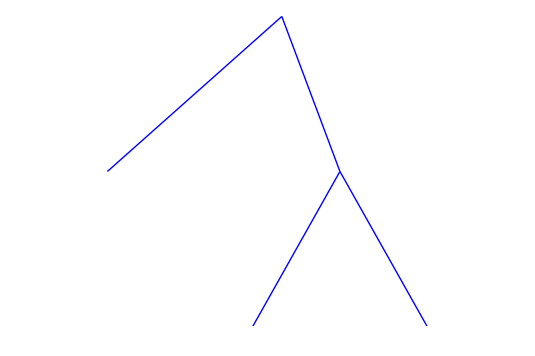

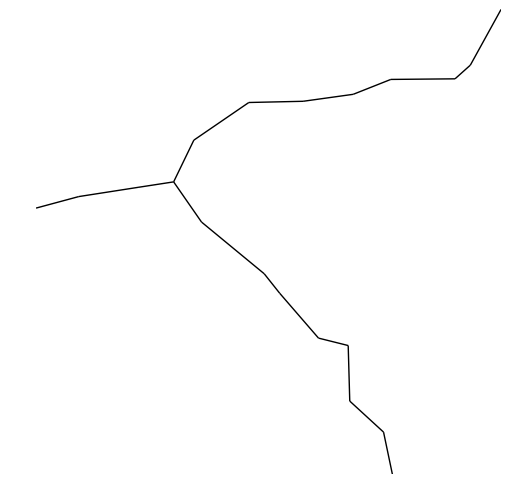

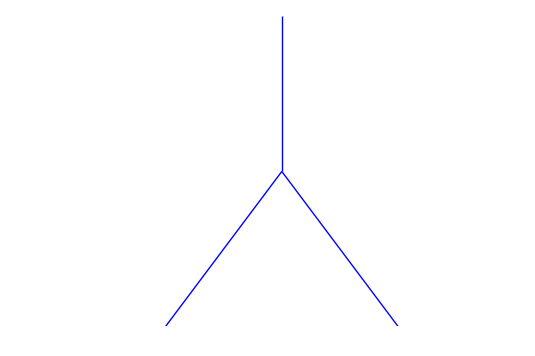

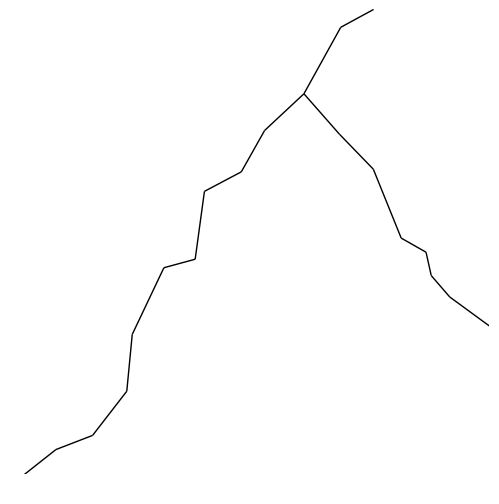

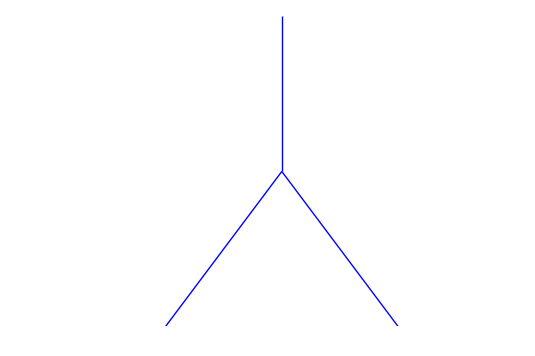

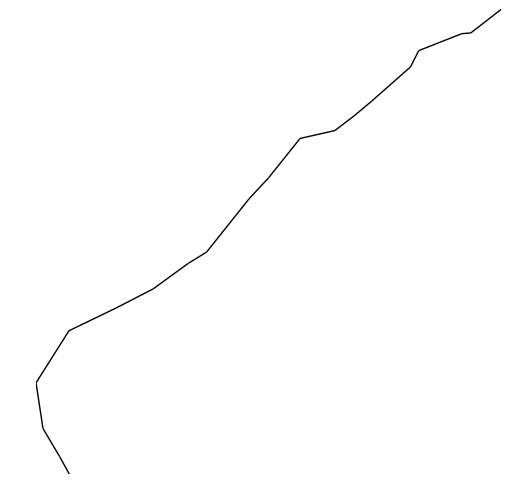

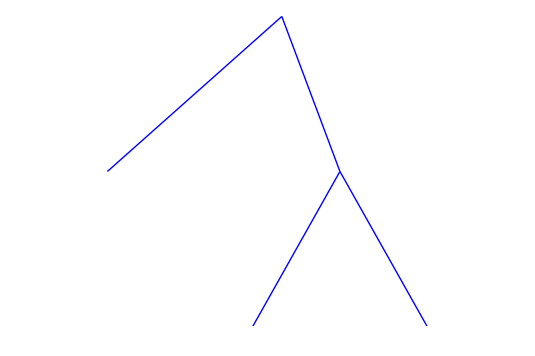

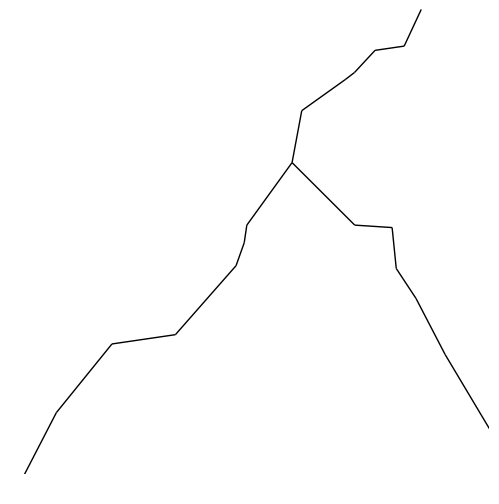

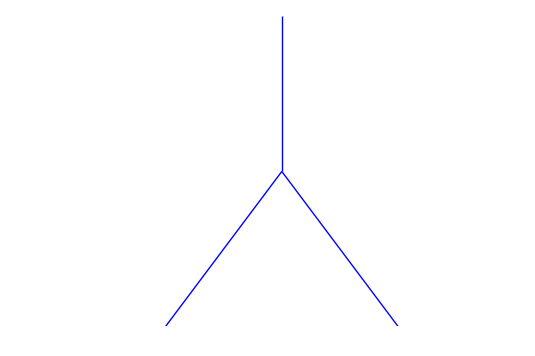

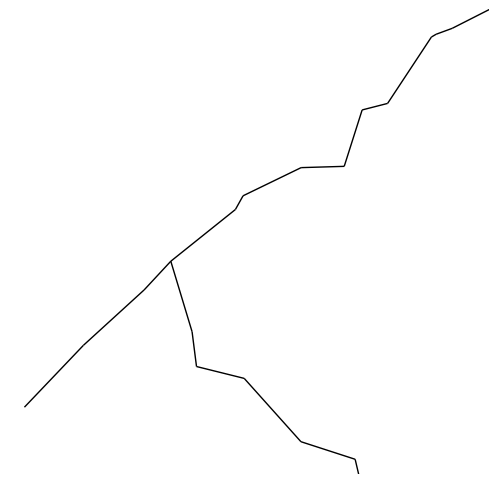

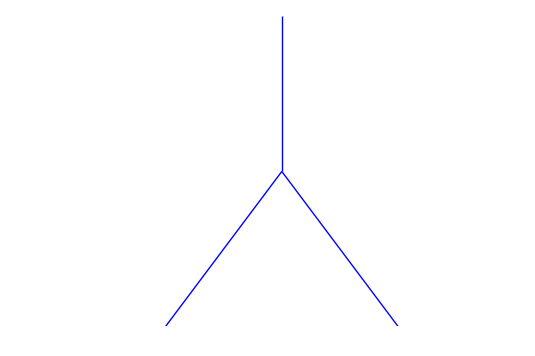

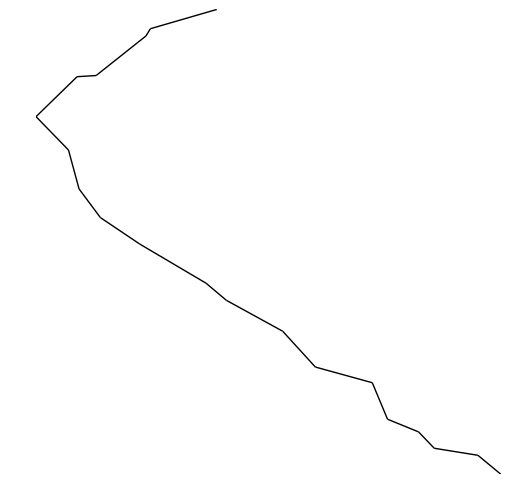

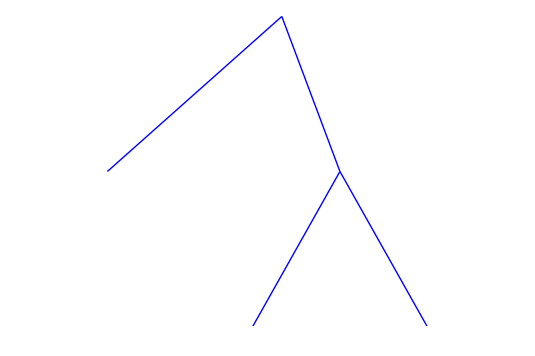

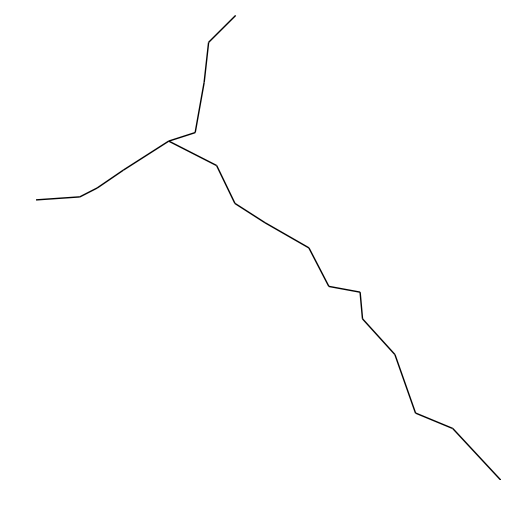

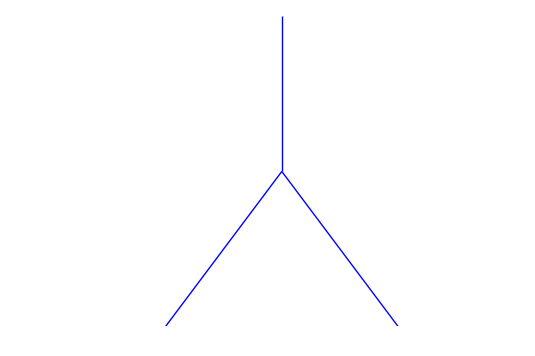

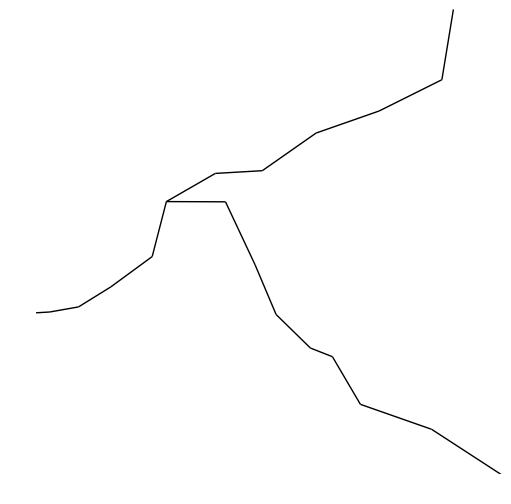

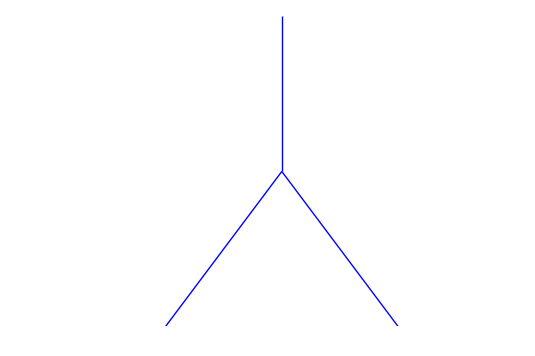

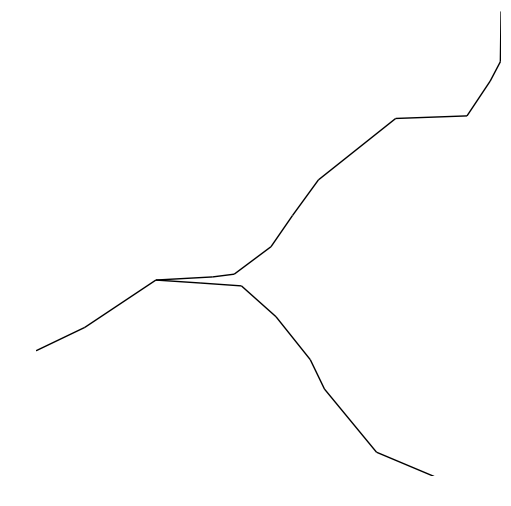

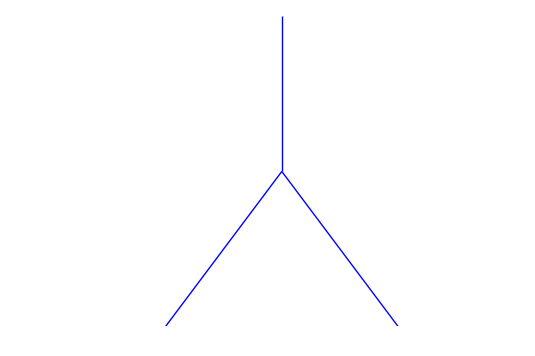

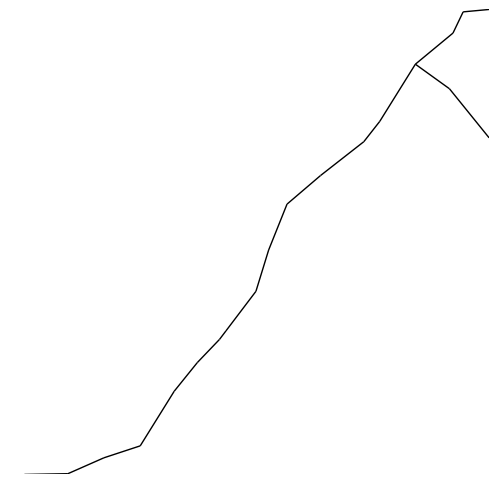

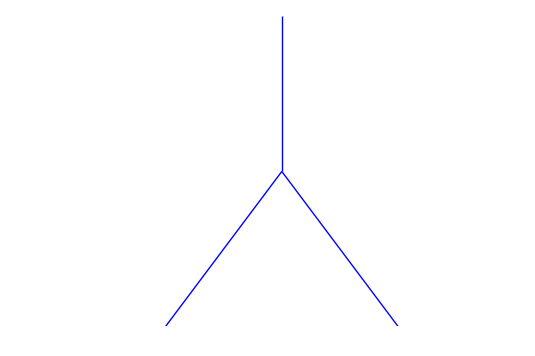

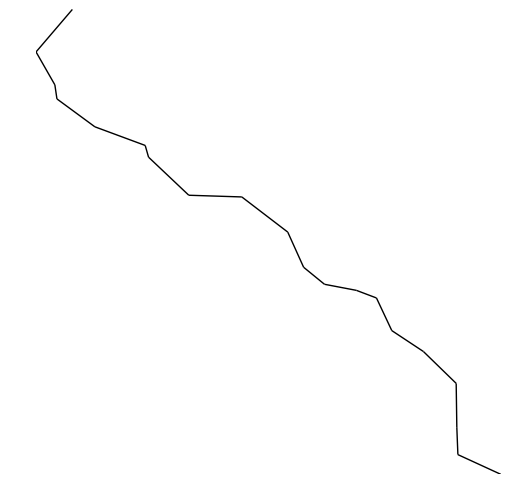

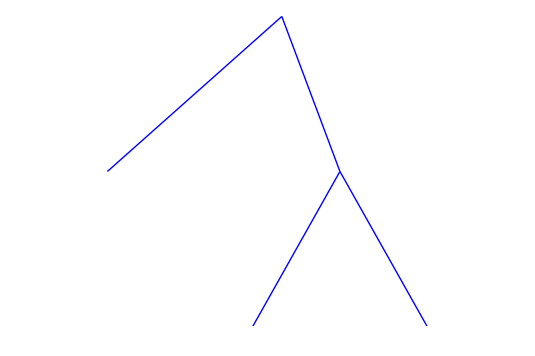

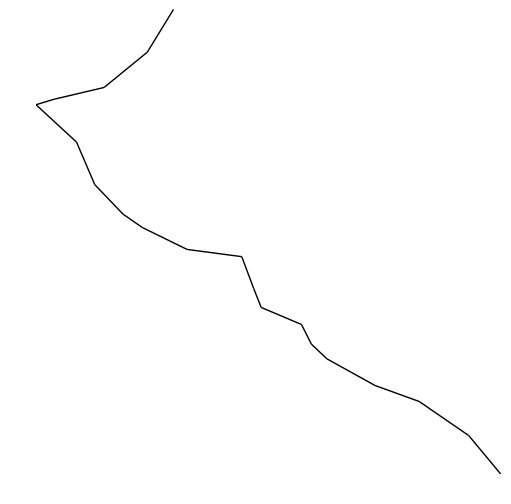

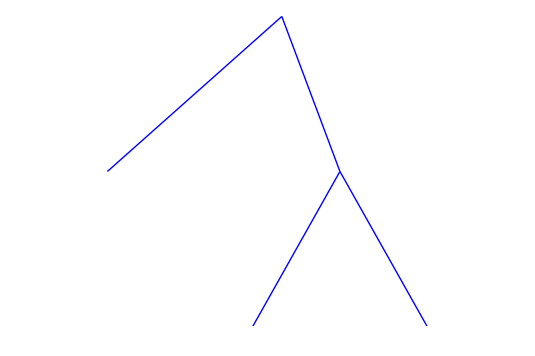

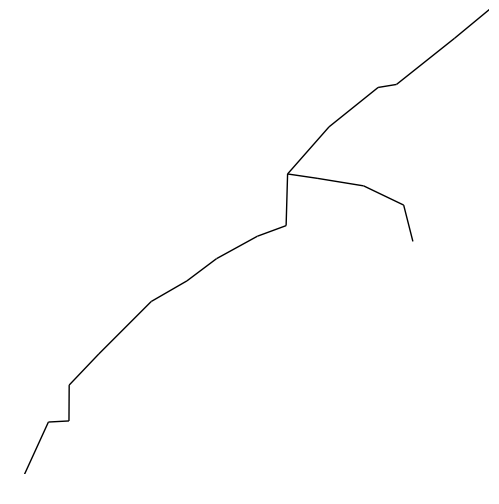

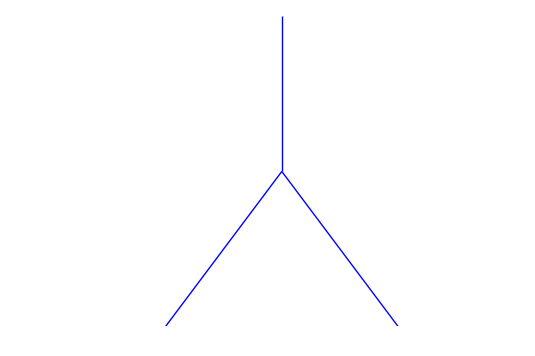

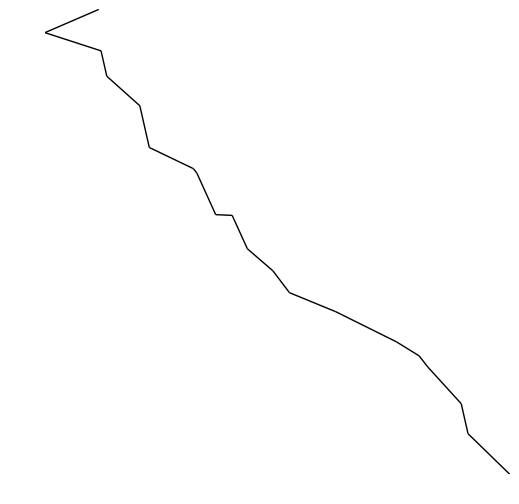

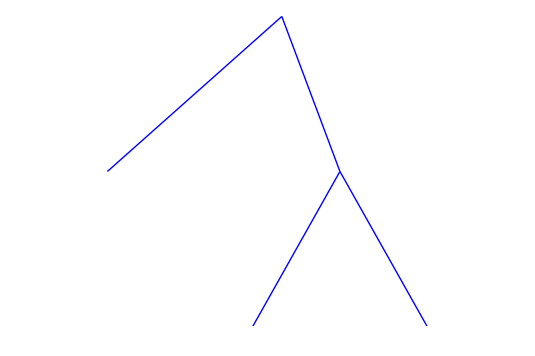

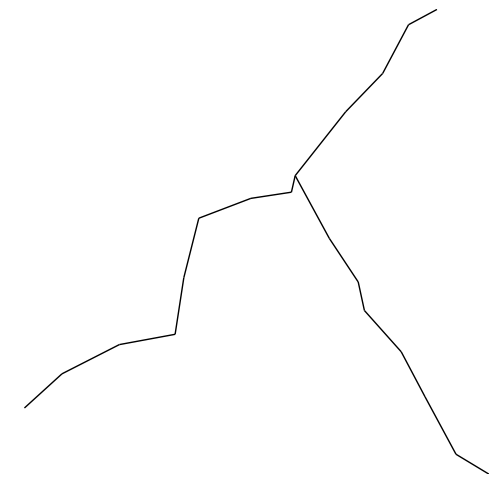

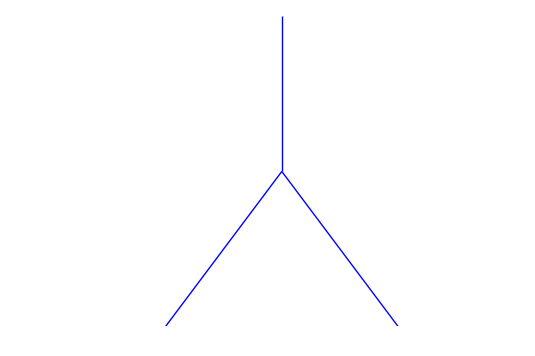

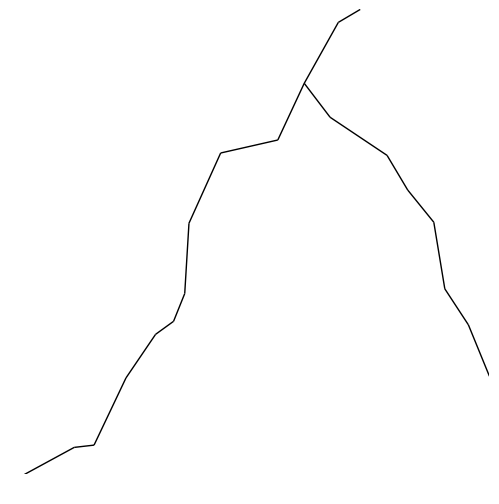

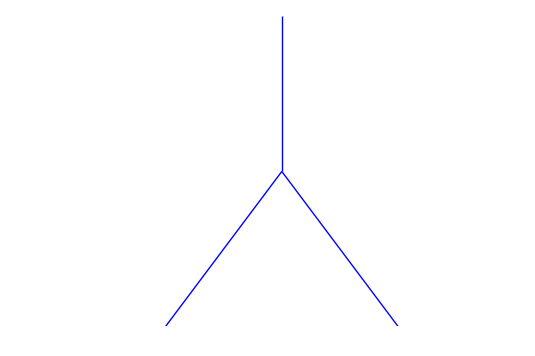

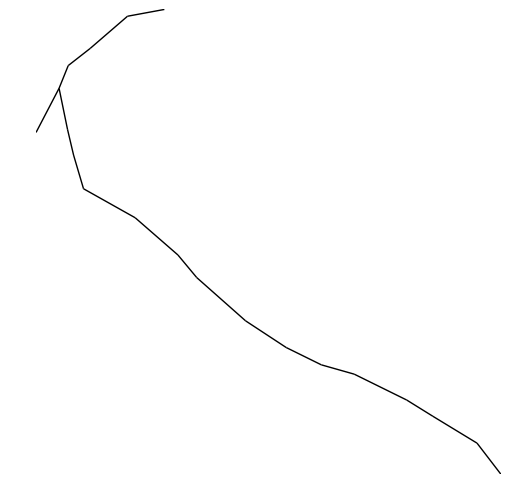

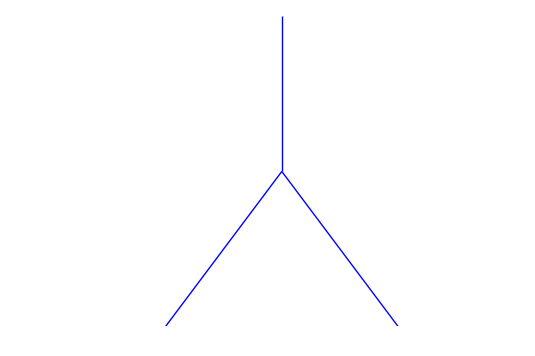

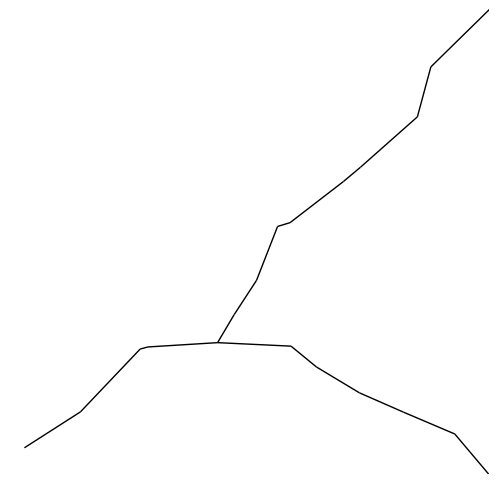

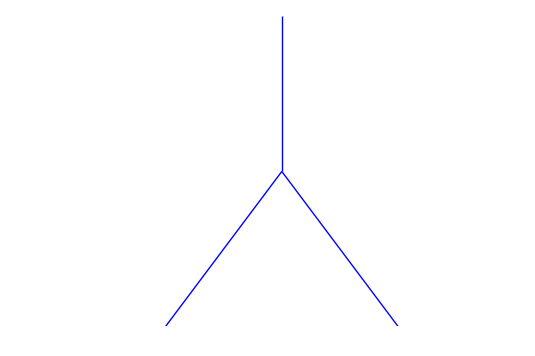

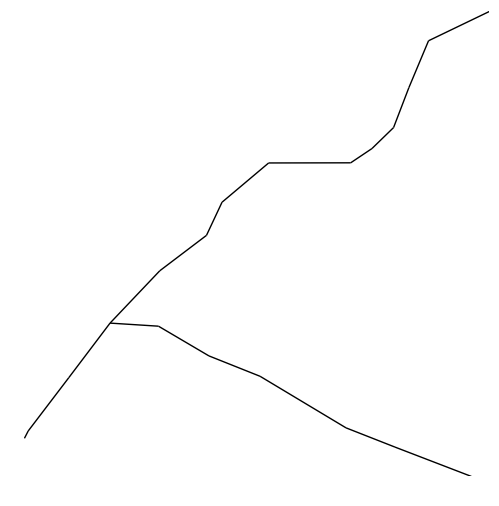

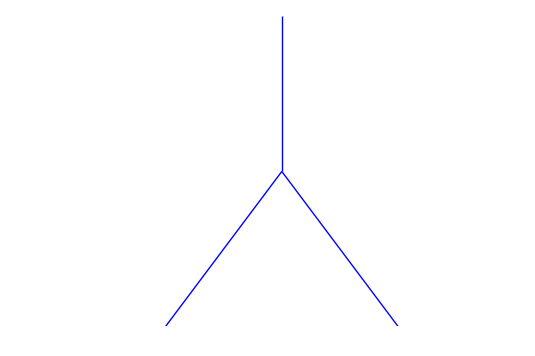

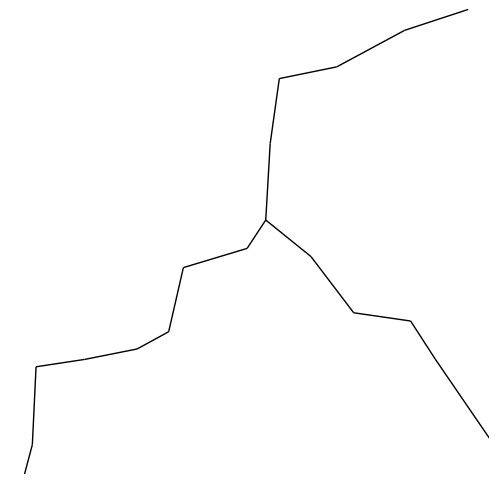

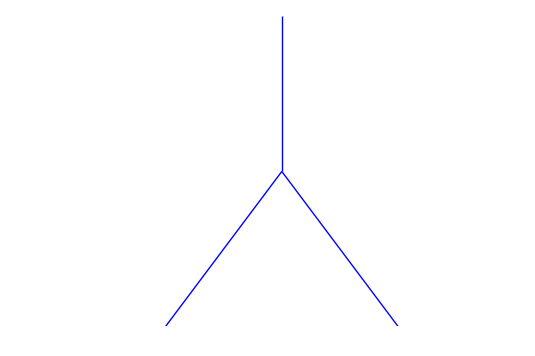

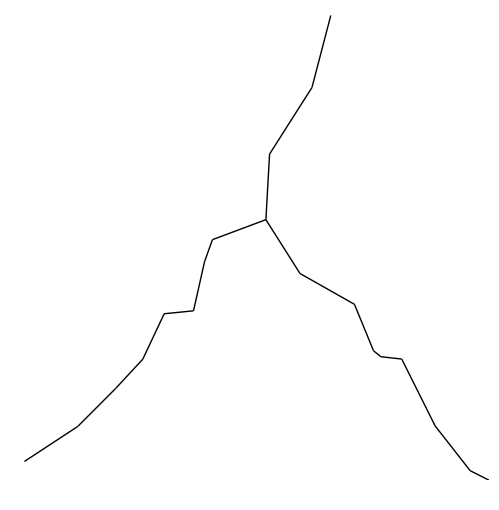

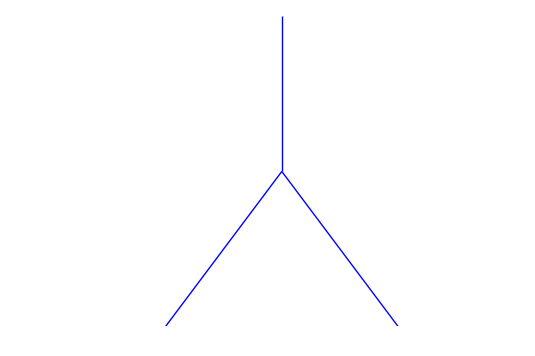

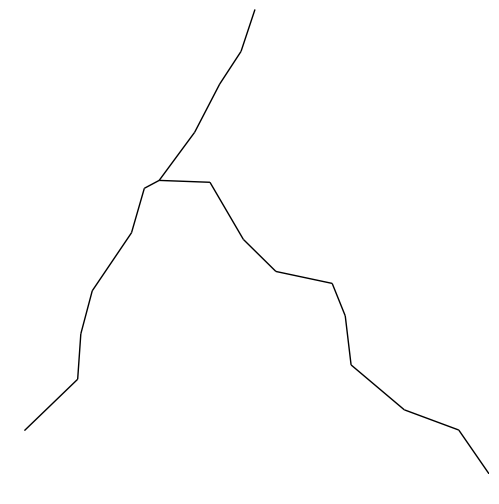

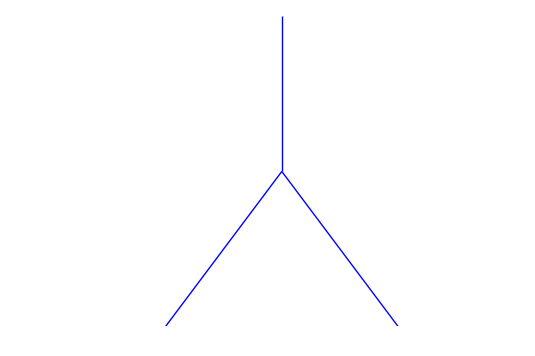

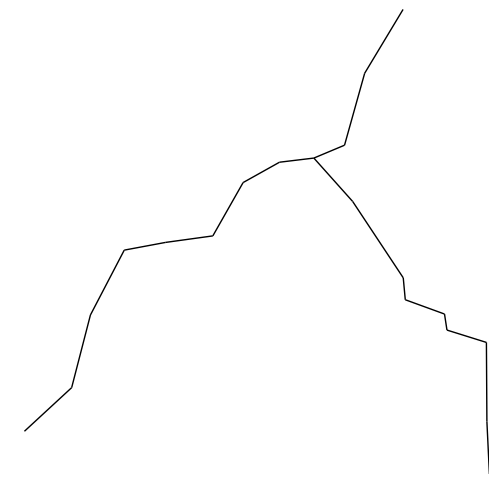

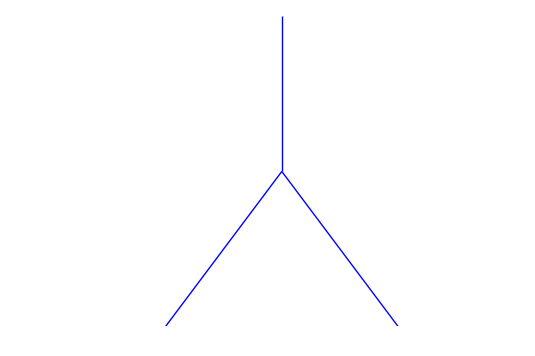

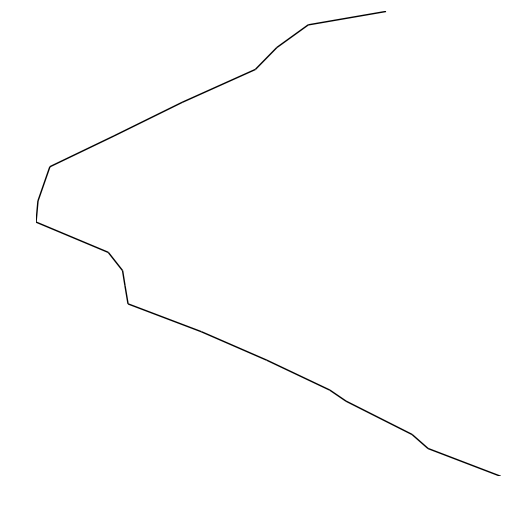

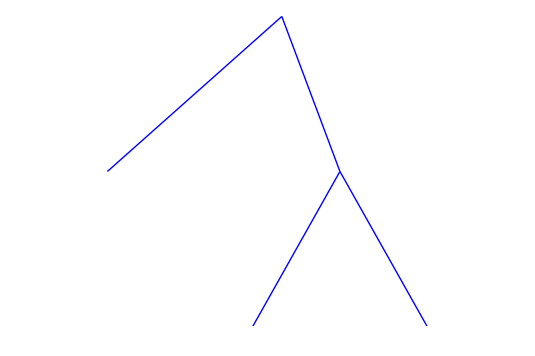

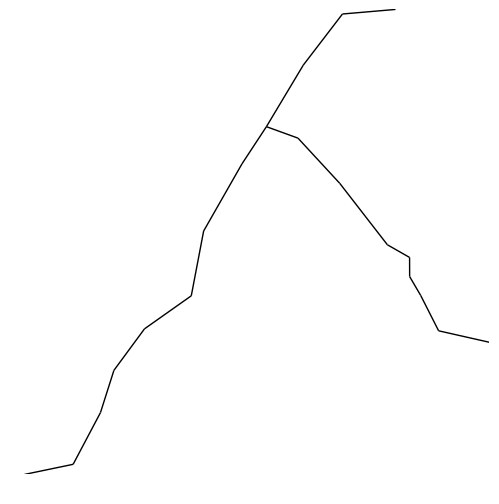

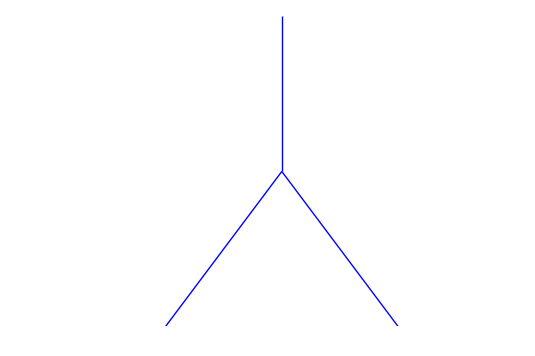

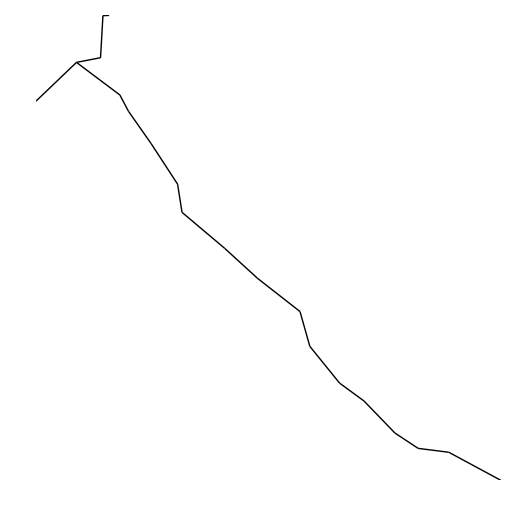

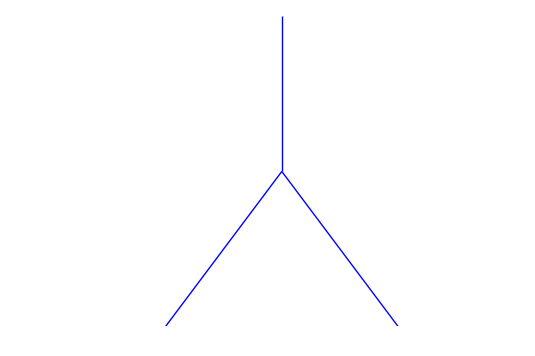

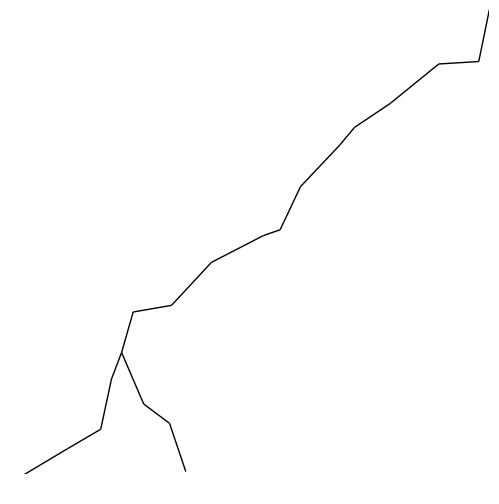

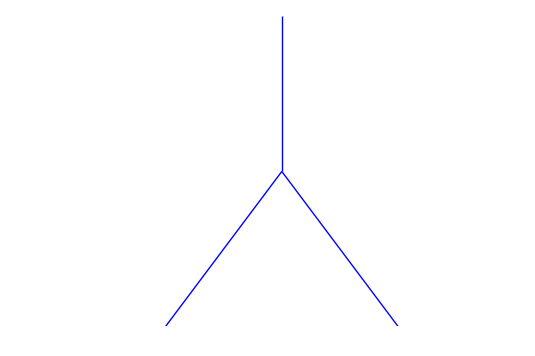

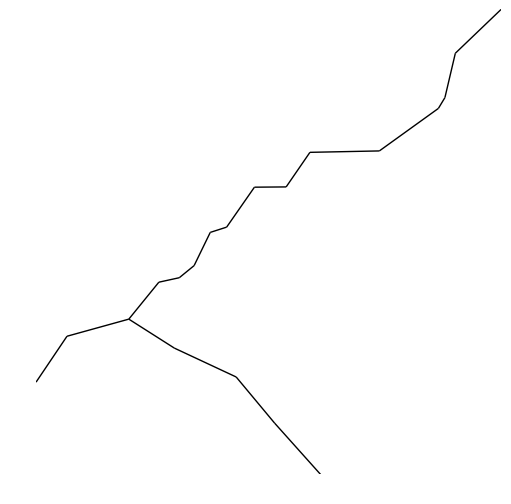

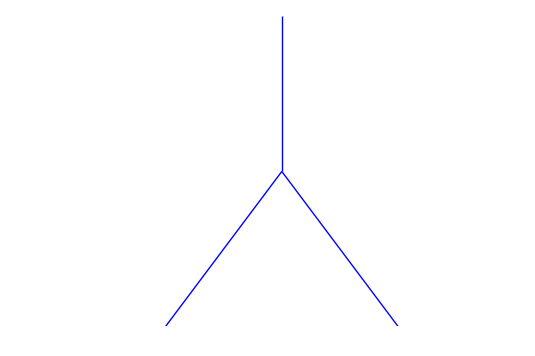

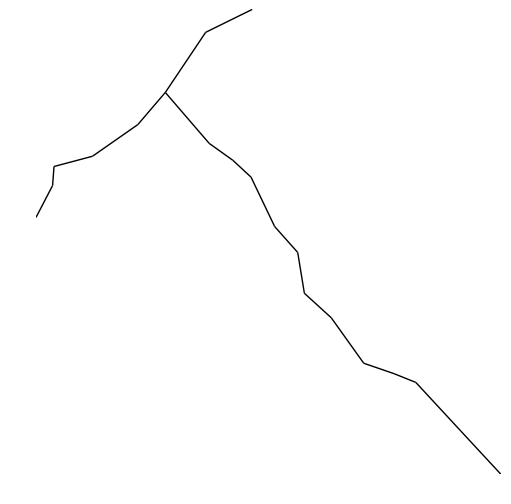

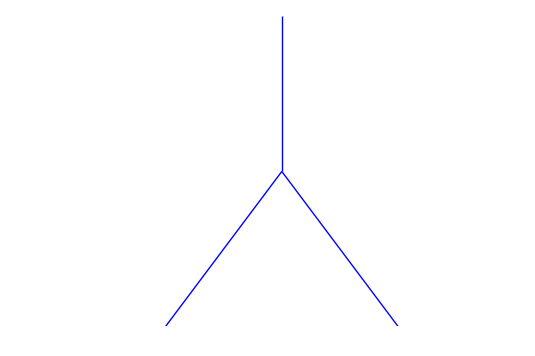

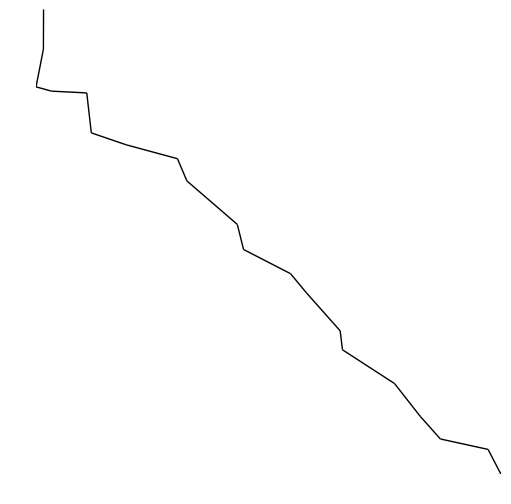

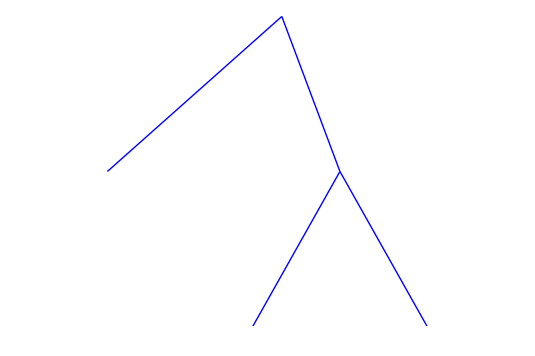

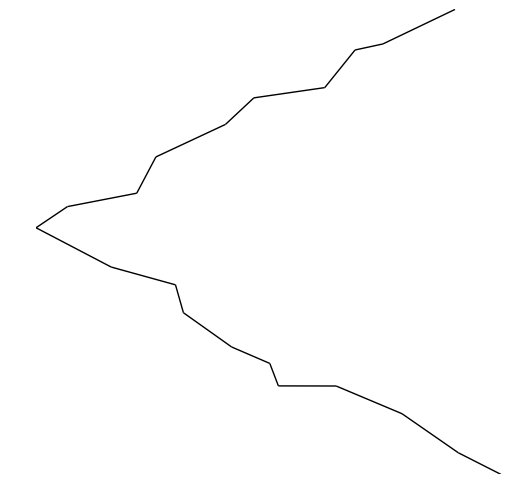

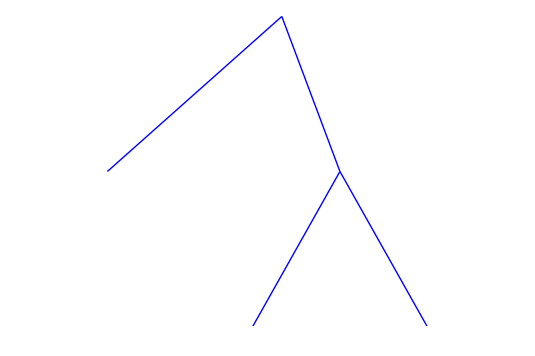

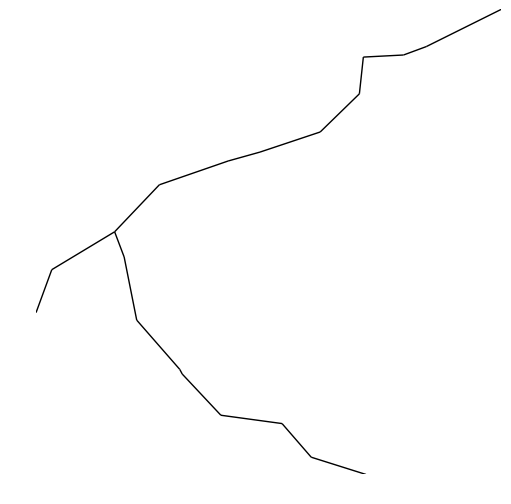

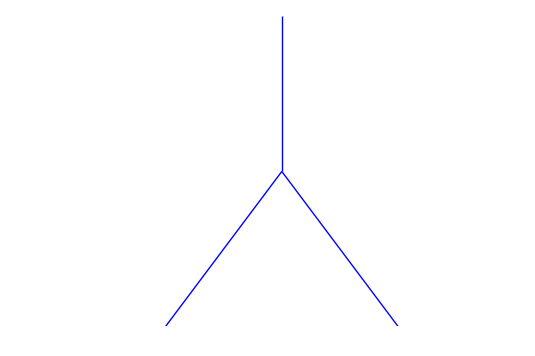

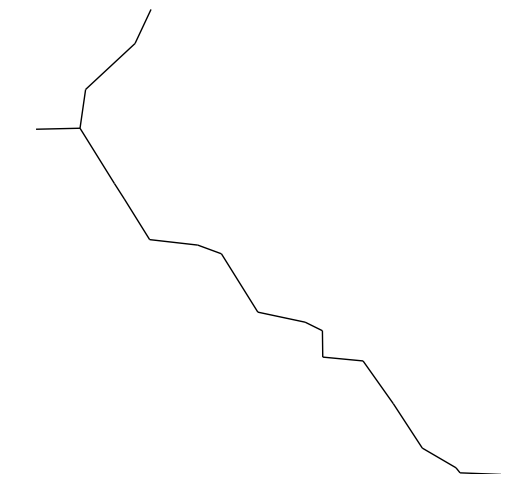

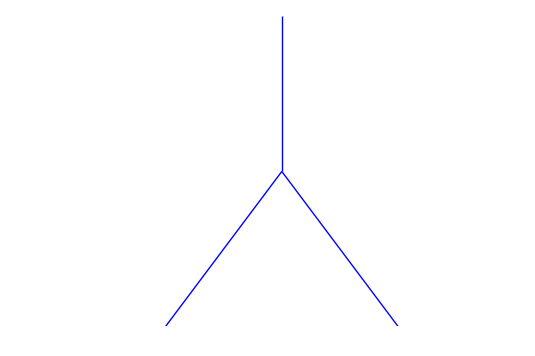

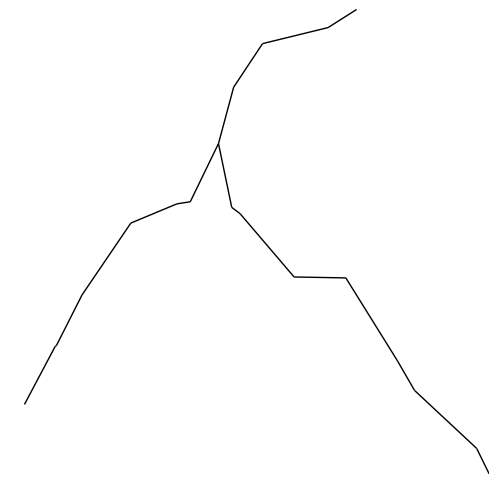

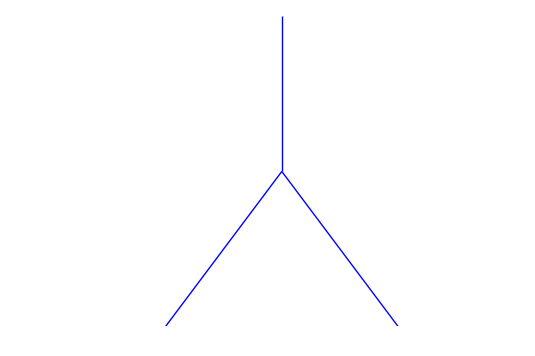

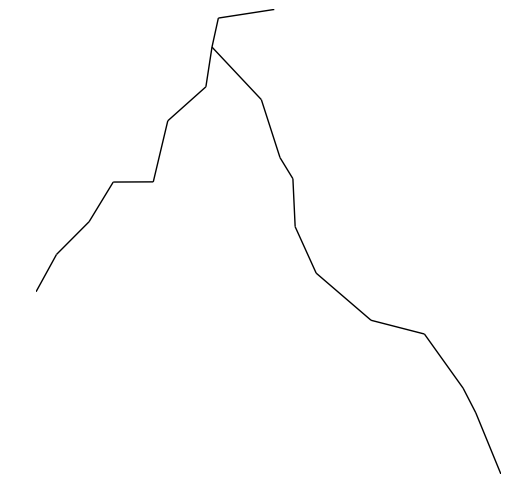

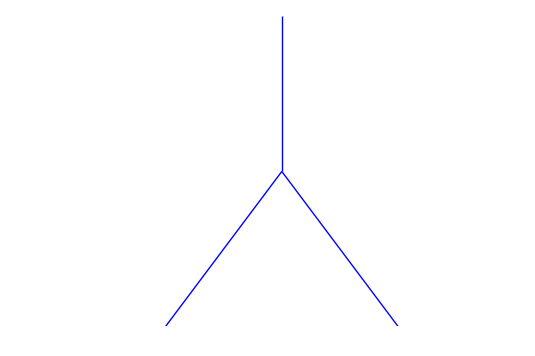

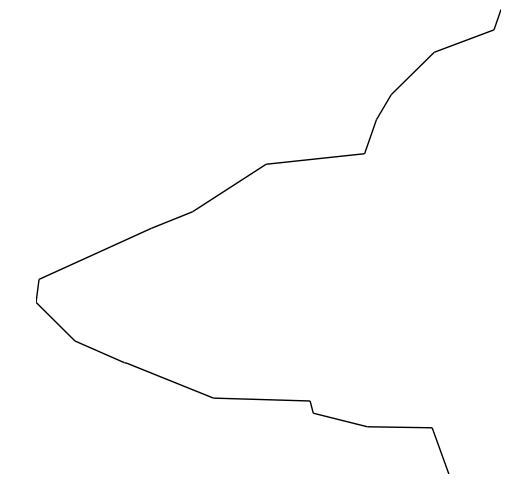

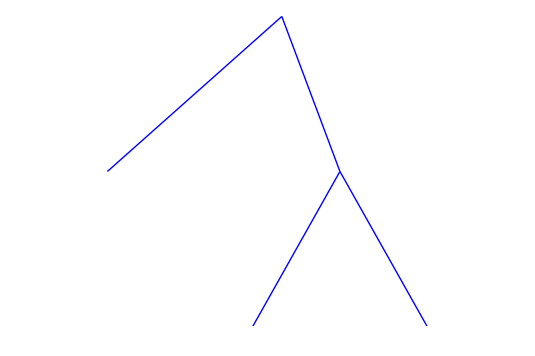

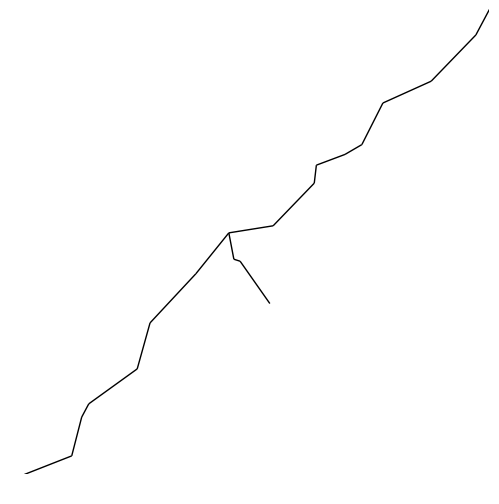

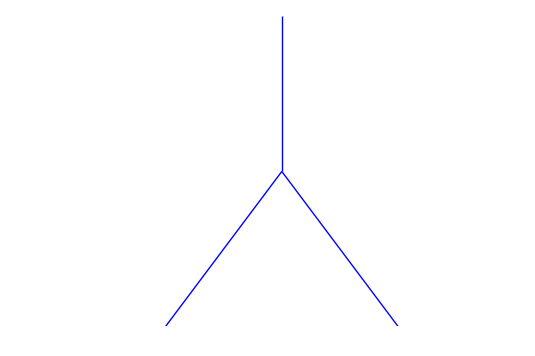

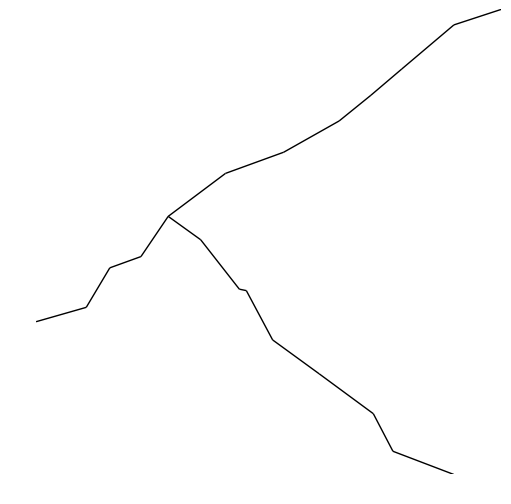

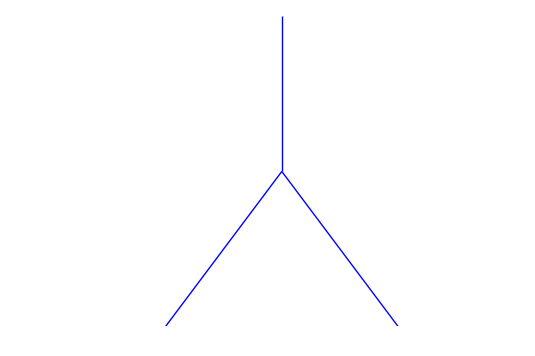

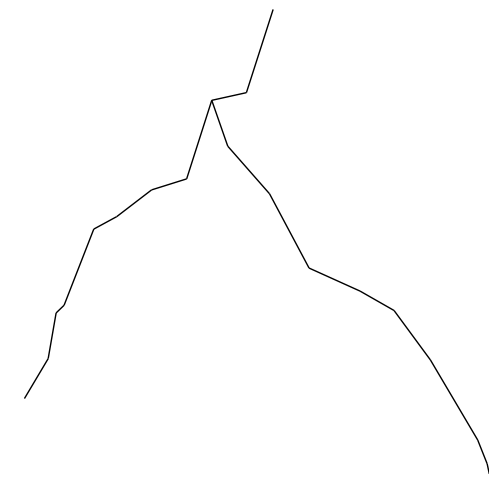

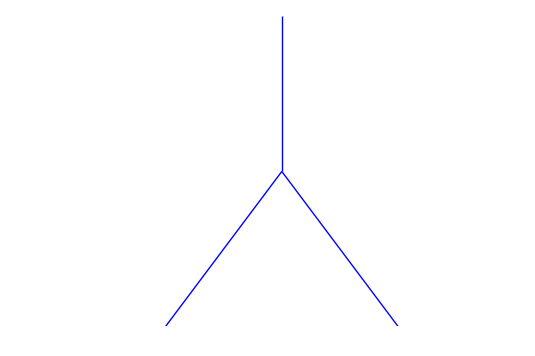

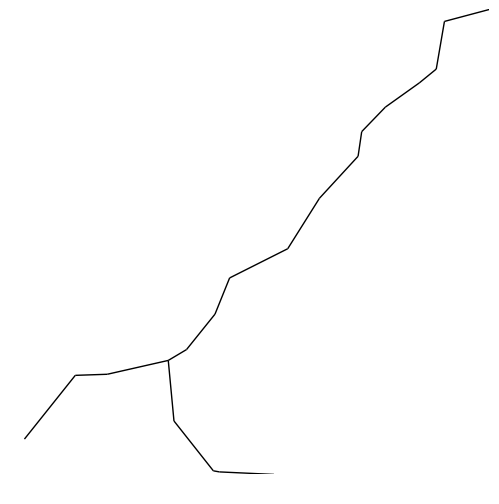

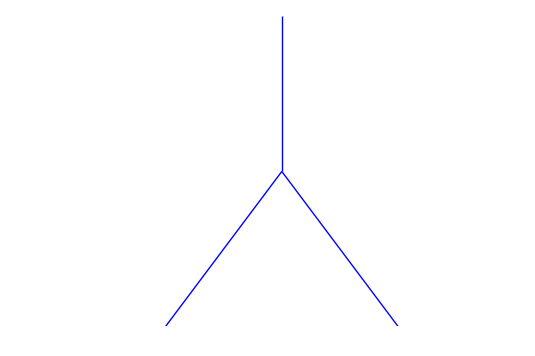

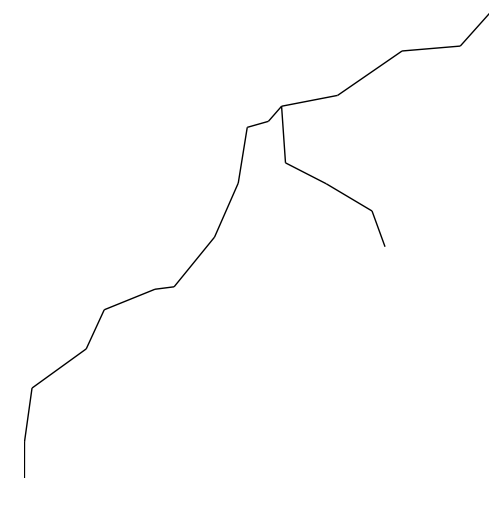

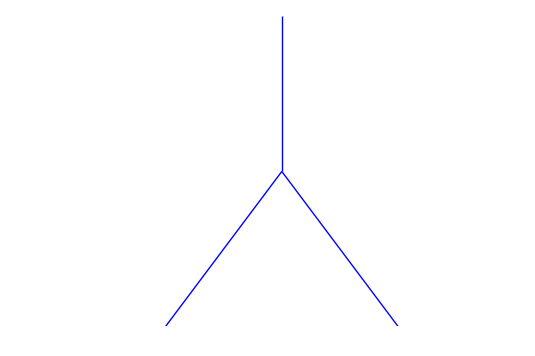

In [15]:
for ex in range(2200, 2300):
    input_code = dict()
    input_code['morphology'] = training_data['morphology']['n20'][ex, :]
    input_code['geometry'] = np.squeeze(training_data['geometry']['n20'][ex, :, :])
    neuron_object = data_transforms.make_swc_from_prufer_and_locations(input_code)
    neuron_object = McNeuron.Neuron(file_format='only list of nodes', input_file = neuron_object.nodes_list)
    McNeuron.visualize.plot_2D(neuron_object)
    McNeuron.visualize.plot_dedrite_tree(neuron_object)